# Практика 1

## Введение

На этой неделе было много новой информации. Чтобы всё это запомнилось, необходимо попрактиковаться.

В этом нам поможет главный персонаж нашего курса, существо по имени Зюк (Zookee) с далёкой планеты Нейра.
Нейряне не так уж сильно отличаются от землян, но для того, чтобы чему-то научиться, им каждый раз приходится формировать набор данных и сознательно программировать небольшую нейросеть в своём мозгу. В этом есть свои плюсы и минусы, но обсуждение этих вопросов выходит далеко за рамки нашего курса.

Важно что Зюк очень любит путешествовать и недавно он прилетел к нам.

<img src="https://raw.githubusercontent.com/stacymiller/stepic_neural_networks_public/master/files/ship_bq.jpg" width=500/>

Мы, конечно, обрадовались его визиту, ведь сразу было видно, что он очень добрый, общительный и, конечно, необычный. Мы договорились, что будем помогать ему собирать данные, а он поделится своим опытом программирования нейросетей. Мы немало удивились, узнав, что многие из его нейросетей написаны на Python. По его выражению, Python - это лучшее из того, что придумали земляне.

## Перцептрон

После небольшой прогулки Зюк сильно проголодался. Кроме того, оказалось, что он очень привередлив в еде:
едва попробовав очередное блюдо, он менялся в цвете и вежливо отказывался. К счастью, ему пришлись по нраву яблоки, и вопрос с едой был решен.

Однако в наше отсутствие Зюк оставался совершенно беспомощным, поскольку, гуляя в саду, он не мог отличить яблоки от груш (которые были ему совершенно ненавистны), не попробовав их на вкус.

<img src="https://raw.githubusercontent.com/stacymiller/stepic_neural_networks_public/master/files/apples.jpg" width=300 />

Сформировав путём горьких ошибок небольшой набор данных, Зюк достал какое-то странное устройство и начал программировать перцептрон. Мы вызвались помочь, и он, улыбнувшись, согласился.

По его словам, задача должна была оказаться достаточно простой, учитывая что у него в запасе были сети, способные извлекать такие высокоуровневые характеристики, как симметричность и желтизна объекта.

### Загрузка данных

Первым делом мы решили подготовить всё, что нам может понадобится, и разобраться с набором данных:

In [6]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

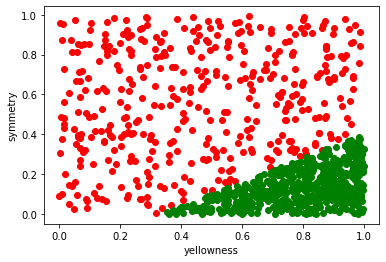

In [7]:
%matplotlib inline
data = np.loadtxt("nn_data.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

In [8]:
data, data.shape

(array([[0.77942731, 0.25730527, 1.        ],
        [0.77700501, 0.0159154 , 1.        ],
        [0.97709225, 0.30420962, 1.        ],
        ...,
        [0.92721921, 0.13498618, 1.        ],
        [0.01582991, 0.48132194, 0.        ],
        [0.96796389, 0.30857107, 1.        ]]),
 (1000, 3))

Данные -  матрица $1000 \times 3$, в каждой строке указаны желтизна и симметричность очередного фрукта (в первой и второй колонках) и его сортовая принадлежность (третья колонка, 0 - яблоки, 1 - груши).

Задача действительно выглядела не очень сложно.

Когда данные были загружены, мы захотели впечатлить Зюка своими познаниями и сразу ринулись писать алгоритм обучения перцептрона, однако Зюк остановил нас, напомнив, что сперва нужно решить, какой вообще будет структура модуля, распознающего яблоки и груши. Мы призадумались, и он с ностальгической улыбкой показал нам одну из своих заготовок:

# Перцептрон

In [9]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        
        ## Этот метод необходимо реализовать
        
        # Короткая версия:
        out = input_matrix.dot(self.w) + self.b > 0
        
        #Длинная версия:
#         column_ones = np.ones((input_matrix.shape[0], 1))
#         input_matrix = np.hstack((column_ones, input_matrix))
#         self.w = np.vstack((np.array([[self.b]]), self.w))
#         out = self.w.T.dot(input_matrix.T).T
        
        out = np.where(out > 0, 1, 0)
        return out
    
        
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """
        
        ## Этот метод необходимо реализовать
        out = int(self.w.T.dot(example) + self.b > 0)
        error = y - out
        self.w = self.w + error * example
        self.b = self.b + error
        return error
        

In [10]:
w = np.array([[1],[1]])
b = 1
x = np.array([[-2,1],[10, 1]])
a = Perceptron(w,b)
a.vectorized_forward_pass(x), a.train_on_single_example(x[:,0], 1)

(array([[0],
        [1]]),
 0)

Оказалось, что это был первый нейрон, который он запрограммировал сам. Он рассказал, что метод `train_on_single_example` остался без реализации, так как в то время веса ему еще готовила мама. Векторизовать он, как и все дети, не любил, поэтому данный метод тоже не готов.

Мы с лёгким нетерпением спросили, можно ли нам что-нибудь запрограммировать. Убедившись, что мы разобрались в приведённом коде, Зюк поставил задачу:

### Реализовать метод `vectorized_forward_pass`

Это метод, который считает значения активационной функции нейрона. 

На вход он принимает матрицу активаций размера $n \times m$ и вектор ответов длины $n$. Каждая строка - отдельный пример. В случае с яблоками и грушами матрица будет размера $n \times 2$, где $n$ - количество примеров, для которых мы хотим получить решения (но, конечно, когда мы будем проверять ваши решения, у данных может быть и другой размер!).  `vectorized_forward_pass` отдаёт столбец (формы $n\times 1$) значений активационной функции нейрона для всех переданных ему входных данных. Зюк предупредил, что если мы будем использовать **циклы** (`for`, `while`) или **операторы ветвления** (`if`) - **решение не пройдёт его внутреннюю проверку**.

Было что-то занудное в его голосе, но что делать? Видимо, это та цена, которую нужно платить, если хочешь, чтобы тебя поняли.

/// Чтобы всё работало - впишите свою реализацию в предоставленный выше шаблон и сдайте функцию на сайте курса, чтобы <br>
/// проверить, что решение правильное. Имейте в виду: наши тесты не охватывают всех возможных характеристик, <br>
/// поэтому постарайтесь делать качественно, иначе незамеченные ошибки могут накапливаться. <br>
/// Не забудьте запустить код в ячейке, иначе Python будет помнить старую версию того, что было написано

### Тестирование

Мы с непривычки здорово намучились, и у нас назрел вопрос: а так ли нужна эта векторизация для классификации яблок?

\- Смотря насколько вы цените своё время, - задумчиво ответил Зюк, - признаюсь, я и сам уже привык
воспринимать векторизацию как что-то само собой разумеющееся, впитанное с молоком матери, как у вас говорят. 

Вдруг что-то озорное появилось в его глазах, и он весело предложил: "Так давайте проверим!".

Выхватив пульт управления, Зюк начал что-то быстро печатать. Не прошло и минуты, как он гордо представил нам свои результаты:


In [11]:
def create_perceptron(m):
    """Создаём перцептрон со случайными весами и m входами"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

In [12]:
def test_v_f_p(n, m):
    """
    Расчитывает для перцептрона с m входами
    с помощью методов forward_pass и vectorized_forward_pass
    n ответов перцептрона на случайных данных.
    Возвращает время, затраченное vectorized_forward_pass и forward_pass
    на эти расчёты.
    """
    
    p = create_perceptron(m)
    input_m = np.random.random_sample((n, m))
    
    start = time.time()
    vec = p.vectorized_forward_pass(input_m)
    end = time.time()
    vector_time = end - start
    
    start = time.time()
    for i in range(0, n):
        p.forward_pass(input_m[i]) 
    end = time.time()
    plain_time = end - start

    return [vector_time, plain_time]

In [13]:
def mean_execution_time(n, m, trials=100):
    """среднее время выполнения forward_pass и vectorized_forward_pass за trials испытаний"""
    
    return np.array([test_v_f_p(m, n) for _ in range(trials)]).mean(axis=0)

def plot_mean_execution_time(n, m):
    """рисует графики среднего времени выполнения forward_pass и vectorized_forward_pass"""
    
    mean_vectorized, mean_plain = mean_execution_time(int(n), int(m))
    p1 = plt.bar([0], mean_vectorized,  color='g')
    p2 = plt.bar([1], mean_plain, color='r')

    plt.ylabel("Time spent")
    plt.yticks(np.arange(0, mean_plain))

    plt.xticks(range(0,1))
    plt.legend(("vectorized","non - vectorized"))

    plt.show()

interact(plot_mean_execution_time, 
            n=RadioButtons(options=["1", "10", "100"]),
            m=RadioButtons(options=["1", "10", "100"], separator=" "));

interactive(children=(RadioButtons(description='n', options=('1', '10', '100'), value='1'), RadioButtons(descr…

Мы принялись увлечённо экспериментировать, чтобы лучше понять, какова разница во времени работы у векторизованного и не векторизованного вариантов при разных `n` и `m`. Нетрудно заметить, что чем больше у нас данных, тем более впечатляющей эта разница становилась. 

## Обучение перцептрона

Отлично, осталось научить наш перцептрон хорошо различать груши и яблоки - и Зюк сможет гулять в саду, не оставаясь при этом голодным! Давайте напишем код, который, приняв на вход пример и правильный ответ, будет изменять веса в соответствии с правилом обучения перцептрона. Это метод `train_on_single_example`, который вам и нужно будет сейчас реализовать.

In [14]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        
        ## Этот метод необходимо реализовать
        out = input_matrix.dot(self.w) + self.b > 0
        out = np.where(out > 0, 1, 0)
        return out
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """

        out = int(self.w.T.dot(example) + self.b > 0)
        error = y - out
        self.w = self.w + error * example
        self.b = self.b + error
        return error
    
    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        """
        input_matrix - матрица входов размера (n, m),
        y - вектор правильных ответов размера (n, 1) (y[i] - правильный ответ на пример input_matrix[i]),
        max_steps - максимальное количество шагов.
        Применяем train_on_single_example, пока не перестанем ошибаться или до умопомрачения.
        Константа max_steps - наше понимание того, что считать умопомрачением.
        """
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)  # int(True) = 1, int(False) = 0, так что можно не делать if

## Визуализация обучения

Отлично! С вашей помощью у Зюка появился перцептрон, который умеет учиться. В благодарность Зюк подготовил несколько функций, которые помогут посмотреть в динамике на то, как протекает процесс обучения перцептрона. 

/// В данном коде детально разбираться не обязательно, главное запустить каждую ячейку и посмотреть на анимацию.
<br>/// Не забудьте остановить анимацию, иначе подвисание через полчаса-час гарантировано.

In [15]:
def plot_line(coefs):
    """
    рисует разделяющую прямую, соответствующую весам, переданным в coefs = (weights, bias), 
    где weights - ndarray формы (2, 1), bias - число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [16]:
def step_by_step_weights(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    возвращает обновлённые веса при каждом их изменении
    p - объект класса Perceptron
    """
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error  # здесь мы упадём, если вы забыли вернуть размер ошибки из train_on_single_example
            if error:  # будем обновлять положение линии только тогда, когда она изменила своё положение
                yield p.w, p.b
                
    for _ in range(20): yield p.w, p.b

<IPython.core.display.Javascript object>


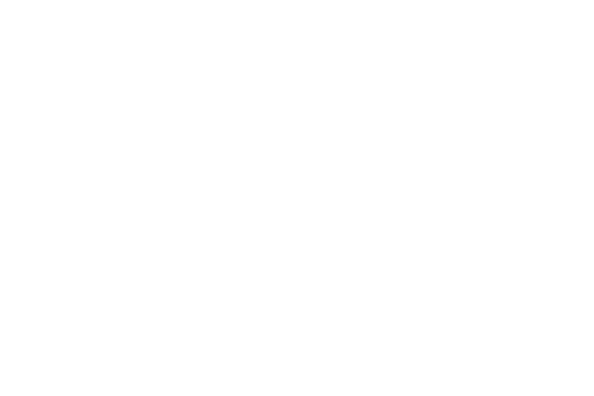

In [17]:
%matplotlib nbagg

np.random.seed(1)
fig = plt.figure()
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red", marker=".", label="Apples")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green", marker=".", label="Pears")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
line, = plt.plot([], [], color="black", linewidth=2)  # создаём линию, которая будет показывать границу разделения

from matplotlib.animation import FuncAnimation

perceptron_for_weights_line = create_perceptron(2)  # создаём перцептрон нужной размерности со случайными весами

from functools import partial
weights_ani = partial(
    step_by_step_weights, p=perceptron_for_weights_line, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis]
)  # про partial почитайте на https://docs.python.org/3/library/functools.html#functools.partial

ani = FuncAnimation(fig, func=plot_line, frames=weights_ani, blit=False, interval=10, repeat=True)
# если Jupyter не показывает вам анимацию - раскомментируйте строчку ниже и посмотрите видео
ani.save("perceptron_seeking_for_solution.mp4", fps=15)
plt.show()

## Не забудьте остановить генерацию новых картинок, прежде чем идти дальше (кнопка "выключить" в правом верхнем углу графика)

Он также подготовил несколько примеров, чтобы проиллюстрировать философию обучения перцептрона, которая не всегда интуитивна.

Во-первых, количество неправильно классифицированных примеров не всегда уменьшается. То есть в процессе обучения у перцептрона могут случаться "взлёты и падения" - делился мудростью Зюк.

In [18]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    и возвращает список из этих количеств
    """
    def count_errors():
        return np.abs(p.vectorized_forward_pass(input_matrix).astype(int) - y).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            errors_list.append(count_errors())
    return errors_list

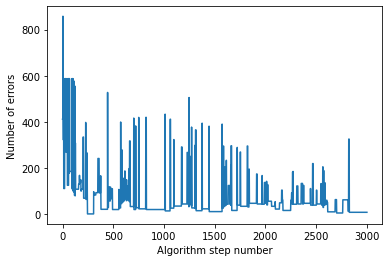

In [19]:
%matplotlib inline
perceptron_for_misclassification = create_perceptron(2)
errors_list = step_by_step_errors(perceptron_for_misclassification, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis])
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");

Мы испугались, что что-то идёт не так, но Зюк успокоил нас, сказав что такой страшный график - следствие нашей философии. Ведь философия обучения перцептрона в том, что лучше будут становиться веса, а не ответы.

"А как именно веса становятся лучше?" - вот вопрос, который теперь волновал каждого из нас. Мы решили посмотреть, как перцептрон научился тому, чему он научился. Возьмём тот вектор весов, к которым перцептрон сошёлся, и посмотрим, как изменяется расстояние до него, пока перцептрон учится.

In [20]:
def get_vector(p):
    """возвращает вектор из всех весов перцептрона, включая смещение"""
    v = np.array(list(p.w.ravel())) + np.array([p.b])
    return v

In [21]:
def step_by_step_distances(p, ideal, input_matrix, y, max_steps=1e6):
    """обучает перцептрон p и записывает каждое изменение расстояния от текущих весов до ideal"""
    distances = [norm(get_vector(p) - ideal)]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            if error:
                distances.append(norm(get_vector(p) - ideal))
    return distances

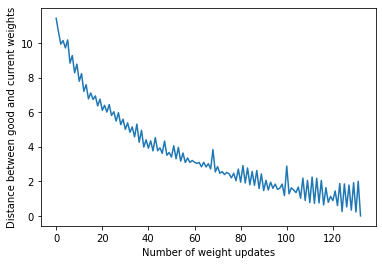

In [22]:
%matplotlib inline

np.random.seed(42)
init_weights = np.random.random_sample(3)
w, b = init_weights[:-1].reshape((2, 1)), init_weights[-1]
ideal_p = Perceptron(w.copy(), b.copy())
ideal_p.train_until_convergence(data[:, :-1], data[:, -1][:,np.newaxis])
ideal_weights = get_vector(ideal_p)

new_p = Perceptron(w.copy(), b.copy())
distances = step_by_step_distances(new_p, ideal_weights, data[:, :-1], data[:, -1][:,np.newaxis])

plt.xlabel("Number of weight updates")
plt.ylabel("Distance between good and current weights")
plt.plot(distances);

Как и можно было догадаться ещё по тому, как вела себя прямая на нашей анимированной картинке, вектор весов постепенно приближается к множеству хороших весов, хотя тоже "не всё гладко". Постарайтесь понять, почему, вспомнив доказательство сходимости перцептрона и понятие "векторов весов, хороших "с запасом"".

# Градиентный спуск

Покончив с перцептроном, Зюк несколько торопливо предложил посмотреть, как в подобной ситуации себя проявит логистический нейрон, основанный на градиентном спуске. В ответ на наши недоумевающие взгляды Зюк смущённо объяснил, что очень боится, что ему когда-нибудь попадётся какое-то "необычное" яблоко или груша. Тогда данные могут перестать быть линейно разделимыми, и он рискует зависнуть, обучая несходящийся перцептрон. Для взрослого Нейрянина допустить такое - большой позор.

Конечно, можно поставить ограничение на число шагов алгоритма... Но если вспомнить, как выглядит график количества ошибок, сразу станет понятно, что мы рискуем получить очень плохой классификатор, если оборвём процесс обучения раньше, чем нужно.

Мы пропросили Зюка не подсказывать нам слишком много на этот раз. Всё-таки мы хотим сами научиться программировать нейросети.
Зюк вежливо согласился, но настоял, чтобы мы посмотрели на его заготовку. Ключевые моменты он спрятал, предоставив нам возможность попрактиковаться.

/// Изучите код и реализуйте пропущенные функции.

In [23]:
## Определим разные полезные функции

def sigmoid(x):
    """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
    return sigmoid(x) * (1 - sigmoid(x))

Класс Neuron нас немного напугал... Такая махина. Зюк заверил нас, что он только кажется большим. На самом деле можно было всё это написать в три-четыре строчки, но вот понять их - это было бы сложнее. Он также извинился за многословность и неоптимальность реализации, объясняя её тем, что "на таком удобнее учиться". Пришлось поверить.

In [24]:
class Neuron:
    
    def __init__(self, weights, activation_function=sigmoid, activation_function_derivative=sigmoid_prime):
        """
        weights - вертикальный вектор весов нейрона формы (m, 1), weights[0][0] - смещение
        activation_function - активационная функция нейрона, сигмоидальная функция по умолчанию
        activation_function_derivative - производная активационной функции нейрона
        """
        
        assert weights.shape[1] == 1, "Incorrect weight shape"
        
        self.w = weights
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward_pass(self, single_input):
        """
        активационная функция логистического нейрона
        single_input - вектор входов формы (m, 1), 
        первый элемент вектора single_input - единица (если вы хотите учитывать смещение)
        """
        
        result = 0
        for i in range(self.w.size):
            result += float(self.w[i] * single_input[i])
        return self.activation_function(result)
    
    def summatory(self, input_matrix):
        """
        Вычисляет результат сумматорной функции для каждого примера из input_matrix. 
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вектор значений сумматорной функции размера (n, 1).
        """
        # Этот метод необходимо реализовать
        return input_matrix.dot(self.w)
    
    def activation(self, summatory_activation):
        """
        Вычисляет для каждого примера результат активационной функции,
        получив на вход вектор значений сумматорной функций
        summatory_activation - вектор размера (n, 1), 
        где summatory_activation[i] - значение суммматорной функции для i-го примера.
        Возвращает вектор размера (n, 1), содержащий в i-й строке 
        значение активационной функции для i-го примера.
        """
        return self.activation_function(summatory_activation)
        
    
    def vectorized_forward_pass(self, input_matrix):
        """
        Векторизованная активационная функция логистического нейрона.
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вертикальный вектор размера (n, 1) с выходными активациями нейрона
        (элементы вектора - float)
        """
        return self.activation(self.summatory(input_matrix))
        
    def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
        """
        Внешний цикл алгоритма градиентного спуска.
        X - матрица входных активаций (n, m)
        y - вектор правильных ответов (n, 1)
        
        learning_rate - константа скорости обучения
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        Вторым вариантом была бы проверка размера градиента, а не изменение функции,
        что будет работать лучше - неочевидно. В заданиях используйте первый подход.
        
        max_steps - критерий остановки номер два: если количество обновлений весов 
        достигло max_steps, то алгоритм останавливается
        
        Метод возвращает 1, если отработал первый критерий остановки (спуск сошёлся) 
        и 0, если второй (спуск не достиг минимума за отведённое время).
        """
        
        # Этот метод необходимо реализовать
#         Реализован ниже
        pass
    
    def update_mini_batch(self, X, y, learning_rate, eps):
        """
        X - матрица размера (batch_size, m)
        y - вектор правильных ответов размера (batch_size, 1)
        learning_rate - константа скорости обучения
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        
        Рассчитывает градиент (не забывайте использовать подготовленные заранее внешние функции) 
        и обновляет веса нейрона. Если ошибка изменилась меньше, чем на eps - возвращаем 1, 
        иначе возвращаем 0.
        """
        # Этот метод необходимо реализовать
        
        # Вычисляем текущее значение целевой функции
        j = 0.5 * np.mean((self.vectorized_forward_pass(X) - y) ** 2)
        y_hat = self.vectorized_forward_pass(X)

        # Вычисляем нужные нам частные производные
        dy_dyhat = (y_hat - y) / len(y) 
        z = self.summatory(X)
        dyhat_dz = self.activation_function_derivative(z)
        dz_dw = X
        
        # Вычисляем градиент
        grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)
        grad = grad.T
        
        # изменим веса
        self.w -= learning_rate * grad
        
        # пересчитываем  целевую функцию с новыми ввесами
        j_new = 0.5 * np.mean((self.vectorized_forward_pass(X) - y) ** 2)
        
        #смотрим как изменилась функция
        delta = np.abs(j - j_new)
        
        # Сравниваем с критерием остановки и преобразовываем в целочисленную переменную
        result = 1 if delta <= eps else 0
        
        return result, self.w

In [25]:
np.random.seed(42)
n = 10
m = 5

X = 20 * np.random.sample((n, m)) - 10
y = (np.random.random(n) < 0.5).astype(int)[:, np.newaxis]
w = 2 * np.random.random((m, 1)) - 1

neuron = Neuron(w)
neuron.update_mini_batch(X, y, 0.1, 1e-5)

# [-0.22368982]
#  [-0.45599204]
#  [ 0.65727411]
#  [-0.28380677]
#  [-0.43011026]]

(0,
 array([[-0.22368982],
        [-0.45599204],
        [ 0.65727411],
        [-0.28380677],
        [-0.43011026]]))

Зюк добавил, что на практике стохастический градиентный спуск обычно ограничивается не по количеству шагов алгоритма, а по количеству эпох обучения. Мы с ужасом переглянулись. Выходит, что Зюк просто не понимает, что земляне редко живут дольше ста лет... "Зюк, - грустно сказали мы, - скорее всего, нам не удастся дождаться окончания работы алгоритма, люди столько не живут". Зюк сперва удивился, потом рассмеялся и объяснил: эпохой обучения называют предъявление всех примеров по одному разу. Обычно батчи формируют так: входные данные перемешиваются, после этого разбиваются на кусочки по batch_size штук в каждом. После того как все примеры хотя бы раз побывали в батче, данные перемешиваются снова. Мы облегчённо вздохнули. Сейчас нам интересно понаблюдать за отдельными изменениями весов, поэтому мы ограничиваем алгоритм не эпохами, а количеством обновлений весов.

Далее он показал нам код для расчета целевой функции и её градиента. Приятно было осознавать, что целевую функцию можно будет очень легко заменить, если нам захочется.

In [26]:
def J_quadratic(neuron, X, y):
    """
    Оценивает значение квадратичной целевой функции.
    Всё как в лекции, никаких хитростей.

    neuron - нейрон, у которого есть метод vectorized_forward_pass, предсказывающий значения на выборке X
    X - матрица входных активаций (n, m)
    y - вектор правильных ответов (n, 1)
        
    Возвращает значение J (число)
    """
    
    assert y.shape[1] == 1, 'Incorrect y shape'
    
    return 0.5 * np.mean((neuron.vectorized_forward_pass(X) - y) ** 2)

def J_quadratic_derivative(y, y_hat):
    """
    Вычисляет вектор частных производных целевой функции по каждому из предсказаний.
    y_hat - вертикальный вектор предсказаний,
    y - вертикальный вектор правильных ответов,
    
    В данном случае функция смехотворно простая, но если мы захотим поэкспериментировать 
    с целевыми функциями - полезно вынести эти вычисления в отдельный этап.
    
    Возвращает вектор значений производной целевой функции для каждого примера отдельно.
    """
    
    assert y_hat.shape == y.shape and y_hat.shape[1] == 1, 'Incorrect shapes'
    
    return (y_hat - y) / len(y)
    
def compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative):
    """
    Аналитическая производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для примеров из матрицы X
    J_prime - функция, считающая производные целевой функции по ответам
    
    Возвращает вектор размера (m, 1)
    """
    
    # Вычисляем активации
    # z - вектор результатов сумматорной функции нейрона на разных примерах
    
    z = neuron.summatory(X)
    y_hat = neuron.activation(z)

    # Вычисляем нужные нам частные производные
    dy_dyhat = J_prime(y, y_hat)
    dyhat_dz = neuron.activation_function_derivative(z)
    
    # осознайте эту строчку:
    dz_dw = X

    # а главное, эту:
    grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)
    
    # можно было написать в два этапа. Осознайте, почему получается одно и то же
    # grad_matrix = dy_dyhat * dyhat_dz * dz_dw
    # grad = np.sum(, axis=0)
    
    # Сделаем из горизонтального вектора вертикальный
    grad = grad.T
    
    return grad

In [27]:
# добавим метод SGD
# и задействуем имеющиеся функции

class Neuron:
    
    def __init__(self, weights, activation_function=sigmoid, activation_function_derivative=sigmoid_prime):
        """
        weights - вертикальный вектор весов нейрона формы (m, 1), weights[0][0] - смещение
        activation_function - активационная функция нейрона, сигмоидальная функция по умолчанию
        activation_function_derivative - производная активационной функции нейрона
        """
        
        assert weights.shape[1] == 1, "Incorrect weight shape"
        
        self.w = weights
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward_pass(self, single_input):
        """
        активационная функция логистического нейрона
        single_input - вектор входов формы (m, 1), 
        первый элемент вектора single_input - единица (если вы хотите учитывать смещение)
        """
        
        result = 0
        for i in range(self.w.size):
            result += float(self.w[i] * single_input[i])
        return self.activation_function(result)
    
    def summatory(self, input_matrix):
        """
        Вычисляет результат сумматорной функции для каждого примера из input_matrix. 
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вектор значений сумматорной функции размера (n, 1).
        """
        # Этот метод необходимо реализовать
        return input_matrix.dot(self.w)
    
    def activation(self, summatory_activation):
        """
        Вычисляет для каждого примера результат активационной функции,
        получив на вход вектор значений сумматорной функций
        summatory_activation - вектор размера (n, 1), 
        где summatory_activation[i] - значение суммматорной функции для i-го примера.
        Возвращает вектор размера (n, 1), содержащий в i-й строке 
        значение активационной функции для i-го примера.
        """
        return self.activation_function(summatory_activation)
        
    
    def vectorized_forward_pass(self, input_matrix):
        """
        Векторизованная активационная функция логистического нейрона.
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных.
        Возвращает вертикальный вектор размера (n, 1) с выходными активациями нейрона
        (элементы вектора - float)
        """
        return self.activation(self.summatory(input_matrix))
        
    def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
        """
        Внешний цикл алгоритма градиентного спуска.
        X - матрица входных активаций (n, m)
        y - вектор правильных ответов (n, 1)
        
        learning_rate - константа скорости обучения
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        Вторым вариантом была бы проверка размера градиента, а не изменение функции,
        что будет работать лучше - неочевидно. В заданиях используйте первый подход.
        
        max_steps - критерий остановки номер два: если количество обновлений весов 
        достигло max_steps, то алгоритм останавливается
        
        Метод возвращает 1, если отработал первый критерий остановки (спуск сошёлся) 
        и 0, если второй (спуск не достиг минимума за отведённое время).
        """
        
        # Этот метод необходимо реализовать

        batches = len(y) // batch_size
        for epoch in range(max_steps):
            inx = np.arange(len(y))
            np.random.shuffle(inx)
            X = X[inx]
            y = y[inx]
            start, end = 0, batch_size
            for batch in range(batches):
                if self.update_mini_batch(X[start:end], y[start:end], learning_rate, eps):
                    return 1
                start, end = end, start + batch_size
        return 0
        
    def update_mini_batch(self, X, y, learning_rate, eps):
        """
        X - матрица размера (batch_size, m)
        y - вектор правильных ответов размера (batch_size, 1)
        learning_rate - константа скорости обучения
        eps - критерий остановки номер один: если разница между значением целевой функции 
        до и после обновления весов меньше eps - алгоритм останавливается. 
        
        Рассчитывает градиент (не забывайте использовать подготовленные заранее внешние функции) 
        и обновляет веса нейрона. Если ошибка изменилась меньше, чем на eps - возвращаем 1, 
        иначе возвращаем 0.
        """
        j = J_quadratic(self, X, y)
        grad = compute_grad_analytically(self, X, y)
        self.w -= learning_rate * grad
        j_new = J_quadratic(self, X, y)
        delta = np.abs(j - j_new)
        result = 1 if delta <= eps else 0
        return result

In [28]:
np.random.seed(42)
n = 100
m = 5

X = 20 * np.random.sample((n, m)) - 10
y = (np.random.random(n) < 0.5).astype(int)[:, np.newaxis]
w = 2 * np.random.random((m, 1)) - 1

neuron = Neuron(w)
neuron.update_mini_batch(X, y, 0.1, 1e-5)
neuron.SGD( X, y, 8, learning_rate=0.1, eps=1e-6, max_steps=200)

/home/andr/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/andr/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1

Однако нам в голову пришла тревожная мысль.. А вдруг при расчёте градиента допущена ошибка?  

Как мы говорили в лекциях, неплохо бы проверить, правильно ли мы считаем градиенты, до того, как куда-то по этим градиентам спускаться. Зюк, например, долго пытался понять, как нам удалось сделать тот градиентный спуск, что мы показывали вам в лекции под саундтрек из "Секретных материалов". А мы всего-то забыли одну матрицу обратить, когда производную считали.

Сейчас мы проверим, правильно ли считаются производные целевой функции: мы реализуем подсчёт частных производных по определению, как $$\frac{\partial f}{\partial x_i} = \frac{f\left(x_1,\ldots,x_{i-1}, x_i + \Delta x, x_{i+1}, \ldots, x_d\right) - f\left(x_1,\ldots, x_d\right)}{\Delta x}.$$ Это не определение, в определении был бы $\lim _{\Delta x\to 0}$! Но если мы возьмём достаточно малое $\Delta x$, то приближение будет неплохим.

Иными словами, мы посчитаем целевую функцию, чуть-чуть поменяем какой-нибудь вес, после этого посчитаем целевую функцию еще раз, дальше применяем определение, то есть разделим разницу в целевой функции на изменение веса.

После этого можно будет сравнить результаты, полученные с помощью аналитического и численного метода: они не должны сильно отличаться.

Вы уже должны догадываться, почему мы не можем всегда обходиться только лишь численным нахождением производной, но пример, непосредственно это иллюстрирующий, появится на следующей неделе.

In [29]:
def compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции
    neuron - объект класса Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для тестовой выборки X
    J - целевая функция, градиент которой мы хотим получить
    eps - размер $\delta w$ (малого изменения весов)
    """

    initial_cost = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J(neuron, X, y) - initial_cost)/eps
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

Давайте посмотрим, что у нас получилось:

In [30]:
# Подготовим данные

X = data[:, :-1]
y = data[:, -1]

X = np.hstack((np.ones((len(y), 1)), X))
y = y.reshape((len(y), 1)) # Обратите внимание на эту очень противную и важную строчку


# Создадим нейрон

w = np.random.random((X.shape[1], 1))
neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

# Посчитаем пример
num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic)
an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)

print("Численный градиент: \n", num_grad)
print("Аналитический градиент: \n", an_grad)

Численный градиент: 
 [[0.02579081]
 [0.00093842]
 [0.0288449 ]]
Аналитический градиент: 
 [[ 0.02400966]
 [-0.00010411]
 [ 0.02891813]]


"Вроде бы похоже", но это не очень удовлетворительный ответ. Давайте посмотрим, как меняется наше приближение в зависимости от $\varepsilon$. Посчитаем для разных $\varepsilon$ модуль разности этих двух градиентов.

In [31]:
def print_grad_diff(eps):
    num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))
    
interact(print_grad_diff, 
            eps=RadioButtons(options=["3", "1", "0.1", "0.001", "0.0001"]), separator=" ");

interactive(children=(RadioButtons(description='eps', options=('3', '1', '0.1', '0.001', '0.0001'), value='3')…

Неплохо, но можно лучше, причем с минимумом усилий.
Давайте вместо того, чтобы считать $\frac{f(x) - f(x + \Delta x)}{\Delta x}$, посмотрим на $\frac{f(x  + \Delta x) - f(x - \Delta x)}{2 \Delta x}$, то есть шагнём в обе стороны. Говорят, что на практике этот метод работает лучше.

Реализуйте функцию compute_grad_numerically_2, чтобы проверить, слухи это или нет.

In [32]:
def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции.
    neuron - объект класса Neuron с вертикальным вектором весов w,
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений,
    y - правильные ответы для тестовой выборки X,
    J - целевая функция, градиент которой мы хотим получить,
    eps - размер $\delta w$ (малого изменения весов).
    """
    
    # эту функцию необходимо реализовать
    w_0 = neuron.w
    J_plus = np.zeros(w_0.shape)
    J_minus = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        old_wi = neuron.w[i].copy()
        
        # Меняем вес + eps
        neuron.w[i] += eps
        J_plus[i] = J(neuron, X, y)
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
        
        # Меняем вес - eps
        neuron.w[i] -= eps
        J_minus[i] = J(neuron, X, y)
        
        # Возвращаем вес обратно.
        neuron.w[i] = old_wi
        
    # целевая функция, градиент которой мы хотим получить
    num_grad = (J_plus - J_minus) / (2 * eps)  
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

In [33]:
# Подготовим данные

X = data[:, :-1]
y = data[:, -1]

X = np.hstack((np.ones((len(y), 1)), X))
y = y.reshape((len(y), 1)) # Обратите внимание на эту очень противную и важную строчку


# Создадим нейрон

w = np.random.random((X.shape[1], 1))
neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

# Посчитаем пример
num_grad = compute_grad_numerically_2(neuron, X, y, J=J_quadratic)
an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)

print("Численный градиент: \n", num_grad)
print("Аналитический градиент: \n", an_grad)

Численный градиент: 
 [[ 0.01133219]
 [-0.01058444]
 [ 0.02740118]]
Аналитический градиент: 
 [[ 0.01140753]
 [-0.01056366]
 [ 0.0274187 ]]


Давайте посмотрим, к какому результату привели ваши эксперименты:

In [34]:
def print_grad_diff_2(eps):
    num_grad = compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))
    
interact(print_grad_diff_2, 
            eps=RadioButtons(options=["3", "1", "0.1", "0.001", "0.0001"]), separator=" ");

interactive(children=(RadioButtons(description='eps', options=('3', '1', '0.1', '0.001', '0.0001'), value='3')…

Перед нами тот редкий случай, когда фраза **"на порядок лучше"** - очевидное преуменьшение!

## Визуализация

Мы сидели, уставшие, но довольные проделанной работой, как вдруг Зюк оживлённо воскликнул:

-- У нас ведь всего два входа! 

-- И что? - удивлённо спросили мы. 

-- А то, что если мы зафиксируем значение смещения, то можем полноценно визуализировать целевую функцию. Неужели вам не хочется посмотреть, как она выглядит в этой задачке? А еще.. А еще давайте добавим возможность перемешивать и сдвигать данные! Как вам такая идея?

Не дождавшись ответа, Зюк начал программировать. Он выглядел очень возбуждённым.

In [35]:
def J_by_weights(weights, X, y, bias):
    """
    Посчитать значение целевой функции для нейрона с заданными весами.
    Только для визуализации
    """
    new_w = np.hstack((bias, weights)).reshape((3,1))
    return J_quadratic(Neuron(new_w), X, y)

In [36]:
%matplotlib inline
# %matplotlib qt4

max_b = 40
min_b = -40
max_w1 = 40
min_w1 = -40
max_w2 = 40
min_w2 = -40

g_bias = 0 # график номер 2 будет при первой генерации по умолчанию иметь то значение b, которое выставлено в первом
X_corrupted = X.copy()
y_corrupted = y.copy()

@interact(fixed_bias=FloatSlider(min=min_b, max=max_b, continuous_update=False), 
          mixing=FloatSlider(min=0, max=1, continuous_update=False, value=0),
          shifting=FloatSlider(min=0, max=1, continuous_update=False, value=0)
            )
def visualize_cost_function(fixed_bias, mixing, shifting):
    """
    Визуализируем поверхность целевой функции на (опционально) подпорченных данных и сами данные.
    Портим данные мы следующим образом: сдвигаем категории навстречу друг другу, на величину, равную shifting 
    Кроме того, меняем классы некоторых случайно выбранных примеров на противоположнее.
    Доля таких примеров задаётся переменной mixing
    
    Нам нужно зафиксировать bias на определённом значении, чтобы мы могли что-нибудь визуализировать.
    Можно посмотреть, как bias влияет на форму целевой функции
    """
    xlim = (min_w1, max_w1)
    ylim = (min_w2, max_w2)
    xx = np.linspace(*xlim, num=101)
    yy = np.linspace(*ylim, num=101)
    xx, yy = np.meshgrid(xx, yy)
    points = np.stack([xx, yy], axis=2)
    
    # не будем портить исходные данные, будем портить их копию
    corrupted = data.copy()
    
    # инвертируем ответы для случайно выбранного поднабора данных
    mixed_subset = np.random.choice(range(len(corrupted)), int(mixing * len(corrupted)), replace=False)
    corrupted[mixed_subset, -1] = np.logical_not(corrupted[mixed_subset, -1])
    
    # сдвинем все груши (внизу справа) на shifting наверх и влево
    pears = corrupted[:, 2] == 1
    apples = np.logical_not(pears)
    corrupted[pears, 0] -= shifting
    corrupted[pears, 1] += shifting
    
    # вытащим наружу испорченные данные
    global X_corrupted, y_corrupted
    X_corrupted = np.hstack((np.ones((len(corrupted),1)), corrupted[:, :-1]))
    y_corrupted = corrupted[:, -1].reshape((len(corrupted), 1))
    
    # посчитаем значения целевой функции на наших новых данных
    calculate_weights = partial(J_by_weights, X=X_corrupted, y=y_corrupted, bias=fixed_bias)
    J_values = np.apply_along_axis(calculate_weights, -1, points)
    
    fig = plt.figure(figsize=(16,5))
    # сначала 3D-график целевой функции
    ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax_1.plot_surface(xx, yy, J_values, alpha=0.3)
    ax_1.plot_wireframe(xx, yy, J_values, rcount=11, ccount=11, alpha=0.5, color="black")
    ax_1.scatter(0, 0, 0) 
    ax_1.set_xlabel("$w_1$")
    ax_1.set_ylabel("$w_2$")
    ax_1.set_zlabel("$J(w_1, w_2)$")
    ax_1.set_title("$J(w_1, w_2)$ for fixed bias = ${}$".format(fixed_bias))
    # потом плоский поточечный график повреждённых данных
    ax_2 = fig.add_subplot(1, 2, 2)
    plt.scatter(corrupted[apples][:, 0], corrupted[apples][:, 1], color = "red", alpha=0.7)
    plt.scatter(corrupted[pears][:, 0], corrupted[pears][:, 1], color = "green", alpha=0.7)
    ax_2.set_xlabel("yellowness")
    ax_2.set_ylabel("symmetry")

    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='fixed_bias', max=40.0, min=…

Мы с интересом рассматривали результат. По форме функции становилось понятно, что градиентный спуск будет обычно попадать в ловушку. На графике видна огромная яма, прижимающаяся своим дном к нулю. 

Это происходит от того, что данные линейно разделимы, и мы всегда можем увеличить хорошие веса, получив еще более хорошие (подумайте, почему это так).

Еще страшнее выглядят плоские участки. Как вы думаете, застрянем мы не них или нет?

Следующим графиком Зюк особенно нас порадовал. Можно было выбрать точку и bias, откуда мы хотим начать градиентный спуск, после чего его программа генерировала "историю обучения" (learning curve) - график значений целевой функции после очередного обновления весов. 

Смотря на поверхность целевой функции мы старались предсказать, к каким весам мы придём, если начнём спуск с той или иной точки. Оказалось что всё не так очевидно, как мы думали.

На графике ниже видно, что при "хорошем" раскладе (мы попали в большую яму) значение целевой функции всё время уменьшалось (хоть и по чуть-чуть), пока мы не достигали порога по количеству итераций. При плохом мы могли просто застрять в локальном минимуме или выйти на плато. 

\\\\ Как можно бороться с подобными ловушками мы поговорим на третьей и четвёртой неделях.

***Если в предыдущем задании вы "подпортили" данные - график будет строиться именно для подпорченных =)***

In [37]:
@interact(b=BoundedFloatText(value=str(g_bias), min=min_b, max=max_b, description="Enter $b$:"),
          w1=BoundedFloatText(value="0", min=min_w1, max=max_w1, description="Enter $w_1$:"),
          w2=BoundedFloatText(value="0", min=min_w2, max=max_w2, description="Enter $w_2$:"),
          learning_rate=Dropdown(options=["0.01", "0.05", "0.1", "0.5", "1", "5", "10"], 
                                value="0.01", description="Learning rate: ")
         )
def learning_curve_for_starting_point(b, w1, w2, learning_rate=0.1):
    w = np.array([b, w1, w2]).reshape(X_corrupted.shape[1], 1)
    learning_rate=float(learning_rate)
    neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)
    
    n = 2000
    story = [0]*n
    story[0] = J_quadratic(neuron, X_corrupted, y_corrupted)
    for i in range(1, n):
        neuron.SGD(X_corrupted, y_corrupted, 2, learning_rate=learning_rate, max_steps=2)
        story[i] = J_quadratic(neuron, X_corrupted, y_corrupted)
    plt.plot(story)
    
    plt.title("Learning curve.\n Final $b={0:.3f}$, $w_1={1:.3f}, w_2={2:.3f}$".format(*neuron.w.ravel()))
    plt.ylabel("$J(w_1, w_2)$")
    plt.xlabel("Weight and bias update number")
    plt.show()

interactive(children=(BoundedFloatText(value=0.0, description='Enter $b$:', max=40.0, min=-40.0), BoundedFloat…

Близился вечер, и мы решили, что на сегодня уже утолили жажду программирования и познания. 
Даже Зюк выглядел немного утомлённым, насколько можно было судить по его инопланетной мимике.
Он пообещал, что в следующий раз мы сможем сделать настоящую нейросеть, и мы отправились спать,
думая о предстоящей встрече.

Однако, не все. Кто-то из наших так увлёкся, что уже сейчас, не дожидаясь следующей встречи, отправился заменять целевые и активационные функции нейронов, наблюдая, как это отразится на результатах.


## Задача

Выберите наборы весов и смещений, которые позволят изображенному многослойному перцептрону (в данном случае это сеть из "перцептронов" в понимании предыдущей недели) решать проблему XOR. XOR — логическая функция от двух переменных (которые будут подаваться на входы перцептрону) со следующей таблицей истинности: 

\begin{array}{cc|c} a & b & a\; \mathrm{XOR}\; b \\ \hline 0 & 0 & 0 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \end{array}


In [38]:
class Perceptron:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def forward_pass(self, single_input):
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b

        if result > 0:
            return 1
        else:
            return 0

    def train_on_single_example(self, example, y):
#         out = int(self.w.T.dot(example) + self.b > 0) # в матричном виде, без self.forward_pass
        out = self.forward_pass(example)
        error = y - out
        self.w = self.w + error * example
        self.b = self.b + error
        return error
    
    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += 0 if error == 0 else 1

Формула для исключающего ИЛИ:

XOR=OR(And[not(a),b], And[a,not(b)])

Обучим 3 перцептрона:

1) And[not(a),b]

2) And[a,not(b)]

3) OR[a,b] (где a и b - первые две части)

In [39]:
# Входы, выходы для первого перцептрона And[not(a),b]
# X1 X2  Y
# 0  0  0
# 0  1  1
# 1  0  0
# 1  1  0

In [40]:
w = np.array([[1], [1]]) #начальные веса
b = 0
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [0], [0]])
per1 = Perceptron(w,b)

In [41]:
per1.train_until_convergence(x, y)
per1.w, per1.b

(array([[-2],
        [ 2]]),
 array([0]))

In [42]:
# Входы, выходы для второго перцептрона And[a, not(b)]
# X1 X2  Y
# 0  0  0
# 0  1  0
# 1  0  1
# 1  1  0

In [43]:
w = np.array([[1], [1]]) #начальные веса
b = 0
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [1], [0]])
per2 = Perceptron(w,b)

per2.train_until_convergence(x, y)
per2.w, per2.b

(array([[ 2],
        [-2]]),
 array([0]))

In [44]:
# Входы, выходы для третьего перцептрона OR[per1, per2]
# per1 per2  Y
# 0  0  0
# 1  0  1
# 0  1  1
# 0  0  0

In [45]:
w = np.array([[1], [1]]) #начальные веса
b = 0
x = np.array([[0, 0], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
per3 = Perceptron(w,b)

per3.train_until_convergence(x, y)
per3.w, per3.b

(array([[1],
        [1]]),
 array([0]))

#### Формулы для расчета обратного распостронения ошибки.
#### Ошибка на выходе сети:
\begin{eqnarray}
  \delta^L_j = \frac{\partial J}{\partial z^L_j}.
\end{eqnarray}
#### Через частные производные:
\begin{eqnarray}
  \delta^L_j = \frac{\partial J}{\partial a^L_j} \frac{\partial a^L_j}{\partial z^L_j}
\end{eqnarray}
#### Сделаем замену на производную сигмоиды по сумматорной функции
\begin{eqnarray}
  \delta^L_j = \frac{\partial J}{\partial a^L_j} \sigma'(z^L_j)
\end{eqnarray}
#### Теперь найдем ошибку для предыдущего слоя
\begin{eqnarray}
  \delta^l_j & = & \frac{\partial J}{\partial z^l_j} \
  & = & \sum_k \frac{\partial J}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial z^l_j} \ 
  & = & \sum_k \frac{\partial z^{l+1}_k}{\partial z^l_j} \delta^{l+1}_k
\end{eqnarray}

\begin{eqnarray}
  z^{l+1}_k = \sum_j w^{l+1}_{kj} a^l_j +b^{l+1}_k = \sum_j w^{l+1}_{kj} \sigma(z^l_j) +b^{l+1}_k
\end{eqnarray}

\begin{eqnarray}
  \frac{\partial z^{l+1}_k}{\partial z^l_j} = w^{l+1}_{kj} \sigma'(z^l_j)
\end{eqnarray}

\begin{eqnarray}
  \delta^l_j = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j).
\end{eqnarray}

## Задача


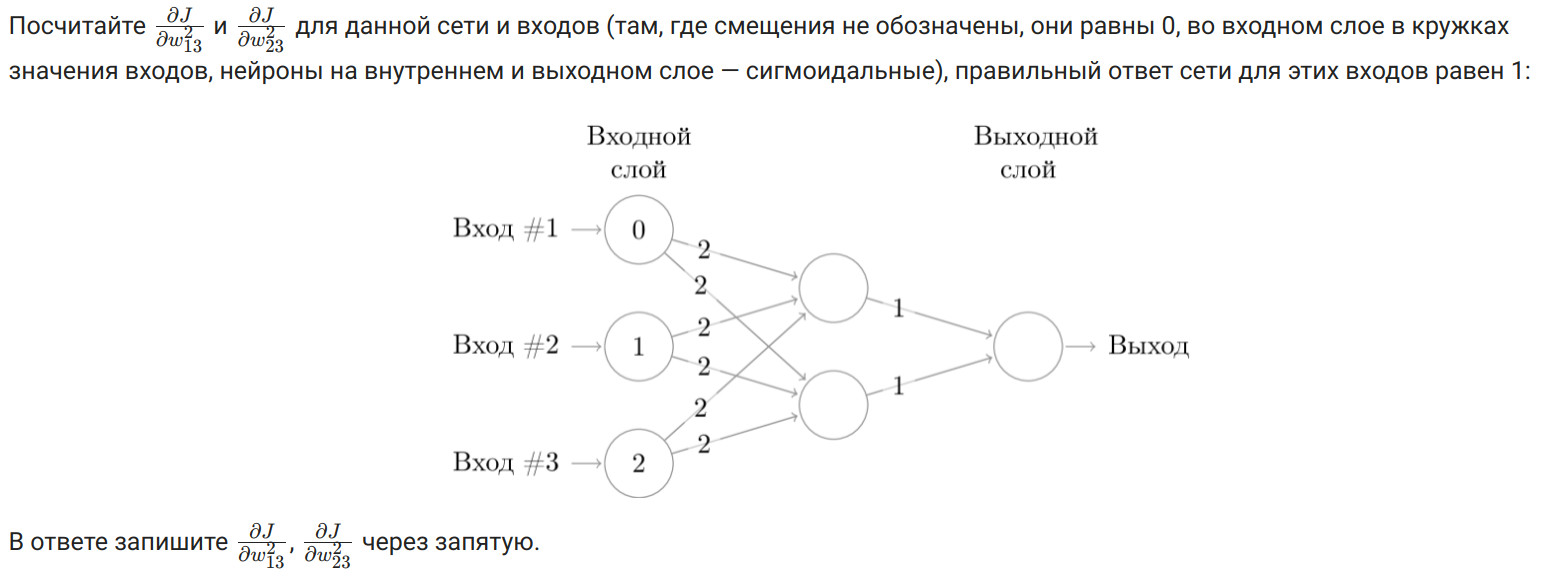

\begin{eqnarray}
\frac{\partial J}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j
\end{eqnarray}

In [46]:
import numpy as np

class myNET:
    def __init__(self, x, y, w1, w2):
        self.x = x
        self.y = y
        self.w1 = w1
        self.w2 = w2
        assert self.w1.shape[-1] == self.x.shape[0], print(self.w1.shape[-1], self.x.shape[0])  
      
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
        
    def out(self):
        z1 = self.w1.dot(self.x)
        a1 = self.sigmoid(z1)
        z2 = self.w2.dot(a1)
        a2 = self.sigmoid(z2)
        J_prime_a2 = (a2 - self.y) 
        delta2 = J_prime_a2 * self.sigmoid_prime(z2)
        delta1 = self.w2.T.dot(delta2) * self.sigmoid_prime(z1)
        J_prime_w2_13 = self.x[2] * delta1[0] 
        J_prime_w2_23 = self.x[2] * delta1[1] 
        return J_prime_w2_13, J_prime_w2_23
        

x = np.array([0,1,2])
y = 1
w1 = np.array([[2,2,2], [2,2,2]])
w2 = np.array([[1, 1]])

model = myNET(x, y, w1, w2)
print(model.out())

(-6.224265322988261e-05, -6.224265322988261e-05)


In [47]:
x = np.array([0,1,2])
y = 1
w1 = np.array([[8,7,8], [10,10,9]])
w2 = np.array([[10, 9]])

model = myNET(x, y, w1, w2)
print(model.out())

(-6.442680940037641e-26, -3.906978540570875e-28)


In [48]:
x = np.array([15,5,15])
y = 1
w1 = np.array([[0.2,0.9,0.6], [0.2,0.3,0.7]])
w2 = np.array([[0.2, 0.5]])

model = myNET(x, y, w1, w2)
print(model.out())

(-1.506418404811943e-08, -1.6878239245363882e-07)


![](
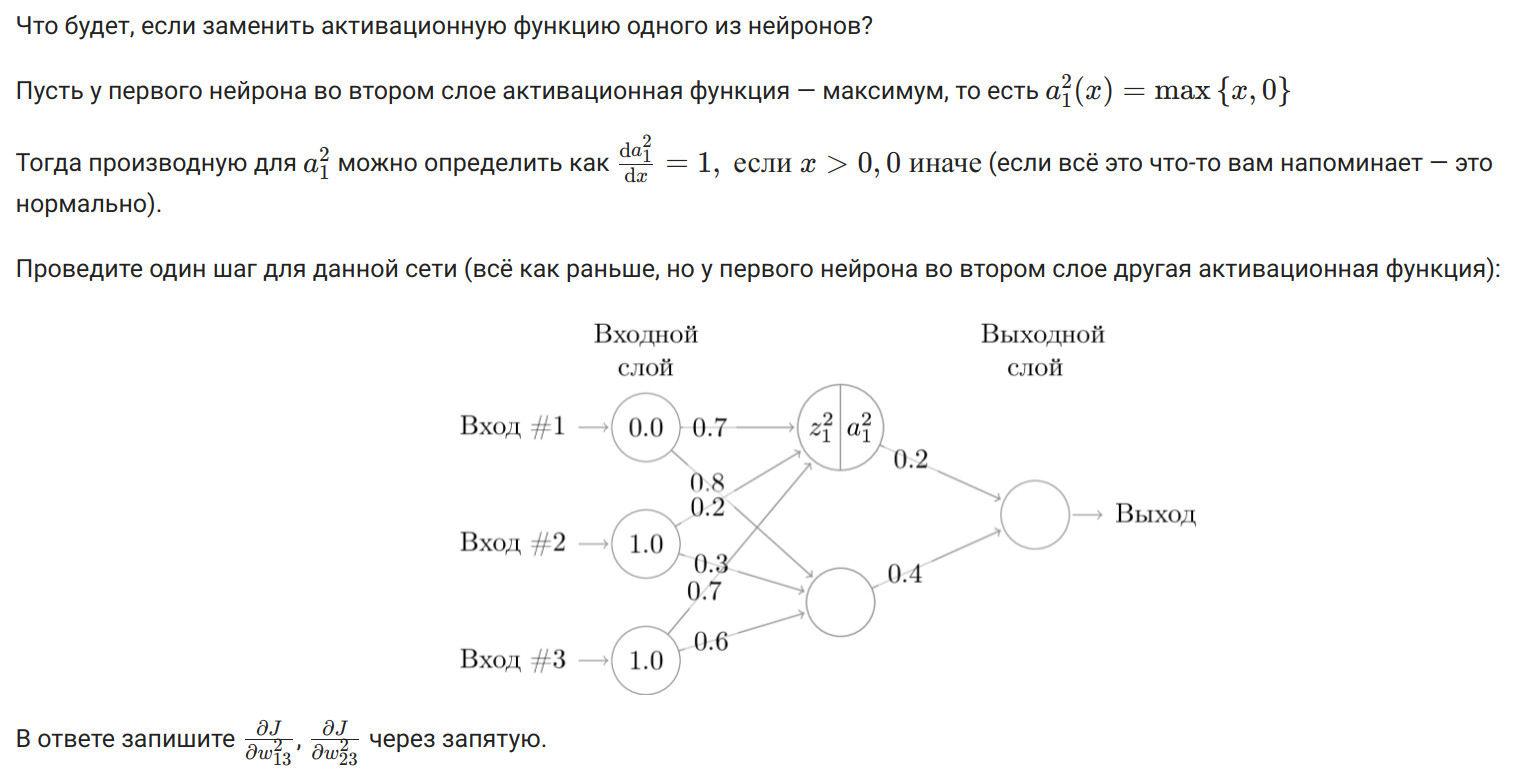
)

In [49]:
import numpy as np

class myNET:
    def __init__(self, x, y, w1, w2):
        self.x = x
        self.y = y
        self.w1 = w1
        self.w2 = w2
        assert self.w1.shape[-1] == self.x.shape[0], print(self.w1.shape[-1], self.x.shape[0])  
      
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    def new_activation(self, z):
        return np.max(z, 0)
    
    def new_activation_prime(self, z):
        return 1 if self.new_activation(z) > 0 else 0
        
    def out(self):
        z1 = self.w1.dot(self.x)
#       теперь у нас разные функции активации для первого и второго нейрона во втором слое
        a1_1 = self.new_activation(z1[0])
        a1_2 = self.sigmoid(z1[1])
        z2 = self.w2.dot([a1_1] + [a1_2])
        a2 = self.sigmoid(z2)
        J_prime_a2 = (a2 - self.y) 
        delta2 = J_prime_a2 * self.sigmoid_prime(z2)
        
#       при обратном проходе тоже берем разные активации и их производные   
        new_activations = np.array([self.new_activation_prime(z1[0]), self.sigmoid_prime(z1[1])])
        delta1 = self.w2.T.dot(delta2) * new_activations
        J_prime_w2_13 = self.x[2] * delta1[0] 
        J_prime_w2_23 = self.x[2] * delta1[1] 
        return J_prime_w2_13, J_prime_w2_23
        

x = np.array([0,1,1])
y = 1
w1 = np.array([[0.7,0.2,0.7], [0.8,0.3,0.6]])
w2 = np.array([[0.2, 0.4]])

model = myNET(x, y, w1, w2)
print(model.out())

(-0.018293284971249293, -0.0075185513677826785)


Попробуем реализовать XOR

In [50]:
import numpy as np
import random


class myNET:
    def __init__(self, x, y, w1, w2, b, lr):
        self.x = x
        self.y = y
        self.w1 = w1
        self.w2 = w2
        self.learning_rate = lr
        self.b = b
        assert self.w1.shape[-1] == self.x.shape[0], print(self.w1.shape[-1], self.x.shape[0])  
      
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    def forward_pass(self, x):
        z1 = self.w1.dot(x)
        a1 = self.sigmoid(z1)
        z2 = self.w2.dot(a1)
        a2 = self.sigmoid(z2)
#         J = np.sum((a2 - y) ** 2)
        return np.where(a2 < 0.3, 0, 1)
        
    def train(self):
        i = 0
        errors = 1
        max_steps = 10000
        while errors and i < max_steps:
            i += 1
            for sample in range(len(y)): 
    #             print(errors)
    #             errors = 0 if J <= 0.1 else 1  

#                 print(self.w1, self.x[:,sample])
                z1 = self.w1.dot(self.x[:,sample])
#                 print('z1', z1)
                a1 = self.sigmoid(z1)
#                 print('a1', a1)
#                 print(self.w2, a1)
                z2 = self.w2.dot(a1)
#                 print('z2', z2)
                a2 = self.sigmoid(z2)
                print('a2', a2, y[sample], self.x[:,sample])
                J_prime = (a2 - y[sample])
    #             print('J_prime', J_prime)
                delta2 = J_prime * self.sigmoid_prime(z2)
                delta1 = self.w2.T.dot(delta2) * self.sigmoid_prime(z1)
    #             print('delta2', delta2)
    #             print('delta1', delta1)
    #             print(a1 * delta2 * self.learning_rate, self.x * delta1 * self.learning_rate)
    #             print(self.w2)
    #             print('self.w2', self.w2)
    #             print('self.w1', self.w1.shape)
    #             print('self.x', self.x.shape)
    #             print(self.x[:,0], delta1[:,0])
    #             print(np.sum(self.x * delta1, axis=1)* self.learning_rate)
#                 print(self.w1[:,0], self.w2[:,0])
                self.w2 -= a1 * delta2 * self.learning_rate
                self.w1 -= self.x[:,sample] * delta1 * self.learning_rate
                t = self.forward_pass(self.x)[0]
                errors = np.any(y != t)
#                 print(y, t, errors)
                if not errors: 
                    print('bingo1')
                    errors = 0
                    break
                
#             print(i)       
#             print('self.w2', self.w2)
#             print('self.w1', self.w1)
#             if i > 3: return
#             print(y, self.forward_pass(self.x)[0])
#             errors = np.any(y != self.forward_pass(self.x)[0])
        print(i)


        
            

        

# x = np.array([0,1,2])
# y = 1
# w1 = np.array([[2,2,2], [2,2,2]])
# w2 = np.array([[1, 1]])

# model = myNET(x, y, w1, w2)
# print(model.out())
                
w1 = np.array([[random.random(), random.random()], 
               [random.random(), random.random()]]) #начальные веса
w2 = np.array([[random.random(), random.random()]])
b = 1
x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([0, 1, 1, 0])

model = myNET(x, y, w1, w2, b, 0.5)

# model.forward_pass()

print(w1, w2)
for i in range(1):
    model.train()
    
    if (model.forward_pass(x) == np.array([[0, 1, 1, 0]])).all():
        print('bingo')
        break


[[0.6394268  0.02501076]
 [0.27502932 0.22321074]] [[0.73647121 0.67669949]]
a2 [0.66964621] 0 [0 0]
a2 [0.67028431] 1 [0 1]
a2 [0.69951407] 1 [1 0]
a2 [0.71357742] 0 [1 1]
a2 [0.65954523] 0 [0 0]
a2 [0.65917011] 1 [0 1]
a2 [0.68751553] 1 [1 0]
a2 [0.7012436] 0 [1 1]
a2 [0.64974605] 0 [0 0]
a2 [0.64845593] 1 [0 1]
a2 [0.67588804] 1 [1 0]
a2 [0.68931133] 0 [1 1]
a2 [0.64029075] 0 [0 0]
a2 [0.63818021] 1 [0 1]
a2 [0.66468324] 1 [1 0]
a2 [0.67783248] 0 [1 1]
a2 [0.63121251] 0 [0 0]
a2 [0.62837079] 1 [0 1]
a2 [0.65394082] 1 [1 0]
a2 [0.66684587] 0 [1 1]
a2 [0.62253576] 0 [0 0]
a2 [0.61904564] 1 [0 1]
a2 [0.64368909] 1 [1 0]
a2 [0.65637805] 0 [1 1]
a2 [0.61427671] 0 [0 0]
a2 [0.61021393] 1 [0 1]
a2 [0.63394586] 1 [1 0]
a2 [0.64644467] 0 [1 1]
a2 [0.60644418] 0 [0 0]
a2 [0.60187717] 1 [0 1]
a2 [0.62471973] 1 [1 0]
a2 [0.63705182] 0 [1 1]
a2 [0.59904046] 0 [0 0]
a2 [0.59403052] 1 [0 1]
a2 [0.6160114] 1 [1 0]
a2 [0.62819765] 0 [1 1]
a2 [0.5920624] 0 [0 0]
a2 [0.58666396] 1 [0 1]
a2 [0.60781505

a2 [0.49896878] 0 [0 0]
a2 [0.49111737] 1 [0 1]
a2 [0.49906239] 1 [1 0]
a2 [0.50971636] 0 [1 1]
a2 [0.49895712] 0 [0 0]
a2 [0.49111184] 1 [0 1]
a2 [0.49904224] 1 [1 0]
a2 [0.50968833] 0 [1 1]
a2 [0.49894653] 0 [0 0]
a2 [0.49110736] 1 [0 1]
a2 [0.49902333] 1 [1 0]
a2 [0.50966152] 0 [1 1]
a2 [0.49893695] 0 [0 0]
a2 [0.49110388] 1 [0 1]
a2 [0.49900556] 1 [1 0]
a2 [0.50963584] 0 [1 1]
a2 [0.4989283] 0 [0 0]
a2 [0.49110131] 1 [0 1]
a2 [0.49898886] 1 [1 0]
a2 [0.50961122] 0 [1 1]
a2 [0.49892051] 0 [0 0]
a2 [0.49109959] 1 [0 1]
a2 [0.49897315] 1 [1 0]
a2 [0.50958758] 0 [1 1]
a2 [0.49891353] 0 [0 0]
a2 [0.49109867] 1 [0 1]
a2 [0.49895837] 1 [1 0]
a2 [0.50956485] 0 [1 1]
a2 [0.4989073] 0 [0 0]
a2 [0.49109848] 1 [0 1]
a2 [0.49894443] 1 [1 0]
a2 [0.50954297] 0 [1 1]
a2 [0.49890176] 0 [0 0]
a2 [0.49109898] 1 [0 1]
a2 [0.4989313] 1 [1 0]
a2 [0.50952187] 0 [1 1]
a2 [0.49889686] 0 [0 0]
a2 [0.4911001] 1 [0 1]
a2 [0.4989189] 1 [1 0]
a2 [0.5095015] 0 [1 1]
a2 [0.49889257] 0 [0 0]
a2 [0.49110182] 1 [0 1

a2 [0.4920381] 1 [0 1]
a2 [0.49859818] 1 [1 0]
a2 [0.50831281] 0 [1 1]
a2 [0.49924787] 0 [0 0]
a2 [0.49204801] 1 [0 1]
a2 [0.49859749] 1 [1 0]
a2 [0.50830412] 0 [1 1]
a2 [0.49925285] 0 [0 0]
a2 [0.49205792] 1 [0 1]
a2 [0.49859682] 1 [1 0]
a2 [0.50829545] 0 [1 1]
a2 [0.49925784] 0 [0 0]
a2 [0.49206783] 1 [0 1]
a2 [0.49859616] 1 [1 0]
a2 [0.5082868] 0 [1 1]
a2 [0.49926284] 0 [0 0]
a2 [0.49207774] 1 [0 1]
a2 [0.49859553] 1 [1 0]
a2 [0.50827817] 0 [1 1]
a2 [0.49926785] 0 [0 0]
a2 [0.49208765] 1 [0 1]
a2 [0.49859492] 1 [1 0]
a2 [0.50826956] 0 [1 1]
a2 [0.49927287] 0 [0 0]
a2 [0.49209756] 1 [0 1]
a2 [0.49859432] 1 [1 0]
a2 [0.50826097] 0 [1 1]
a2 [0.4992779] 0 [0 0]
a2 [0.49210747] 1 [0 1]
a2 [0.49859375] 1 [1 0]
a2 [0.5082524] 0 [1 1]
a2 [0.49928294] 0 [0 0]
a2 [0.49211738] 1 [0 1]
a2 [0.49859319] 1 [1 0]
a2 [0.50824384] 0 [1 1]
a2 [0.49928799] 0 [0 0]
a2 [0.49212729] 1 [0 1]
a2 [0.49859265] 1 [1 0]
a2 [0.50823531] 0 [1 1]
a2 [0.49929306] 0 [0 0]
a2 [0.4921372] 1 [0 1]
a2 [0.49859214] 1 [1 

a2 [0.49324962] 1 [0 1]
a2 [0.49864011] 1 [1 0]
a2 [0.50734658] 0 [1 1]
a2 [0.49993056] 0 [0 0]
a2 [0.49325863] 1 [0 1]
a2 [0.4986413] 1 [1 0]
a2 [0.50733974] 0 [1 1]
a2 [0.49993616] 0 [0 0]
a2 [0.49326762] 1 [0 1]
a2 [0.4986425] 1 [1 0]
a2 [0.5073329] 0 [1 1]
a2 [0.49994176] 0 [0 0]
a2 [0.4932766] 1 [0 1]
a2 [0.4986437] 1 [1 0]
a2 [0.50732608] 0 [1 1]
a2 [0.49994736] 0 [0 0]
a2 [0.49328556] 1 [0 1]
a2 [0.49864492] 1 [1 0]
a2 [0.50731927] 0 [1 1]
a2 [0.49995296] 0 [0 0]
a2 [0.49329451] 1 [0 1]
a2 [0.49864615] 1 [1 0]
a2 [0.50731247] 0 [1 1]
a2 [0.49995856] 0 [0 0]
a2 [0.49330345] 1 [0 1]
a2 [0.49864738] 1 [1 0]
a2 [0.50730568] 0 [1 1]
a2 [0.49996415] 0 [0 0]
a2 [0.49331237] 1 [0 1]
a2 [0.49864863] 1 [1 0]
a2 [0.50729889] 0 [1 1]
a2 [0.49996974] 0 [0 0]
a2 [0.49332128] 1 [0 1]
a2 [0.49864989] 1 [1 0]
a2 [0.50729212] 0 [1 1]
a2 [0.49997533] 0 [0 0]
a2 [0.49333017] 1 [0 1]
a2 [0.49865116] 1 [1 0]
a2 [0.50728535] 0 [1 1]
a2 [0.49998092] 0 [0 0]
a2 [0.49333904] 1 [0 1]
a2 [0.49865243] 1 [1 

a2 [0.49884789] 1 [1 0]
a2 [0.5065399] 0 [1 1]
a2 [0.50059171] 0 [0 0]
a2 [0.49424874] 1 [0 1]
a2 [0.49884981] 1 [1 0]
a2 [0.50653378] 0 [1 1]
a2 [0.50059632] 0 [0 0]
a2 [0.49425521] 1 [0 1]
a2 [0.49885174] 1 [1 0]
a2 [0.50652766] 0 [1 1]
a2 [0.50060092] 0 [0 0]
a2 [0.49426167] 1 [0 1]
a2 [0.49885367] 1 [1 0]
a2 [0.50652154] 0 [1 1]
a2 [0.5006055] 0 [0 0]
a2 [0.4942681] 1 [0 1]
a2 [0.4988556] 1 [1 0]
a2 [0.50651542] 0 [1 1]
a2 [0.50061007] 0 [0 0]
a2 [0.4942745] 1 [0 1]
a2 [0.49885753] 1 [1 0]
a2 [0.50650931] 0 [1 1]
a2 [0.50061463] 0 [0 0]
a2 [0.49428088] 1 [0 1]
a2 [0.49885947] 1 [1 0]
a2 [0.50650319] 0 [1 1]
a2 [0.50061916] 0 [0 0]
a2 [0.49428723] 1 [0 1]
a2 [0.4988614] 1 [1 0]
a2 [0.50649708] 0 [1 1]
a2 [0.50062369] 0 [0 0]
a2 [0.49429356] 1 [0 1]
a2 [0.49886333] 1 [1 0]
a2 [0.50649097] 0 [1 1]
a2 [0.5006282] 0 [0 0]
a2 [0.49429986] 1 [0 1]
a2 [0.49886527] 1 [1 0]
a2 [0.50648487] 0 [1 1]
a2 [0.50063269] 0 [0 0]
a2 [0.49430614] 1 [0 1]
a2 [0.4988672] 1 [1 0]
a2 [0.50647876] 0 [1 1]


a2 [0.49484434] 1 [0 1]
a2 [0.49907803] 1 [1 0]
a2 [0.50577628] 0 [1 1]
a2 [0.50102676] 0 [0 0]
a2 [0.49484732] 1 [0 1]
a2 [0.49907962] 1 [1 0]
a2 [0.50577009] 0 [1 1]
a2 [0.50102886] 0 [0 0]
a2 [0.49485027] 1 [0 1]
a2 [0.49908121] 1 [1 0]
a2 [0.5057639] 0 [1 1]
a2 [0.50103093] 0 [0 0]
a2 [0.4948532] 1 [0 1]
a2 [0.49908278] 1 [1 0]
a2 [0.5057577] 0 [1 1]
a2 [0.50103298] 0 [0 0]
a2 [0.49485609] 1 [0 1]
a2 [0.49908436] 1 [1 0]
a2 [0.5057515] 0 [1 1]
a2 [0.501035] 0 [0 0]
a2 [0.49485895] 1 [0 1]
a2 [0.49908592] 1 [1 0]
a2 [0.5057453] 0 [1 1]
a2 [0.50103699] 0 [0 0]
a2 [0.49486178] 1 [0 1]
a2 [0.49908748] 1 [1 0]
a2 [0.5057391] 0 [1 1]
a2 [0.50103896] 0 [0 0]
a2 [0.49486458] 1 [0 1]
a2 [0.49908904] 1 [1 0]
a2 [0.5057329] 0 [1 1]
a2 [0.5010409] 0 [0 0]
a2 [0.49486735] 1 [0 1]
a2 [0.49909059] 1 [1 0]
a2 [0.50572669] 0 [1 1]
a2 [0.50104282] 0 [0 0]
a2 [0.49487008] 1 [0 1]
a2 [0.49909213] 1 [1 0]
a2 [0.50572048] 0 [1 1]
a2 [0.50104471] 0 [0 0]
a2 [0.49487279] 1 [0 1]
a2 [0.49909366] 1 [1 0]
a2

a2 [0.49498199] 1 [0 1]
a2 [0.49921101] 1 [1 0]
a2 [0.50502552] 0 [1 1]
a2 [0.50108117] 0 [0 0]
a2 [0.4949813] 1 [0 1]
a2 [0.49921158] 1 [1 0]
a2 [0.50501897] 0 [1 1]
a2 [0.50107985] 0 [0 0]
a2 [0.49498059] 1 [0 1]
a2 [0.49921215] 1 [1 0]
a2 [0.50501242] 0 [1 1]
a2 [0.50107849] 0 [0 0]
a2 [0.49497984] 1 [0 1]
a2 [0.4992127] 1 [1 0]
a2 [0.50500587] 0 [1 1]
a2 [0.50107709] 0 [0 0]
a2 [0.49497907] 1 [0 1]
a2 [0.49921325] 1 [1 0]
a2 [0.50499931] 0 [1 1]
a2 [0.50107567] 0 [0 0]
a2 [0.49497826] 1 [0 1]
a2 [0.49921378] 1 [1 0]
a2 [0.50499275] 0 [1 1]
a2 [0.50107422] 0 [0 0]
a2 [0.49497742] 1 [0 1]
a2 [0.49921431] 1 [1 0]
a2 [0.50498619] 0 [1 1]
a2 [0.50107273] 0 [0 0]
a2 [0.49497655] 1 [0 1]
a2 [0.49921482] 1 [1 0]
a2 [0.50497963] 0 [1 1]
a2 [0.50107121] 0 [0 0]
a2 [0.49497565] 1 [0 1]
a2 [0.49921532] 1 [1 0]
a2 [0.50497306] 0 [1 1]
a2 [0.50106966] 0 [0 0]
a2 [0.49497473] 1 [0 1]
a2 [0.49921582] 1 [1 0]
a2 [0.50496649] 0 [1 1]
a2 [0.50106808] 0 [0 0]
a2 [0.49497377] 1 [0 1]
a2 [0.4992163] 1 [

a2 [0.50420449] 0 [1 1]
a2 [0.5006762] 0 [0 0]
a2 [0.49467398] 1 [0 1]
a2 [0.49920401] 1 [1 0]
a2 [0.50419776] 0 [1 1]
a2 [0.50067092] 0 [0 0]
a2 [0.49466979] 1 [0 1]
a2 [0.49920334] 1 [1 0]
a2 [0.50419103] 0 [1 1]
a2 [0.50066561] 0 [0 0]
a2 [0.49466558] 1 [0 1]
a2 [0.49920266] 1 [1 0]
a2 [0.5041843] 0 [1 1]
a2 [0.50066027] 0 [0 0]
a2 [0.49466134] 1 [0 1]
a2 [0.49920198] 1 [1 0]
a2 [0.50417758] 0 [1 1]
a2 [0.50065491] 0 [0 0]
a2 [0.49465708] 1 [0 1]
a2 [0.49920128] 1 [1 0]
a2 [0.50417085] 0 [1 1]
a2 [0.50064951] 0 [0 0]
a2 [0.49465279] 1 [0 1]
a2 [0.49920058] 1 [1 0]
a2 [0.50416413] 0 [1 1]
a2 [0.50064407] 0 [0 0]
a2 [0.49464848] 1 [0 1]
a2 [0.49919987] 1 [1 0]
a2 [0.5041574] 0 [1 1]
a2 [0.50063861] 0 [0 0]
a2 [0.49464414] 1 [0 1]
a2 [0.49919915] 1 [1 0]
a2 [0.50415068] 0 [1 1]
a2 [0.50063312] 0 [0 0]
a2 [0.49463978] 1 [0 1]
a2 [0.49919842] 1 [1 0]
a2 [0.50414396] 0 [1 1]
a2 [0.5006276] 0 [0 0]
a2 [0.4946354] 1 [0 1]
a2 [0.49919768] 1 [1 0]
a2 [0.50413724] 0 [1 1]
a2 [0.50062204] 0 [0 

a2 [0.5033997] 0 [1 1]
a2 [0.49981472] 0 [0 0]
a2 [0.49400058] 1 [0 1]
a2 [0.49907387] 1 [1 0]
a2 [0.50339351] 0 [1 1]
a2 [0.4998062] 0 [0 0]
a2 [0.49399407] 1 [0 1]
a2 [0.49907261] 1 [1 0]
a2 [0.50338734] 0 [1 1]
a2 [0.49979765] 0 [0 0]
a2 [0.49398754] 1 [0 1]
a2 [0.49907135] 1 [1 0]
a2 [0.50338117] 0 [1 1]
a2 [0.49978909] 0 [0 0]
a2 [0.493981] 1 [0 1]
a2 [0.49907009] 1 [1 0]
a2 [0.50337501] 0 [1 1]
a2 [0.4997805] 0 [0 0]
a2 [0.49397444] 1 [0 1]
a2 [0.49906883] 1 [1 0]
a2 [0.50336886] 0 [1 1]
a2 [0.4997719] 0 [0 0]
a2 [0.49396788] 1 [0 1]
a2 [0.49906757] 1 [1 0]
a2 [0.50336272] 0 [1 1]
a2 [0.49976327] 0 [0 0]
a2 [0.4939613] 1 [0 1]
a2 [0.49906632] 1 [1 0]
a2 [0.50335659] 0 [1 1]
a2 [0.49975463] 0 [0 0]
a2 [0.49395472] 1 [0 1]
a2 [0.49906506] 1 [1 0]
a2 [0.50335047] 0 [1 1]
a2 [0.49974597] 0 [0 0]
a2 [0.49394812] 1 [0 1]
a2 [0.49906381] 1 [1 0]
a2 [0.50334436] 0 [1 1]
a2 [0.49973729] 0 [0 0]
a2 [0.49394151] 1 [0 1]
a2 [0.49906255] 1 [1 0]
a2 [0.50333826] 0 [1 1]
a2 [0.49972859] 0 [0 0]

a2 [0.4931417] 1 [0 1]
a2 [0.49896792] 1 [1 0]
a2 [0.50272352] 0 [1 1]
a2 [0.49864599] 0 [0 0]
a2 [0.4931349] 1 [0 1]
a2 [0.49896796] 1 [1 0]
a2 [0.50271929] 0 [1 1]
a2 [0.49863654] 0 [0 0]
a2 [0.49312811] 1 [0 1]
a2 [0.49896802] 1 [1 0]
a2 [0.50271508] 0 [1 1]
a2 [0.49862711] 0 [0 0]
a2 [0.49312133] 1 [0 1]
a2 [0.4989681] 1 [1 0]
a2 [0.50271089] 0 [1 1]
a2 [0.49861769] 0 [0 0]
a2 [0.49311456] 1 [0 1]
a2 [0.4989682] 1 [1 0]
a2 [0.50270672] 0 [1 1]
a2 [0.49860827] 0 [0 0]
a2 [0.4931078] 1 [0 1]
a2 [0.49896833] 1 [1 0]
a2 [0.50270258] 0 [1 1]
a2 [0.49859887] 0 [0 0]
a2 [0.49310105] 1 [0 1]
a2 [0.49896848] 1 [1 0]
a2 [0.50269846] 0 [1 1]
a2 [0.49858948] 0 [0 0]
a2 [0.4930943] 1 [0 1]
a2 [0.49896866] 1 [1 0]
a2 [0.50269437] 0 [1 1]
a2 [0.49858009] 0 [0 0]
a2 [0.49308757] 1 [0 1]
a2 [0.49896886] 1 [1 0]
a2 [0.50269029] 0 [1 1]
a2 [0.49857072] 0 [0 0]
a2 [0.49308085] 1 [0 1]
a2 [0.49896908] 1 [1 0]
a2 [0.50268625] 0 [1 1]
a2 [0.49856135] 0 [0 0]
a2 [0.49307414] 1 [0 1]
a2 [0.49896933] 1 [1 0

a2 [0.49767385] 0 [0 0]
a2 [0.49243954] 1 [0 1]
a2 [0.49922053] 1 [1 0]
a2 [0.50242256] 0 [1 1]
a2 [0.49766805] 0 [0 0]
a2 [0.49243524] 1 [0 1]
a2 [0.4992255] 1 [1 0]
a2 [0.50242225] 0 [1 1]
a2 [0.49766231] 0 [0 0]
a2 [0.49243097] 1 [0 1]
a2 [0.49923053] 1 [1 0]
a2 [0.50242198] 0 [1 1]
a2 [0.49765663] 0 [0 0]
a2 [0.49242673] 1 [0 1]
a2 [0.49923563] 1 [1 0]
a2 [0.50242175] 0 [1 1]
a2 [0.497651] 0 [0 0]
a2 [0.49242252] 1 [0 1]
a2 [0.49924079] 1 [1 0]
a2 [0.50242157] 0 [1 1]
a2 [0.49764542] 0 [0 0]
a2 [0.49241835] 1 [0 1]
a2 [0.499246] 1 [1 0]
a2 [0.50242143] 0 [1 1]
a2 [0.49763991] 0 [0 0]
a2 [0.49241421] 1 [0 1]
a2 [0.49925129] 1 [1 0]
a2 [0.50242133] 0 [1 1]
a2 [0.49763445] 0 [0 0]
a2 [0.4924101] 1 [0 1]
a2 [0.49925664] 1 [1 0]
a2 [0.50242127] 0 [1 1]
a2 [0.49762905] 0 [0 0]
a2 [0.49240603] 1 [0 1]
a2 [0.49926205] 1 [1 0]
a2 [0.50242126] 0 [1 1]
a2 [0.4976237] 0 [0 0]
a2 [0.49240199] 1 [0 1]
a2 [0.49926752] 1 [1 0]
a2 [0.50242129] 0 [1 1]
a2 [0.49761842] 0 [0 0]
a2 [0.49239798] 1 [0 1]

a2 [0.50043236] 1 [1 0]
a2 [0.50276002] 0 [1 1]
a2 [0.49751489] 0 [0 0]
a2 [0.49219958] 1 [0 1]
a2 [0.500448] 1 [1 0]
a2 [0.50276621] 0 [1 1]
a2 [0.49751925] 0 [0 0]
a2 [0.49220035] 1 [0 1]
a2 [0.50046375] 1 [1 0]
a2 [0.50277247] 0 [1 1]
a2 [0.49752371] 0 [0 0]
a2 [0.49220116] 1 [0 1]
a2 [0.50047961] 1 [1 0]
a2 [0.50277879] 0 [1 1]
a2 [0.49752827] 0 [0 0]
a2 [0.49220201] 1 [0 1]
a2 [0.50049557] 1 [1 0]
a2 [0.50278517] 0 [1 1]
a2 [0.49753294] 0 [0 0]
a2 [0.49220291] 1 [0 1]
a2 [0.50051164] 1 [1 0]
a2 [0.50279161] 0 [1 1]
a2 [0.49753771] 0 [0 0]
a2 [0.49220385] 1 [0 1]
a2 [0.50052783] 1 [1 0]
a2 [0.50279811] 0 [1 1]
a2 [0.49754259] 0 [0 0]
a2 [0.49220484] 1 [0 1]
a2 [0.50054412] 1 [1 0]
a2 [0.50280467] 0 [1 1]
a2 [0.49754757] 0 [0 0]
a2 [0.49220587] 1 [0 1]
a2 [0.50056052] 1 [1 0]
a2 [0.50281129] 0 [1 1]
a2 [0.49755265] 0 [0 0]
a2 [0.49220695] 1 [0 1]
a2 [0.50057703] 1 [1 0]
a2 [0.50281797] 0 [1 1]
a2 [0.49755784] 0 [0 0]
a2 [0.49220806] 1 [0 1]
a2 [0.50059366] 1 [1 0]
a2 [0.50282472] 0 

a2 [0.49258742] 1 [0 1]
a2 [0.50320235] 1 [1 0]
a2 [0.50398545] 0 [1 1]
a2 [0.49883397] 0 [0 0]
a2 [0.49259256] 1 [0 1]
a2 [0.50323169] 1 [1 0]
a2 [0.50399911] 0 [1 1]
a2 [0.49885074] 0 [0 0]
a2 [0.49259773] 1 [0 1]
a2 [0.50326112] 1 [1 0]
a2 [0.50401283] 0 [1 1]
a2 [0.49886759] 0 [0 0]
a2 [0.49260292] 1 [0 1]
a2 [0.50329066] 1 [1 0]
a2 [0.5040266] 0 [1 1]
a2 [0.49888452] 0 [0 0]
a2 [0.49260812] 1 [0 1]
a2 [0.50332029] 1 [1 0]
a2 [0.50404042] 0 [1 1]
a2 [0.49890153] 0 [0 0]
a2 [0.49261335] 1 [0 1]
a2 [0.50335002] 1 [1 0]
a2 [0.50405429] 0 [1 1]
a2 [0.49891862] 0 [0 0]
a2 [0.4926186] 1 [0 1]
a2 [0.50337984] 1 [1 0]
a2 [0.50406822] 0 [1 1]
a2 [0.49893579] 0 [0 0]
a2 [0.49262386] 1 [0 1]
a2 [0.50340976] 1 [1 0]
a2 [0.5040822] 0 [1 1]
a2 [0.49895304] 0 [0 0]
a2 [0.49262914] 1 [0 1]
a2 [0.50343978] 1 [1 0]
a2 [0.50409623] 0 [1 1]
a2 [0.49897036] 0 [0 0]
a2 [0.49263444] 1 [0 1]
a2 [0.50346988] 1 [1 0]
a2 [0.50411032] 0 [1 1]
a2 [0.49898776] 0 [0 0]
a2 [0.49263976] 1 [0 1]
a2 [0.50350009] 1 [

a2 [0.50721567] 1 [1 0]
a2 [0.50592074] 0 [1 1]
a2 [0.50120588] 0 [0 0]
a2 [0.49325051] 1 [0 1]
a2 [0.50725109] 1 [1 0]
a2 [0.50593844] 0 [1 1]
a2 [0.50122652] 0 [0 0]
a2 [0.49325537] 1 [0 1]
a2 [0.50728649] 1 [1 0]
a2 [0.50595614] 0 [1 1]
a2 [0.50124713] 0 [0 0]
a2 [0.49326021] 1 [0 1]
a2 [0.50732188] 1 [1 0]
a2 [0.50597385] 0 [1 1]
a2 [0.50126772] 0 [0 0]
a2 [0.49326502] 1 [0 1]
a2 [0.50735727] 1 [1 0]
a2 [0.50599157] 0 [1 1]
a2 [0.50128828] 0 [0 0]
a2 [0.4932698] 1 [0 1]
a2 [0.50739263] 1 [1 0]
a2 [0.50600929] 0 [1 1]
a2 [0.50130881] 0 [0 0]
a2 [0.49327456] 1 [0 1]
a2 [0.50742799] 1 [1 0]
a2 [0.50602702] 0 [1 1]
a2 [0.50132931] 0 [0 0]
a2 [0.49327929] 1 [0 1]
a2 [0.50746333] 1 [1 0]
a2 [0.50604476] 0 [1 1]
a2 [0.50134979] 0 [0 0]
a2 [0.49328399] 1 [0 1]
a2 [0.50749866] 1 [1 0]
a2 [0.5060625] 0 [1 1]
a2 [0.50137023] 0 [0 0]
a2 [0.49328867] 1 [0 1]
a2 [0.50753397] 1 [1 0]
a2 [0.50608024] 0 [1 1]
a2 [0.50139065] 0 [0 0]
a2 [0.49329332] 1 [0 1]
a2 [0.50756926] 1 [1 0]
a2 [0.50609799] 0 

a2 [0.50326817] 0 [0 0]
a2 [0.49357603] 1 [0 1]
a2 [0.51112284] 1 [1 0]
a2 [0.50797337] 0 [1 1]
a2 [0.50328062] 0 [0 0]
a2 [0.49357614] 1 [0 1]
a2 [0.5111505] 1 [1 0]
a2 [0.5079889] 0 [1 1]
a2 [0.50329297] 0 [0 0]
a2 [0.4935762] 1 [0 1]
a2 [0.51117805] 1 [1 0]
a2 [0.50800438] 0 [1 1]
a2 [0.50330522] 0 [0 0]
a2 [0.49357622] 1 [0 1]
a2 [0.5112055] 1 [1 0]
a2 [0.50801982] 0 [1 1]
a2 [0.50331737] 0 [0 0]
a2 [0.49357618] 1 [0 1]
a2 [0.51123284] 1 [1 0]
a2 [0.50803522] 0 [1 1]
a2 [0.50332942] 0 [0 0]
a2 [0.4935761] 1 [0 1]
a2 [0.51126007] 1 [1 0]
a2 [0.50805058] 0 [1 1]
a2 [0.50334137] 0 [0 0]
a2 [0.49357597] 1 [0 1]
a2 [0.5112872] 1 [1 0]
a2 [0.5080659] 0 [1 1]
a2 [0.50335322] 0 [0 0]
a2 [0.49357579] 1 [0 1]
a2 [0.51131421] 1 [1 0]
a2 [0.50808118] 0 [1 1]
a2 [0.50336497] 0 [0 0]
a2 [0.49357557] 1 [0 1]
a2 [0.51134112] 1 [1 0]
a2 [0.50809641] 0 [1 1]
a2 [0.50337662] 0 [0 0]
a2 [0.49357529] 1 [0 1]
a2 [0.51136792] 1 [1 0]
a2 [0.50811161] 0 [1 1]
a2 [0.50338817] 0 [0 0]
a2 [0.49357497] 1 [0 1]

a2 [0.50403478] 0 [0 0]
a2 [0.49328142] 1 [0 1]
a2 [0.51354917] 1 [1 0]
a2 [0.50944293] 0 [1 1]
a2 [0.50403587] 0 [0 0]
a2 [0.49327623] 1 [0 1]
a2 [0.51356399] 1 [1 0]
a2 [0.50945293] 0 [1 1]
a2 [0.50403688] 0 [0 0]
a2 [0.493271] 1 [0 1]
a2 [0.51357871] 1 [1 0]
a2 [0.50946289] 0 [1 1]
a2 [0.50403779] 0 [0 0]
a2 [0.49326573] 1 [0 1]
a2 [0.51359332] 1 [1 0]
a2 [0.50947279] 0 [1 1]
a2 [0.50403862] 0 [0 0]
a2 [0.49326042] 1 [0 1]
a2 [0.51360783] 1 [1 0]
a2 [0.50948264] 0 [1 1]
a2 [0.50403935] 0 [0 0]
a2 [0.49325506] 1 [0 1]
a2 [0.51362223] 1 [1 0]
a2 [0.50949244] 0 [1 1]
a2 [0.50404] 0 [0 0]
a2 [0.49324967] 1 [0 1]
a2 [0.51363653] 1 [1 0]
a2 [0.50950218] 0 [1 1]
a2 [0.50404056] 0 [0 0]
a2 [0.49324424] 1 [0 1]
a2 [0.51365072] 1 [1 0]
a2 [0.50951188] 0 [1 1]
a2 [0.50404103] 0 [0 0]
a2 [0.49323876] 1 [0 1]
a2 [0.51366481] 1 [1 0]
a2 [0.50952153] 0 [1 1]
a2 [0.50404141] 0 [0 0]
a2 [0.49323325] 1 [0 1]
a2 [0.5136788] 1 [1 0]
a2 [0.50953112] 0 [1 1]
a2 [0.50404171] 0 [0 0]
a2 [0.49322769] 1 [0 1

a2 [0.51468915] 1 [1 0]
a2 [0.51031144] 0 [1 1]
a2 [0.50360018] 0 [0 0]
a2 [0.49237659] 1 [0 1]
a2 [0.51469395] 1 [1 0]
a2 [0.51031592] 0 [1 1]
a2 [0.50359288] 0 [0 0]
a2 [0.49236741] 1 [0 1]
a2 [0.5146987] 1 [1 0]
a2 [0.51032037] 0 [1 1]
a2 [0.50358552] 0 [0 0]
a2 [0.49235821] 1 [0 1]
a2 [0.51470339] 1 [1 0]
a2 [0.51032478] 0 [1 1]
a2 [0.50357813] 0 [0 0]
a2 [0.49234899] 1 [0 1]
a2 [0.51470803] 1 [1 0]
a2 [0.51032915] 0 [1 1]
a2 [0.50357068] 0 [0 0]
a2 [0.49233974] 1 [0 1]
a2 [0.51471261] 1 [1 0]
a2 [0.51033349] 0 [1 1]
a2 [0.5035632] 0 [0 0]
a2 [0.49233048] 1 [0 1]
a2 [0.51471714] 1 [1 0]
a2 [0.51033779] 0 [1 1]
a2 [0.50355567] 0 [0 0]
a2 [0.49232119] 1 [0 1]
a2 [0.51472161] 1 [1 0]
a2 [0.51034206] 0 [1 1]
a2 [0.50354809] 0 [0 0]
a2 [0.49231187] 1 [0 1]
a2 [0.51472603] 1 [1 0]
a2 [0.51034629] 0 [1 1]
a2 [0.50354047] 0 [0 0]
a2 [0.49230254] 1 [0 1]
a2 [0.51473039] 1 [1 0]
a2 [0.51035048] 0 [1 1]
a2 [0.50353281] 0 [0 0]
a2 [0.49229318] 1 [0 1]
a2 [0.51473471] 1 [1 0]
a2 [0.51035463] 0 

a2 [0.4910972] 1 [0 1]
a2 [0.51497359] 1 [1 0]
a2 [0.51063574] 0 [1 1]
a2 [0.50242515] 0 [0 0]
a2 [0.49108624] 1 [0 1]
a2 [0.51497415] 1 [1 0]
a2 [0.51063677] 0 [1 1]
a2 [0.50241453] 0 [0 0]
a2 [0.49107528] 1 [0 1]
a2 [0.5149747] 1 [1 0]
a2 [0.51063779] 0 [1 1]
a2 [0.50240391] 0 [0 0]
a2 [0.49106431] 1 [0 1]
a2 [0.51497523] 1 [1 0]
a2 [0.51063879] 0 [1 1]
a2 [0.50239327] 0 [0 0]
a2 [0.49105334] 1 [0 1]
a2 [0.51497575] 1 [1 0]
a2 [0.51063976] 0 [1 1]
a2 [0.50238263] 0 [0 0]
a2 [0.49104235] 1 [0 1]
a2 [0.51497625] 1 [1 0]
a2 [0.51064073] 0 [1 1]
a2 [0.50237197] 0 [0 0]
a2 [0.49103137] 1 [0 1]
a2 [0.51497674] 1 [1 0]
a2 [0.51064167] 0 [1 1]
a2 [0.50236131] 0 [0 0]
a2 [0.49102037] 1 [0 1]
a2 [0.51497722] 1 [1 0]
a2 [0.5106426] 0 [1 1]
a2 [0.50235064] 0 [0 0]
a2 [0.49100937] 1 [0 1]
a2 [0.51497768] 1 [1 0]
a2 [0.51064351] 0 [1 1]
a2 [0.50233996] 0 [0 0]
a2 [0.49099837] 1 [0 1]
a2 [0.51497813] 1 [1 0]
a2 [0.5106444] 0 [1 1]
a2 [0.50232927] 0 [0 0]
a2 [0.49098736] 1 [0 1]
a2 [0.51497857] 1 [1

a2 [0.51066138] 0 [1 1]
a2 [0.50109832] 0 [0 0]
a2 [0.48972186] 1 [0 1]
a2 [0.51499278] 1 [1 0]
a2 [0.51066101] 0 [1 1]
a2 [0.50108772] 0 [0 0]
a2 [0.48971086] 1 [0 1]
a2 [0.51499292] 1 [1 0]
a2 [0.51066064] 0 [1 1]
a2 [0.50107712] 0 [0 0]
a2 [0.48969986] 1 [0 1]
a2 [0.51499306] 1 [1 0]
a2 [0.51066025] 0 [1 1]
a2 [0.50106653] 0 [0 0]
a2 [0.48968887] 1 [0 1]
a2 [0.51499322] 1 [1 0]
a2 [0.51065987] 0 [1 1]
a2 [0.50105595] 0 [0 0]
a2 [0.48967788] 1 [0 1]
a2 [0.51499337] 1 [1 0]
a2 [0.51065947] 0 [1 1]
a2 [0.50104538] 0 [0 0]
a2 [0.48966689] 1 [0 1]
a2 [0.51499353] 1 [1 0]
a2 [0.51065908] 0 [1 1]
a2 [0.50103481] 0 [0 0]
a2 [0.48965591] 1 [0 1]
a2 [0.5149937] 1 [1 0]
a2 [0.51065867] 0 [1 1]
a2 [0.50102425] 0 [0 0]
a2 [0.48964493] 1 [0 1]
a2 [0.51499387] 1 [1 0]
a2 [0.51065827] 0 [1 1]
a2 [0.5010137] 0 [0 0]
a2 [0.48963396] 1 [0 1]
a2 [0.51499404] 1 [1 0]
a2 [0.51065785] 0 [1 1]
a2 [0.50100316] 0 [0 0]
a2 [0.489623] 1 [0 1]
a2 [0.51499422] 1 [1 0]
a2 [0.51065743] 0 [1 1]
a2 [0.50099263] 0 [0

a2 [0.4883969] 1 [0 1]
a2 [0.51506574] 1 [1 0]
a2 [0.51059054] 0 [1 1]
a2 [0.49984102] 0 [0 0]
a2 [0.48838681] 1 [0 1]
a2 [0.51506688] 1 [1 0]
a2 [0.51058992] 0 [1 1]
a2 [0.49983179] 0 [0 0]
a2 [0.48837673] 1 [0 1]
a2 [0.51506803] 1 [1 0]
a2 [0.5105893] 0 [1 1]
a2 [0.49982257] 0 [0 0]
a2 [0.48836666] 1 [0 1]
a2 [0.51506918] 1 [1 0]
a2 [0.51058868] 0 [1 1]
a2 [0.49981337] 0 [0 0]
a2 [0.4883566] 1 [0 1]
a2 [0.51507035] 1 [1 0]
a2 [0.51058806] 0 [1 1]
a2 [0.49980417] 0 [0 0]
a2 [0.48834654] 1 [0 1]
a2 [0.51507152] 1 [1 0]
a2 [0.51058745] 0 [1 1]
a2 [0.49979499] 0 [0 0]
a2 [0.4883365] 1 [0 1]
a2 [0.51507271] 1 [1 0]
a2 [0.51058683] 0 [1 1]
a2 [0.49978582] 0 [0 0]
a2 [0.48832647] 1 [0 1]
a2 [0.5150739] 1 [1 0]
a2 [0.51058621] 0 [1 1]
a2 [0.49977667] 0 [0 0]
a2 [0.48831645] 1 [0 1]
a2 [0.5150751] 1 [1 0]
a2 [0.5105856] 0 [1 1]
a2 [0.49976752] 0 [0 0]
a2 [0.48830643] 1 [0 1]
a2 [0.51507632] 1 [1 0]
a2 [0.51058499] 0 [1 1]
a2 [0.49975839] 0 [0 0]
a2 [0.48829643] 1 [0 1]
a2 [0.51507754] 1 [1 0]

a2 [0.49882497] 0 [0 0]
a2 [0.48724668] 1 [0 1]
a2 [0.51527292] 1 [1 0]
a2 [0.51052873] 0 [1 1]
a2 [0.49881727] 0 [0 0]
a2 [0.48723778] 1 [0 1]
a2 [0.5152752] 1 [1 0]
a2 [0.51052838] 0 [1 1]
a2 [0.49880958] 0 [0 0]
a2 [0.48722888] 1 [0 1]
a2 [0.51527748] 1 [1 0]
a2 [0.51052803] 0 [1 1]
a2 [0.4988019] 0 [0 0]
a2 [0.48722] 1 [0 1]
a2 [0.51527978] 1 [1 0]
a2 [0.51052768] 0 [1 1]
a2 [0.49879423] 0 [0 0]
a2 [0.48721113] 1 [0 1]
a2 [0.51528208] 1 [1 0]
a2 [0.51052734] 0 [1 1]
a2 [0.49878658] 0 [0 0]
a2 [0.48720226] 1 [0 1]
a2 [0.51528439] 1 [1 0]
a2 [0.510527] 0 [1 1]
a2 [0.49877893] 0 [0 0]
a2 [0.48719341] 1 [0 1]
a2 [0.51528671] 1 [1 0]
a2 [0.51052666] 0 [1 1]
a2 [0.4987713] 0 [0 0]
a2 [0.48718456] 1 [0 1]
a2 [0.51528904] 1 [1 0]
a2 [0.51052632] 0 [1 1]
a2 [0.49876368] 0 [0 0]
a2 [0.48717573] 1 [0 1]
a2 [0.51529138] 1 [1 0]
a2 [0.51052599] 0 [1 1]
a2 [0.49875608] 0 [0 0]
a2 [0.48716691] 1 [0 1]
a2 [0.51529372] 1 [1 0]
a2 [0.51052567] 0 [1 1]
a2 [0.49874848] 0 [0 0]
a2 [0.48715809] 1 [0 1]


a2 [0.51050991] 0 [1 1]
a2 [0.49799422] 0 [0 0]
a2 [0.48626104] 1 [0 1]
a2 [0.51559624] 1 [1 0]
a2 [0.51050995] 0 [1 1]
a2 [0.4979878] 0 [0 0]
a2 [0.48625321] 1 [0 1]
a2 [0.5155994] 1 [1 0]
a2 [0.51050999] 0 [1 1]
a2 [0.49798139] 0 [0 0]
a2 [0.4862454] 1 [0 1]
a2 [0.51560257] 1 [1 0]
a2 [0.51051004] 0 [1 1]
a2 [0.49797499] 0 [0 0]
a2 [0.48623759] 1 [0 1]
a2 [0.51560575] 1 [1 0]
a2 [0.51051009] 0 [1 1]
a2 [0.4979686] 0 [0 0]
a2 [0.48622979] 1 [0 1]
a2 [0.51560893] 1 [1 0]
a2 [0.51051014] 0 [1 1]
a2 [0.49796222] 0 [0 0]
a2 [0.486222] 1 [0 1]
a2 [0.51561211] 1 [1 0]
a2 [0.5105102] 0 [1 1]
a2 [0.49795585] 0 [0 0]
a2 [0.48621421] 1 [0 1]
a2 [0.51561531] 1 [1 0]
a2 [0.51051026] 0 [1 1]
a2 [0.49794949] 0 [0 0]
a2 [0.48620644] 1 [0 1]
a2 [0.51561851] 1 [1 0]
a2 [0.51051032] 0 [1 1]
a2 [0.49794314] 0 [0 0]
a2 [0.48619867] 1 [0 1]
a2 [0.51562171] 1 [1 0]
a2 [0.51051039] 0 [1 1]
a2 [0.4979368] 0 [0 0]
a2 [0.48619091] 1 [0 1]
a2 [0.51562493] 1 [1 0]
a2 [0.51051046] 0 [1 1]
a2 [0.49793046] 0 [0 0]


a2 [0.48537584] 1 [0 1]
a2 [0.51601466] 1 [1 0]
a2 [0.51053817] 0 [1 1]
a2 [0.49727976] 0 [0 0]
a2 [0.48536887] 1 [0 1]
a2 [0.51601843] 1 [1 0]
a2 [0.51053859] 0 [1 1]
a2 [0.49727432] 0 [0 0]
a2 [0.48536191] 1 [0 1]
a2 [0.5160222] 1 [1 0]
a2 [0.51053901] 0 [1 1]
a2 [0.49726888] 0 [0 0]
a2 [0.48535496] 1 [0 1]
a2 [0.51602598] 1 [1 0]
a2 [0.51053943] 0 [1 1]
a2 [0.49726345] 0 [0 0]
a2 [0.48534801] 1 [0 1]
a2 [0.51602976] 1 [1 0]
a2 [0.51053986] 0 [1 1]
a2 [0.49725803] 0 [0 0]
a2 [0.48534107] 1 [0 1]
a2 [0.51603354] 1 [1 0]
a2 [0.51054029] 0 [1 1]
a2 [0.49725262] 0 [0 0]
a2 [0.48533413] 1 [0 1]
a2 [0.51603733] 1 [1 0]
a2 [0.51054072] 0 [1 1]
a2 [0.49724721] 0 [0 0]
a2 [0.4853272] 1 [0 1]
a2 [0.51604112] 1 [1 0]
a2 [0.51054115] 0 [1 1]
a2 [0.4972418] 0 [0 0]
a2 [0.48532027] 1 [0 1]
a2 [0.51604492] 1 [1 0]
a2 [0.51054159] 0 [1 1]
a2 [0.49723641] 0 [0 0]
a2 [0.48531335] 1 [0 1]
a2 [0.51604872] 1 [1 0]
a2 [0.51054203] 0 [1 1]
a2 [0.49723102] 0 [0 0]
a2 [0.48530644] 1 [0 1]
a2 [0.51605252] 1 [

a2 [0.5106066] 0 [1 1]
a2 [0.49666321] 0 [0 0]
a2 [0.48456493] 1 [0 1]
a2 [0.51649844] 1 [1 0]
a2 [0.5106073] 0 [1 1]
a2 [0.49665842] 0 [0 0]
a2 [0.48455856] 1 [0 1]
a2 [0.51650257] 1 [1 0]
a2 [0.510608] 0 [1 1]
a2 [0.49665363] 0 [0 0]
a2 [0.4845522] 1 [0 1]
a2 [0.5165067] 1 [1 0]
a2 [0.5106087] 0 [1 1]
a2 [0.49664885] 0 [0 0]
a2 [0.48454585] 1 [0 1]
a2 [0.51651083] 1 [1 0]
a2 [0.5106094] 0 [1 1]
a2 [0.49664407] 0 [0 0]
a2 [0.48453949] 1 [0 1]
a2 [0.51651496] 1 [1 0]
a2 [0.51061011] 0 [1 1]
a2 [0.49663929] 0 [0 0]
a2 [0.48453314] 1 [0 1]
a2 [0.5165191] 1 [1 0]
a2 [0.51061081] 0 [1 1]
a2 [0.49663452] 0 [0 0]
a2 [0.4845268] 1 [0 1]
a2 [0.51652324] 1 [1 0]
a2 [0.51061152] 0 [1 1]
a2 [0.49662975] 0 [0 0]
a2 [0.48452046] 1 [0 1]
a2 [0.51652738] 1 [1 0]
a2 [0.51061223] 0 [1 1]
a2 [0.49662499] 0 [0 0]
a2 [0.48451412] 1 [0 1]
a2 [0.51653152] 1 [1 0]
a2 [0.51061295] 0 [1 1]
a2 [0.49662023] 0 [0 0]
a2 [0.48450779] 1 [0 1]
a2 [0.51653567] 1 [1 0]
a2 [0.51061366] 0 [1 1]
a2 [0.49661548] 0 [0 0]
a2

a2 [0.51070335] 0 [1 1]
a2 [0.49610526] 0 [0 0]
a2 [0.4838136] 1 [0 1]
a2 [0.51701433] 1 [1 0]
a2 [0.51070423] 0 [1 1]
a2 [0.49610088] 0 [0 0]
a2 [0.48380762] 1 [0 1]
a2 [0.51701863] 1 [1 0]
a2 [0.5107051] 0 [1 1]
a2 [0.49609649] 0 [0 0]
a2 [0.48380165] 1 [0 1]
a2 [0.51702294] 1 [1 0]
a2 [0.51070598] 0 [1 1]
a2 [0.49609211] 0 [0 0]
a2 [0.48379567] 1 [0 1]
a2 [0.51702725] 1 [1 0]
a2 [0.51070685] 0 [1 1]
a2 [0.49608773] 0 [0 0]
a2 [0.4837897] 1 [0 1]
a2 [0.51703156] 1 [1 0]
a2 [0.51070773] 0 [1 1]
a2 [0.49608336] 0 [0 0]
a2 [0.48378373] 1 [0 1]
a2 [0.51703587] 1 [1 0]
a2 [0.51070861] 0 [1 1]
a2 [0.49607899] 0 [0 0]
a2 [0.48377776] 1 [0 1]
a2 [0.51704018] 1 [1 0]
a2 [0.51070949] 0 [1 1]
a2 [0.49607462] 0 [0 0]
a2 [0.4837718] 1 [0 1]
a2 [0.51704449] 1 [1 0]
a2 [0.51071037] 0 [1 1]
a2 [0.49607025] 0 [0 0]
a2 [0.48376584] 1 [0 1]
a2 [0.51704881] 1 [1 0]
a2 [0.51071125] 0 [1 1]
a2 [0.49606588] 0 [0 0]
a2 [0.48375988] 1 [0 1]
a2 [0.51705312] 1 [1 0]
a2 [0.51071214] 0 [1 1]
a2 [0.49606152] 0 [0

a2 [0.51754914] 1 [1 0]
a2 [0.51081809] 0 [1 1]
a2 [0.49557797] 0 [0 0]
a2 [0.48308852] 1 [0 1]
a2 [0.51755352] 1 [1 0]
a2 [0.51081906] 0 [1 1]
a2 [0.49557383] 0 [0 0]
a2 [0.48308279] 1 [0 1]
a2 [0.51755789] 1 [1 0]
a2 [0.51082003] 0 [1 1]
a2 [0.49556969] 0 [0 0]
a2 [0.48307706] 1 [0 1]
a2 [0.51756227] 1 [1 0]
a2 [0.510821] 0 [1 1]
a2 [0.49556556] 0 [0 0]
a2 [0.48307133] 1 [0 1]
a2 [0.51756665] 1 [1 0]
a2 [0.51082196] 0 [1 1]
a2 [0.49556142] 0 [0 0]
a2 [0.4830656] 1 [0 1]
a2 [0.51757103] 1 [1 0]
a2 [0.51082293] 0 [1 1]
a2 [0.49555729] 0 [0 0]
a2 [0.48305988] 1 [0 1]
a2 [0.5175754] 1 [1 0]
a2 [0.5108239] 0 [1 1]
a2 [0.49555316] 0 [0 0]
a2 [0.48305415] 1 [0 1]
a2 [0.51757978] 1 [1 0]
a2 [0.51082487] 0 [1 1]
a2 [0.49554903] 0 [0 0]
a2 [0.48304843] 1 [0 1]
a2 [0.51758416] 1 [1 0]
a2 [0.51082584] 0 [1 1]
a2 [0.49554491] 0 [0 0]
a2 [0.48304271] 1 [0 1]
a2 [0.51758854] 1 [1 0]
a2 [0.51082681] 0 [1 1]
a2 [0.49554078] 0 [0 0]
a2 [0.48303699] 1 [0 1]
a2 [0.51759292] 1 [1 0]
a2 [0.51082778] 0 [1 

a2 [0.48238893] 1 [0 1]
a2 [0.5180975] 1 [1 0]
a2 [0.51094172] 0 [1 1]
a2 [0.49507116] 0 [0 0]
a2 [0.48238337] 1 [0 1]
a2 [0.51810189] 1 [1 0]
a2 [0.51094273] 0 [1 1]
a2 [0.49506718] 0 [0 0]
a2 [0.48237781] 1 [0 1]
a2 [0.51810628] 1 [1 0]
a2 [0.51094373] 0 [1 1]
a2 [0.4950632] 0 [0 0]
a2 [0.48237225] 1 [0 1]
a2 [0.51811067] 1 [1 0]
a2 [0.51094474] 0 [1 1]
a2 [0.49505922] 0 [0 0]
a2 [0.4823667] 1 [0 1]
a2 [0.51811506] 1 [1 0]
a2 [0.51094575] 0 [1 1]
a2 [0.49505524] 0 [0 0]
a2 [0.48236114] 1 [0 1]
a2 [0.51811945] 1 [1 0]
a2 [0.51094675] 0 [1 1]
a2 [0.49505126] 0 [0 0]
a2 [0.48235559] 1 [0 1]
a2 [0.51812384] 1 [1 0]
a2 [0.51094776] 0 [1 1]
a2 [0.49504729] 0 [0 0]
a2 [0.48235004] 1 [0 1]
a2 [0.51812823] 1 [1 0]
a2 [0.51094877] 0 [1 1]
a2 [0.49504332] 0 [0 0]
a2 [0.48234449] 1 [0 1]
a2 [0.51813263] 1 [1 0]
a2 [0.51094977] 0 [1 1]
a2 [0.49503934] 0 [0 0]
a2 [0.48233894] 1 [0 1]
a2 [0.51813702] 1 [1 0]
a2 [0.51095078] 0 [1 1]
a2 [0.49503537] 0 [0 0]
a2 [0.48233339] 1 [0 1]
a2 [0.51814141] 1 [

a2 [0.49458095] 0 [0 0]
a2 [0.4816975] 1 [0 1]
a2 [0.51865028] 1 [1 0]
a2 [0.51106941] 0 [1 1]
a2 [0.49457708] 0 [0 0]
a2 [0.48169208] 1 [0 1]
a2 [0.51865466] 1 [1 0]
a2 [0.51107043] 0 [1 1]
a2 [0.49457322] 0 [0 0]
a2 [0.48168666] 1 [0 1]
a2 [0.51865904] 1 [1 0]
a2 [0.51107144] 0 [1 1]
a2 [0.49456935] 0 [0 0]
a2 [0.48168124] 1 [0 1]
a2 [0.51866342] 1 [1 0]
a2 [0.51107246] 0 [1 1]
a2 [0.49456549] 0 [0 0]
a2 [0.48167583] 1 [0 1]
a2 [0.5186678] 1 [1 0]
a2 [0.51107348] 0 [1 1]
a2 [0.49456162] 0 [0 0]
a2 [0.48167041] 1 [0 1]
a2 [0.51867218] 1 [1 0]
a2 [0.5110745] 0 [1 1]
a2 [0.49455776] 0 [0 0]
a2 [0.481665] 1 [0 1]
a2 [0.51867657] 1 [1 0]
a2 [0.51107552] 0 [1 1]
a2 [0.4945539] 0 [0 0]
a2 [0.48165959] 1 [0 1]
a2 [0.51868095] 1 [1 0]
a2 [0.51107654] 0 [1 1]
a2 [0.49455004] 0 [0 0]
a2 [0.48165418] 1 [0 1]
a2 [0.51868533] 1 [1 0]
a2 [0.51107756] 0 [1 1]
a2 [0.49454618] 0 [0 0]
a2 [0.48164877] 1 [0 1]
a2 [0.51868971] 1 [1 0]
a2 [0.51107857] 0 [1 1]
a2 [0.49454232] 0 [0 0]
a2 [0.48164336] 1 [0 1

a2 [0.49410356] 0 [0 0]
a2 [0.48102815] 1 [0 1]
a2 [0.51919687] 1 [1 0]
a2 [0.51119692] 0 [1 1]
a2 [0.49409979] 0 [0 0]
a2 [0.48102286] 1 [0 1]
a2 [0.51920123] 1 [1 0]
a2 [0.51119795] 0 [1 1]
a2 [0.49409602] 0 [0 0]
a2 [0.48101757] 1 [0 1]
a2 [0.5192056] 1 [1 0]
a2 [0.51119897] 0 [1 1]
a2 [0.49409224] 0 [0 0]
a2 [0.48101228] 1 [0 1]
a2 [0.51920996] 1 [1 0]
a2 [0.51119999] 0 [1 1]
a2 [0.49408847] 0 [0 0]
a2 [0.48100699] 1 [0 1]
a2 [0.51921432] 1 [1 0]
a2 [0.51120101] 0 [1 1]
a2 [0.4940847] 0 [0 0]
a2 [0.4810017] 1 [0 1]
a2 [0.51921868] 1 [1 0]
a2 [0.51120203] 0 [1 1]
a2 [0.49408093] 0 [0 0]
a2 [0.48099642] 1 [0 1]
a2 [0.51922305] 1 [1 0]
a2 [0.51120305] 0 [1 1]
a2 [0.49407716] 0 [0 0]
a2 [0.48099113] 1 [0 1]
a2 [0.51922741] 1 [1 0]
a2 [0.51120407] 0 [1 1]
a2 [0.4940734] 0 [0 0]
a2 [0.48098585] 1 [0 1]
a2 [0.51923177] 1 [1 0]
a2 [0.51120509] 0 [1 1]
a2 [0.49406963] 0 [0 0]
a2 [0.48098056] 1 [0 1]
a2 [0.51923613] 1 [1 0]
a2 [0.51120611] 0 [1 1]
a2 [0.49406586] 0 [0 0]
a2 [0.48097528] 1 [0

a2 [0.48040515] 1 [0 1]
a2 [0.51971502] 1 [1 0]
a2 [0.51131844] 0 [1 1]
a2 [0.49365562] 0 [0 0]
a2 [0.48039997] 1 [0 1]
a2 [0.51971936] 1 [1 0]
a2 [0.51131946] 0 [1 1]
a2 [0.49365193] 0 [0 0]
a2 [0.4803948] 1 [0 1]
a2 [0.51972371] 1 [1 0]
a2 [0.51132048] 0 [1 1]
a2 [0.49364823] 0 [0 0]
a2 [0.48038962] 1 [0 1]
a2 [0.51972805] 1 [1 0]
a2 [0.5113215] 0 [1 1]
a2 [0.49364454] 0 [0 0]
a2 [0.48038444] 1 [0 1]
a2 [0.51973239] 1 [1 0]
a2 [0.51132252] 0 [1 1]
a2 [0.49364085] 0 [0 0]
a2 [0.48037927] 1 [0 1]
a2 [0.51973674] 1 [1 0]
a2 [0.51132354] 0 [1 1]
a2 [0.49363716] 0 [0 0]
a2 [0.48037409] 1 [0 1]
a2 [0.51974108] 1 [1 0]
a2 [0.51132456] 0 [1 1]
a2 [0.49363347] 0 [0 0]
a2 [0.48036892] 1 [0 1]
a2 [0.51974542] 1 [1 0]
a2 [0.51132558] 0 [1 1]
a2 [0.49362978] 0 [0 0]
a2 [0.48036375] 1 [0 1]
a2 [0.51974977] 1 [1 0]
a2 [0.5113266] 0 [1 1]
a2 [0.49362609] 0 [0 0]
a2 [0.48035858] 1 [0 1]
a2 [0.51975411] 1 [1 0]
a2 [0.51132762] 0 [1 1]
a2 [0.4936224] 0 [0 0]
a2 [0.48035341] 1 [0 1]
a2 [0.51975845] 1 [1

a2 [0.47981039] 1 [0 1]
a2 [0.52021785] 1 [1 0]
a2 [0.51143683] 0 [1 1]
a2 [0.49323121] 0 [0 0]
a2 [0.47980532] 1 [0 1]
a2 [0.52022217] 1 [1 0]
a2 [0.51143785] 0 [1 1]
a2 [0.49322758] 0 [0 0]
a2 [0.47980024] 1 [0 1]
a2 [0.5202265] 1 [1 0]
a2 [0.51143887] 0 [1 1]
a2 [0.49322396] 0 [0 0]
a2 [0.47979517] 1 [0 1]
a2 [0.52023082] 1 [1 0]
a2 [0.51143989] 0 [1 1]
a2 [0.49322033] 0 [0 0]
a2 [0.47979009] 1 [0 1]
a2 [0.52023514] 1 [1 0]
a2 [0.51144091] 0 [1 1]
a2 [0.49321671] 0 [0 0]
a2 [0.47978502] 1 [0 1]
a2 [0.52023947] 1 [1 0]
a2 [0.51144193] 0 [1 1]
a2 [0.49321309] 0 [0 0]
a2 [0.47977995] 1 [0 1]
a2 [0.52024379] 1 [1 0]
a2 [0.51144295] 0 [1 1]
a2 [0.49320947] 0 [0 0]
a2 [0.47977488] 1 [0 1]
a2 [0.52024812] 1 [1 0]
a2 [0.51144397] 0 [1 1]
a2 [0.49320585] 0 [0 0]
a2 [0.47976981] 1 [0 1]
a2 [0.52025244] 1 [1 0]
a2 [0.51144499] 0 [1 1]
a2 [0.49320223] 0 [0 0]
a2 [0.47976474] 1 [0 1]
a2 [0.52025676] 1 [1 0]
a2 [0.51144601] 0 [1 1]
a2 [0.49319861] 0 [0 0]
a2 [0.47975967] 1 [0 1]
a2 [0.52026109] 1

a2 [0.49279654] 0 [0 0]
a2 [0.4791973] 1 [0 1]
a2 [0.52074413] 1 [1 0]
a2 [0.51156122] 0 [1 1]
a2 [0.49279297] 0 [0 0]
a2 [0.47919233] 1 [0 1]
a2 [0.52074843] 1 [1 0]
a2 [0.51156223] 0 [1 1]
a2 [0.49278941] 0 [0 0]
a2 [0.47918735] 1 [0 1]
a2 [0.52075274] 1 [1 0]
a2 [0.51156325] 0 [1 1]
a2 [0.49278585] 0 [0 0]
a2 [0.47918238] 1 [0 1]
a2 [0.52075704] 1 [1 0]
a2 [0.51156427] 0 [1 1]
a2 [0.4927823] 0 [0 0]
a2 [0.47917741] 1 [0 1]
a2 [0.52076134] 1 [1 0]
a2 [0.51156529] 0 [1 1]
a2 [0.49277874] 0 [0 0]
a2 [0.47917244] 1 [0 1]
a2 [0.52076564] 1 [1 0]
a2 [0.51156631] 0 [1 1]
a2 [0.49277518] 0 [0 0]
a2 [0.47916746] 1 [0 1]
a2 [0.52076994] 1 [1 0]
a2 [0.51156733] 0 [1 1]
a2 [0.49277162] 0 [0 0]
a2 [0.47916249] 1 [0 1]
a2 [0.52077425] 1 [1 0]
a2 [0.51156835] 0 [1 1]
a2 [0.49276806] 0 [0 0]
a2 [0.47915752] 1 [0 1]
a2 [0.52077855] 1 [1 0]
a2 [0.51156937] 0 [1 1]
a2 [0.49276451] 0 [0 0]
a2 [0.47915255] 1 [0 1]
a2 [0.52078285] 1 [1 0]
a2 [0.51157038] 0 [1 1]
a2 [0.49276095] 0 [0 0]
a2 [0.47914759] 1 

a2 [0.47863018] 1 [0 1]
a2 [0.52123769] 1 [1 0]
a2 [0.51167827] 0 [1 1]
a2 [0.49238664] 0 [0 0]
a2 [0.47862529] 1 [0 1]
a2 [0.52124197] 1 [1 0]
a2 [0.51167928] 0 [1 1]
a2 [0.49238314] 0 [0 0]
a2 [0.47862041] 1 [0 1]
a2 [0.52124625] 1 [1 0]
a2 [0.5116803] 0 [1 1]
a2 [0.49237963] 0 [0 0]
a2 [0.47861552] 1 [0 1]
a2 [0.52125053] 1 [1 0]
a2 [0.51168132] 0 [1 1]
a2 [0.49237612] 0 [0 0]
a2 [0.47861064] 1 [0 1]
a2 [0.52125481] 1 [1 0]
a2 [0.51168233] 0 [1 1]
a2 [0.49237262] 0 [0 0]
a2 [0.47860575] 1 [0 1]
a2 [0.52125909] 1 [1 0]
a2 [0.51168335] 0 [1 1]
a2 [0.49236911] 0 [0 0]
a2 [0.47860087] 1 [0 1]
a2 [0.52126337] 1 [1 0]
a2 [0.51168437] 0 [1 1]
a2 [0.49236561] 0 [0 0]
a2 [0.47859598] 1 [0 1]
a2 [0.52126765] 1 [1 0]
a2 [0.51168538] 0 [1 1]
a2 [0.4923621] 0 [0 0]
a2 [0.4785911] 1 [0 1]
a2 [0.52127193] 1 [1 0]
a2 [0.5116864] 0 [1 1]
a2 [0.4923586] 0 [0 0]
a2 [0.47858622] 1 [0 1]
a2 [0.5212762] 1 [1 0]
a2 [0.51168742] 0 [1 1]
a2 [0.4923551] 0 [0 0]
a2 [0.47858134] 1 [0 1]
a2 [0.52128048] 1 [1 0]

a2 [0.51180111] 0 [1 1]
a2 [0.49196533] 0 [0 0]
a2 [0.47803907] 1 [0 1]
a2 [0.52175847] 1 [1 0]
a2 [0.51180212] 0 [1 1]
a2 [0.49196188] 0 [0 0]
a2 [0.47803427] 1 [0 1]
a2 [0.52176273] 1 [1 0]
a2 [0.51180314] 0 [1 1]
a2 [0.49195842] 0 [0 0]
a2 [0.47802947] 1 [0 1]
a2 [0.52176698] 1 [1 0]
a2 [0.51180415] 0 [1 1]
a2 [0.49195496] 0 [0 0]
a2 [0.47802467] 1 [0 1]
a2 [0.52177124] 1 [1 0]
a2 [0.51180516] 0 [1 1]
a2 [0.49195151] 0 [0 0]
a2 [0.47801987] 1 [0 1]
a2 [0.52177549] 1 [1 0]
a2 [0.51180618] 0 [1 1]
a2 [0.49194805] 0 [0 0]
a2 [0.47801507] 1 [0 1]
a2 [0.52177975] 1 [1 0]
a2 [0.51180719] 0 [1 1]
a2 [0.49194459] 0 [0 0]
a2 [0.47801027] 1 [0 1]
a2 [0.52178401] 1 [1 0]
a2 [0.51180821] 0 [1 1]
a2 [0.49194114] 0 [0 0]
a2 [0.47800547] 1 [0 1]
a2 [0.52178826] 1 [1 0]
a2 [0.51180922] 0 [1 1]
a2 [0.49193768] 0 [0 0]
a2 [0.47800067] 1 [0 1]
a2 [0.52179252] 1 [1 0]
a2 [0.51181023] 0 [1 1]
a2 [0.49193423] 0 [0 0]
a2 [0.47799587] 1 [0 1]
a2 [0.52179677] 1 [1 0]
a2 [0.51181125] 0 [1 1]
a2 [0.49193077] 

a2 [0.49156671] 0 [0 0]
a2 [0.47748632] 1 [0 1]
a2 [0.52225088] 1 [1 0]
a2 [0.5119195] 0 [1 1]
a2 [0.49156329] 0 [0 0]
a2 [0.4774816] 1 [0 1]
a2 [0.52225511] 1 [1 0]
a2 [0.51192051] 0 [1 1]
a2 [0.49155988] 0 [0 0]
a2 [0.47747687] 1 [0 1]
a2 [0.52225934] 1 [1 0]
a2 [0.51192152] 0 [1 1]
a2 [0.49155646] 0 [0 0]
a2 [0.47747214] 1 [0 1]
a2 [0.52226357] 1 [1 0]
a2 [0.51192253] 0 [1 1]
a2 [0.49155305] 0 [0 0]
a2 [0.47746742] 1 [0 1]
a2 [0.52226781] 1 [1 0]
a2 [0.51192354] 0 [1 1]
a2 [0.49154963] 0 [0 0]
a2 [0.47746269] 1 [0 1]
a2 [0.52227204] 1 [1 0]
a2 [0.51192455] 0 [1 1]
a2 [0.49154622] 0 [0 0]
a2 [0.47745797] 1 [0 1]
a2 [0.52227627] 1 [1 0]
a2 [0.51192555] 0 [1 1]
a2 [0.49154281] 0 [0 0]
a2 [0.47745324] 1 [0 1]
a2 [0.5222805] 1 [1 0]
a2 [0.51192656] 0 [1 1]
a2 [0.49153939] 0 [0 0]
a2 [0.47744852] 1 [0 1]
a2 [0.52228473] 1 [1 0]
a2 [0.51192757] 0 [1 1]
a2 [0.49153598] 0 [0 0]
a2 [0.4774438] 1 [0 1]
a2 [0.52228897] 1 [1 0]
a2 [0.51192858] 0 [1 1]
a2 [0.49153257] 0 [0 0]
a2 [0.47743908] 1 [0

a2 [0.51204345] 0 [1 1]
a2 [0.49114563] 0 [0 0]
a2 [0.47690473] 1 [0 1]
a2 [0.52277421] 1 [1 0]
a2 [0.51204445] 0 [1 1]
a2 [0.49114225] 0 [0 0]
a2 [0.47690007] 1 [0 1]
a2 [0.52277842] 1 [1 0]
a2 [0.51204546] 0 [1 1]
a2 [0.49113888] 0 [0 0]
a2 [0.47689542] 1 [0 1]
a2 [0.52278263] 1 [1 0]
a2 [0.51204647] 0 [1 1]
a2 [0.4911355] 0 [0 0]
a2 [0.47689077] 1 [0 1]
a2 [0.52278684] 1 [1 0]
a2 [0.51204747] 0 [1 1]
a2 [0.49113213] 0 [0 0]
a2 [0.47688612] 1 [0 1]
a2 [0.52279104] 1 [1 0]
a2 [0.51204848] 0 [1 1]
a2 [0.49112875] 0 [0 0]
a2 [0.47688147] 1 [0 1]
a2 [0.52279525] 1 [1 0]
a2 [0.51204948] 0 [1 1]
a2 [0.49112538] 0 [0 0]
a2 [0.47687682] 1 [0 1]
a2 [0.52279946] 1 [1 0]
a2 [0.51205049] 0 [1 1]
a2 [0.491122] 0 [0 0]
a2 [0.47687217] 1 [0 1]
a2 [0.52280366] 1 [1 0]
a2 [0.51205149] 0 [1 1]
a2 [0.49111863] 0 [0 0]
a2 [0.47686752] 1 [0 1]
a2 [0.52280787] 1 [1 0]
a2 [0.5120525] 0 [1 1]
a2 [0.49111525] 0 [0 0]
a2 [0.47686287] 1 [0 1]
a2 [0.52281208] 1 [1 0]
a2 [0.5120535] 0 [1 1]
a2 [0.49111188] 0 [0 

a2 [0.51216683] 0 [1 1]
a2 [0.4907325] 0 [0 0]
a2 [0.47633663] 1 [0 1]
a2 [0.52329023] 1 [1 0]
a2 [0.51216783] 0 [1 1]
a2 [0.49072916] 0 [0 0]
a2 [0.47633204] 1 [0 1]
a2 [0.52329441] 1 [1 0]
a2 [0.51216883] 0 [1 1]
a2 [0.49072582] 0 [0 0]
a2 [0.47632746] 1 [0 1]
a2 [0.52329859] 1 [1 0]
a2 [0.51216983] 0 [1 1]
a2 [0.49072248] 0 [0 0]
a2 [0.47632288] 1 [0 1]
a2 [0.52330278] 1 [1 0]
a2 [0.51217083] 0 [1 1]
a2 [0.49071914] 0 [0 0]
a2 [0.47631829] 1 [0 1]
a2 [0.52330696] 1 [1 0]
a2 [0.51217183] 0 [1 1]
a2 [0.4907158] 0 [0 0]
a2 [0.47631371] 1 [0 1]
a2 [0.52331114] 1 [1 0]
a2 [0.51217283] 0 [1 1]
a2 [0.49071246] 0 [0 0]
a2 [0.47630913] 1 [0 1]
a2 [0.52331532] 1 [1 0]
a2 [0.51217383] 0 [1 1]
a2 [0.49070912] 0 [0 0]
a2 [0.47630455] 1 [0 1]
a2 [0.5233195] 1 [1 0]
a2 [0.51217483] 0 [1 1]
a2 [0.49070578] 0 [0 0]
a2 [0.47629997] 1 [0 1]
a2 [0.52332368] 1 [1 0]
a2 [0.51217583] 0 [1 1]
a2 [0.49070244] 0 [0 0]
a2 [0.47629539] 1 [0 1]
a2 [0.52332786] 1 [1 0]
a2 [0.51217683] 0 [1 1]
a2 [0.4906991] 0 [0

a2 [0.51228759] 0 [1 1]
a2 [0.49033002] 0 [0 0]
a2 [0.47578576] 1 [0 1]
a2 [0.52379485] 1 [1 0]
a2 [0.51228859] 0 [1 1]
a2 [0.49032671] 0 [0 0]
a2 [0.47578124] 1 [0 1]
a2 [0.52379901] 1 [1 0]
a2 [0.51228958] 0 [1 1]
a2 [0.4903234] 0 [0 0]
a2 [0.47577672] 1 [0 1]
a2 [0.52380317] 1 [1 0]
a2 [0.51229058] 0 [1 1]
a2 [0.49032009] 0 [0 0]
a2 [0.4757722] 1 [0 1]
a2 [0.52380733] 1 [1 0]
a2 [0.51229157] 0 [1 1]
a2 [0.49031678] 0 [0 0]
a2 [0.47576768] 1 [0 1]
a2 [0.52381148] 1 [1 0]
a2 [0.51229257] 0 [1 1]
a2 [0.49031347] 0 [0 0]
a2 [0.47576316] 1 [0 1]
a2 [0.52381564] 1 [1 0]
a2 [0.51229357] 0 [1 1]
a2 [0.49031016] 0 [0 0]
a2 [0.47575864] 1 [0 1]
a2 [0.5238198] 1 [1 0]
a2 [0.51229456] 0 [1 1]
a2 [0.49030685] 0 [0 0]
a2 [0.47575412] 1 [0 1]
a2 [0.52382396] 1 [1 0]
a2 [0.51229556] 0 [1 1]
a2 [0.49030354] 0 [0 0]
a2 [0.47574961] 1 [0 1]
a2 [0.52382811] 1 [1 0]
a2 [0.51229655] 0 [1 1]
a2 [0.49030023] 0 [0 0]
a2 [0.47574509] 1 [0 1]
a2 [0.52383227] 1 [1 0]
a2 [0.51229755] 0 [1 1]
a2 [0.49029692] 0 [

a2 [0.47522002] 1 [0 1]
a2 [0.5243172] 1 [1 0]
a2 [0.51241368] 0 [1 1]
a2 [0.48991132] 0 [0 0]
a2 [0.47521556] 1 [0 1]
a2 [0.52432134] 1 [1 0]
a2 [0.51241467] 0 [1 1]
a2 [0.48990804] 0 [0 0]
a2 [0.47521111] 1 [0 1]
a2 [0.52432547] 1 [1 0]
a2 [0.51241566] 0 [1 1]
a2 [0.48990475] 0 [0 0]
a2 [0.47520665] 1 [0 1]
a2 [0.5243296] 1 [1 0]
a2 [0.51241664] 0 [1 1]
a2 [0.48990147] 0 [0 0]
a2 [0.47520219] 1 [0 1]
a2 [0.52433373] 1 [1 0]
a2 [0.51241763] 0 [1 1]
a2 [0.48989819] 0 [0 0]
a2 [0.47519773] 1 [0 1]
a2 [0.52433787] 1 [1 0]
a2 [0.51241862] 0 [1 1]
a2 [0.48989491] 0 [0 0]
a2 [0.47519328] 1 [0 1]
a2 [0.524342] 1 [1 0]
a2 [0.51241961] 0 [1 1]
a2 [0.48989163] 0 [0 0]
a2 [0.47518882] 1 [0 1]
a2 [0.52434613] 1 [1 0]
a2 [0.5124206] 0 [1 1]
a2 [0.48988835] 0 [0 0]
a2 [0.47518436] 1 [0 1]
a2 [0.52435026] 1 [1 0]
a2 [0.51242159] 0 [1 1]
a2 [0.48988506] 0 [0 0]
a2 [0.47517991] 1 [0 1]
a2 [0.52435439] 1 [1 0]
a2 [0.51242258] 0 [1 1]
a2 [0.48988178] 0 [0 0]
a2 [0.47517545] 1 [0 1]
a2 [0.52435852] 1 [1 

a2 [0.51253806] 0 [1 1]
a2 [0.48949929] 0 [0 0]
a2 [0.47465745] 1 [0 1]
a2 [0.52484052] 1 [1 0]
a2 [0.51253905] 0 [1 1]
a2 [0.48949604] 0 [0 0]
a2 [0.47465305] 1 [0 1]
a2 [0.52484463] 1 [1 0]
a2 [0.51254003] 0 [1 1]
a2 [0.48949278] 0 [0 0]
a2 [0.47464865] 1 [0 1]
a2 [0.52484874] 1 [1 0]
a2 [0.51254102] 0 [1 1]
a2 [0.48948952] 0 [0 0]
a2 [0.47464425] 1 [0 1]
a2 [0.52485284] 1 [1 0]
a2 [0.512542] 0 [1 1]
a2 [0.48948626] 0 [0 0]
a2 [0.47463985] 1 [0 1]
a2 [0.52485695] 1 [1 0]
a2 [0.51254298] 0 [1 1]
a2 [0.48948301] 0 [0 0]
a2 [0.47463545] 1 [0 1]
a2 [0.52486106] 1 [1 0]
a2 [0.51254397] 0 [1 1]
a2 [0.48947975] 0 [0 0]
a2 [0.47463105] 1 [0 1]
a2 [0.52486517] 1 [1 0]
a2 [0.51254495] 0 [1 1]
a2 [0.48947649] 0 [0 0]
a2 [0.47462666] 1 [0 1]
a2 [0.52486927] 1 [1 0]
a2 [0.51254594] 0 [1 1]
a2 [0.48947324] 0 [0 0]
a2 [0.47462226] 1 [0 1]
a2 [0.52487338] 1 [1 0]
a2 [0.51254692] 0 [1 1]
a2 [0.48946998] 0 [0 0]
a2 [0.47461786] 1 [0 1]
a2 [0.52487749] 1 [1 0]
a2 [0.5125479] 0 [1 1]
a2 [0.48946673] 0 [

a2 [0.48909027] 0 [0 0]
a2 [0.47410645] 1 [0 1]
a2 [0.52535662] 1 [1 0]
a2 [0.51266272] 0 [1 1]
a2 [0.48908704] 0 [0 0]
a2 [0.47410211] 1 [0 1]
a2 [0.5253607] 1 [1 0]
a2 [0.5126637] 0 [1 1]
a2 [0.4890838] 0 [0 0]
a2 [0.47409776] 1 [0 1]
a2 [0.52536479] 1 [1 0]
a2 [0.51266468] 0 [1 1]
a2 [0.48908057] 0 [0 0]
a2 [0.47409342] 1 [0 1]
a2 [0.52536887] 1 [1 0]
a2 [0.51266566] 0 [1 1]
a2 [0.48907733] 0 [0 0]
a2 [0.47408907] 1 [0 1]
a2 [0.52537295] 1 [1 0]
a2 [0.51266663] 0 [1 1]
a2 [0.4890741] 0 [0 0]
a2 [0.47408473] 1 [0 1]
a2 [0.52537704] 1 [1 0]
a2 [0.51266761] 0 [1 1]
a2 [0.48907087] 0 [0 0]
a2 [0.47408039] 1 [0 1]
a2 [0.52538112] 1 [1 0]
a2 [0.51266859] 0 [1 1]
a2 [0.48906763] 0 [0 0]
a2 [0.47407604] 1 [0 1]
a2 [0.5253852] 1 [1 0]
a2 [0.51266957] 0 [1 1]
a2 [0.4890644] 0 [0 0]
a2 [0.4740717] 1 [0 1]
a2 [0.52538929] 1 [1 0]
a2 [0.51267055] 0 [1 1]
a2 [0.48906116] 0 [0 0]
a2 [0.47406736] 1 [0 1]
a2 [0.52539337] 1 [1 0]
a2 [0.51267153] 0 [1 1]
a2 [0.48905793] 0 [0 0]
a2 [0.47406302] 1 [0 1]

a2 [0.47355789] 1 [0 1]
a2 [0.52587376] 1 [1 0]
a2 [0.51278665] 0 [1 1]
a2 [0.48867752] 0 [0 0]
a2 [0.47355359] 1 [0 1]
a2 [0.52587782] 1 [1 0]
a2 [0.51278762] 0 [1 1]
a2 [0.4886743] 0 [0 0]
a2 [0.4735493] 1 [0 1]
a2 [0.52588188] 1 [1 0]
a2 [0.51278859] 0 [1 1]
a2 [0.48867109] 0 [0 0]
a2 [0.47354501] 1 [0 1]
a2 [0.52588594] 1 [1 0]
a2 [0.51278957] 0 [1 1]
a2 [0.48866788] 0 [0 0]
a2 [0.47354072] 1 [0 1]
a2 [0.52589] 1 [1 0]
a2 [0.51279054] 0 [1 1]
a2 [0.48866466] 0 [0 0]
a2 [0.47353642] 1 [0 1]
a2 [0.52589406] 1 [1 0]
a2 [0.51279151] 0 [1 1]
a2 [0.48866145] 0 [0 0]
a2 [0.47353213] 1 [0 1]
a2 [0.52589812] 1 [1 0]
a2 [0.51279248] 0 [1 1]
a2 [0.48865823] 0 [0 0]
a2 [0.47352784] 1 [0 1]
a2 [0.52590218] 1 [1 0]
a2 [0.51279346] 0 [1 1]
a2 [0.48865502] 0 [0 0]
a2 [0.47352355] 1 [0 1]
a2 [0.52590624] 1 [1 0]
a2 [0.51279443] 0 [1 1]
a2 [0.48865181] 0 [0 0]
a2 [0.47351926] 1 [0 1]
a2 [0.5259103] 1 [1 0]
a2 [0.5127954] 0 [1 1]
a2 [0.48864859] 0 [0 0]
a2 [0.47351497] 1 [0 1]
a2 [0.52591435] 1 [1 0]

a2 [0.48828004] 0 [0 0]
a2 [0.47302427] 1 [0 1]
a2 [0.52637984] 1 [1 0]
a2 [0.51290791] 0 [1 1]
a2 [0.48827685] 0 [0 0]
a2 [0.47302003] 1 [0 1]
a2 [0.52638387] 1 [1 0]
a2 [0.51290888] 0 [1 1]
a2 [0.48827365] 0 [0 0]
a2 [0.47301578] 1 [0 1]
a2 [0.52638791] 1 [1 0]
a2 [0.51290985] 0 [1 1]
a2 [0.48827046] 0 [0 0]
a2 [0.47301154] 1 [0 1]
a2 [0.52639195] 1 [1 0]
a2 [0.51291082] 0 [1 1]
a2 [0.48826726] 0 [0 0]
a2 [0.4730073] 1 [0 1]
a2 [0.52639598] 1 [1 0]
a2 [0.51291178] 0 [1 1]
a2 [0.48826406] 0 [0 0]
a2 [0.47300305] 1 [0 1]
a2 [0.52640002] 1 [1 0]
a2 [0.51291275] 0 [1 1]
a2 [0.48826087] 0 [0 0]
a2 [0.47299881] 1 [0 1]
a2 [0.52640406] 1 [1 0]
a2 [0.51291372] 0 [1 1]
a2 [0.48825767] 0 [0 0]
a2 [0.47299457] 1 [0 1]
a2 [0.52640809] 1 [1 0]
a2 [0.51291468] 0 [1 1]
a2 [0.48825448] 0 [0 0]
a2 [0.47299033] 1 [0 1]
a2 [0.52641213] 1 [1 0]
a2 [0.51291565] 0 [1 1]
a2 [0.48825128] 0 [0 0]
a2 [0.47298609] 1 [0 1]
a2 [0.52641616] 1 [1 0]
a2 [0.51291662] 0 [1 1]
a2 [0.48824808] 0 [0 0]
a2 [0.47298184] 1

a2 [0.4725092] 1 [0 1]
a2 [0.52687104] 1 [1 0]
a2 [0.51302559] 0 [1 1]
a2 [0.48788786] 0 [0 0]
a2 [0.472505] 1 [0 1]
a2 [0.52687505] 1 [1 0]
a2 [0.51302655] 0 [1 1]
a2 [0.48788468] 0 [0 0]
a2 [0.4725008] 1 [0 1]
a2 [0.52687907] 1 [1 0]
a2 [0.51302752] 0 [1 1]
a2 [0.4878815] 0 [0 0]
a2 [0.4724966] 1 [0 1]
a2 [0.52688308] 1 [1 0]
a2 [0.51302848] 0 [1 1]
a2 [0.48787832] 0 [0 0]
a2 [0.4724924] 1 [0 1]
a2 [0.5268871] 1 [1 0]
a2 [0.51302944] 0 [1 1]
a2 [0.48787514] 0 [0 0]
a2 [0.47248821] 1 [0 1]
a2 [0.52689111] 1 [1 0]
a2 [0.5130304] 0 [1 1]
a2 [0.48787196] 0 [0 0]
a2 [0.47248401] 1 [0 1]
a2 [0.52689512] 1 [1 0]
a2 [0.51303136] 0 [1 1]
a2 [0.48786878] 0 [0 0]
a2 [0.47247981] 1 [0 1]
a2 [0.52689914] 1 [1 0]
a2 [0.51303232] 0 [1 1]
a2 [0.4878656] 0 [0 0]
a2 [0.47247562] 1 [0 1]
a2 [0.52690315] 1 [1 0]
a2 [0.51303329] 0 [1 1]
a2 [0.48786242] 0 [0 0]
a2 [0.47247142] 1 [0 1]
a2 [0.52690717] 1 [1 0]
a2 [0.51303425] 0 [1 1]
a2 [0.48785924] 0 [0 0]
a2 [0.47246722] 1 [0 1]
a2 [0.52691118] 1 [1 0]
a2

a2 [0.52735161] 1 [1 0]
a2 [0.51314069] 0 [1 1]
a2 [0.48750705] 0 [0 0]
a2 [0.47200368] 1 [0 1]
a2 [0.52735561] 1 [1 0]
a2 [0.51314165] 0 [1 1]
a2 [0.48750388] 0 [0 0]
a2 [0.47199952] 1 [0 1]
a2 [0.5273596] 1 [1 0]
a2 [0.5131426] 0 [1 1]
a2 [0.48750072] 0 [0 0]
a2 [0.47199537] 1 [0 1]
a2 [0.5273636] 1 [1 0]
a2 [0.51314356] 0 [1 1]
a2 [0.48749755] 0 [0 0]
a2 [0.47199121] 1 [0 1]
a2 [0.52736759] 1 [1 0]
a2 [0.51314452] 0 [1 1]
a2 [0.48749439] 0 [0 0]
a2 [0.47198705] 1 [0 1]
a2 [0.52737158] 1 [1 0]
a2 [0.51314547] 0 [1 1]
a2 [0.48749122] 0 [0 0]
a2 [0.4719829] 1 [0 1]
a2 [0.52737558] 1 [1 0]
a2 [0.51314643] 0 [1 1]
a2 [0.48748805] 0 [0 0]
a2 [0.47197874] 1 [0 1]
a2 [0.52737957] 1 [1 0]
a2 [0.51314739] 0 [1 1]
a2 [0.48748489] 0 [0 0]
a2 [0.47197459] 1 [0 1]
a2 [0.52738356] 1 [1 0]
a2 [0.51314834] 0 [1 1]
a2 [0.48748172] 0 [0 0]
a2 [0.47197044] 1 [0 1]
a2 [0.52738756] 1 [1 0]
a2 [0.5131493] 0 [1 1]
a2 [0.48747856] 0 [0 0]
a2 [0.47196628] 1 [0 1]
a2 [0.52739155] 1 [1 0]
a2 [0.51315025] 0 [1 

a2 [0.52781381] 1 [1 0]
a2 [0.51325135] 0 [1 1]
a2 [0.48714047] 0 [0 0]
a2 [0.47152381] 1 [0 1]
a2 [0.52781779] 1 [1 0]
a2 [0.5132523] 0 [1 1]
a2 [0.48713732] 0 [0 0]
a2 [0.47151969] 1 [0 1]
a2 [0.52782176] 1 [1 0]
a2 [0.51325325] 0 [1 1]
a2 [0.48713417] 0 [0 0]
a2 [0.47151557] 1 [0 1]
a2 [0.52782574] 1 [1 0]
a2 [0.5132542] 0 [1 1]
a2 [0.48713101] 0 [0 0]
a2 [0.47151146] 1 [0 1]
a2 [0.52782971] 1 [1 0]
a2 [0.51325515] 0 [1 1]
a2 [0.48712786] 0 [0 0]
a2 [0.47150734] 1 [0 1]
a2 [0.52783369] 1 [1 0]
a2 [0.51325611] 0 [1 1]
a2 [0.48712471] 0 [0 0]
a2 [0.47150322] 1 [0 1]
a2 [0.52783766] 1 [1 0]
a2 [0.51325706] 0 [1 1]
a2 [0.48712155] 0 [0 0]
a2 [0.47149911] 1 [0 1]
a2 [0.52784163] 1 [1 0]
a2 [0.51325801] 0 [1 1]
a2 [0.4871184] 0 [0 0]
a2 [0.47149499] 1 [0 1]
a2 [0.52784561] 1 [1 0]
a2 [0.51325896] 0 [1 1]
a2 [0.48711525] 0 [0 0]
a2 [0.47149088] 1 [0 1]
a2 [0.52784958] 1 [1 0]
a2 [0.51325991] 0 [1 1]
a2 [0.48711209] 0 [0 0]
a2 [0.47148676] 1 [0 1]
a2 [0.52785355] 1 [1 0]
a2 [0.51326086] 0 [

a2 [0.51336993] 0 [1 1]
a2 [0.486747] 0 [0 0]
a2 [0.4710117] 1 [0 1]
a2 [0.5283133] 1 [1 0]
a2 [0.51337088] 0 [1 1]
a2 [0.48674385] 0 [0 0]
a2 [0.47100762] 1 [0 1]
a2 [0.52831725] 1 [1 0]
a2 [0.51337182] 0 [1 1]
a2 [0.48674071] 0 [0 0]
a2 [0.47100354] 1 [0 1]
a2 [0.5283212] 1 [1 0]
a2 [0.51337277] 0 [1 1]
a2 [0.48673757] 0 [0 0]
a2 [0.47099947] 1 [0 1]
a2 [0.52832516] 1 [1 0]
a2 [0.51337372] 0 [1 1]
a2 [0.48673443] 0 [0 0]
a2 [0.47099539] 1 [0 1]
a2 [0.52832911] 1 [1 0]
a2 [0.51337466] 0 [1 1]
a2 [0.48673129] 0 [0 0]
a2 [0.47099132] 1 [0 1]
a2 [0.52833306] 1 [1 0]
a2 [0.51337561] 0 [1 1]
a2 [0.48672815] 0 [0 0]
a2 [0.47098724] 1 [0 1]
a2 [0.52833702] 1 [1 0]
a2 [0.51337655] 0 [1 1]
a2 [0.486725] 0 [0 0]
a2 [0.47098317] 1 [0 1]
a2 [0.52834097] 1 [1 0]
a2 [0.5133775] 0 [1 1]
a2 [0.48672186] 0 [0 0]
a2 [0.47097909] 1 [0 1]
a2 [0.52834492] 1 [1 0]
a2 [0.51337844] 0 [1 1]
a2 [0.48671872] 0 [0 0]
a2 [0.47097502] 1 [0 1]
a2 [0.52834887] 1 [1 0]
a2 [0.51337939] 0 [1 1]
a2 [0.48671558] 0 [0 0]


a2 [0.47052474] 1 [0 1]
a2 [0.52878658] 1 [1 0]
a2 [0.51348408] 0 [1 1]
a2 [0.48636749] 0 [0 0]
a2 [0.4705207] 1 [0 1]
a2 [0.52879051] 1 [1 0]
a2 [0.51348502] 0 [1 1]
a2 [0.48636435] 0 [0 0]
a2 [0.47051666] 1 [0 1]
a2 [0.52879444] 1 [1 0]
a2 [0.51348596] 0 [1 1]
a2 [0.48636122] 0 [0 0]
a2 [0.47051262] 1 [0 1]
a2 [0.52879838] 1 [1 0]
a2 [0.5134869] 0 [1 1]
a2 [0.48635809] 0 [0 0]
a2 [0.47050858] 1 [0 1]
a2 [0.52880231] 1 [1 0]
a2 [0.51348784] 0 [1 1]
a2 [0.48635496] 0 [0 0]
a2 [0.47050455] 1 [0 1]
a2 [0.52880625] 1 [1 0]
a2 [0.51348878] 0 [1 1]
a2 [0.48635183] 0 [0 0]
a2 [0.47050051] 1 [0 1]
a2 [0.52881018] 1 [1 0]
a2 [0.51348972] 0 [1 1]
a2 [0.4863487] 0 [0 0]
a2 [0.47049647] 1 [0 1]
a2 [0.52881411] 1 [1 0]
a2 [0.51349066] 0 [1 1]
a2 [0.48634557] 0 [0 0]
a2 [0.47049243] 1 [0 1]
a2 [0.52881805] 1 [1 0]
a2 [0.5134916] 0 [1 1]
a2 [0.48634244] 0 [0 0]
a2 [0.4704884] 1 [0 1]
a2 [0.52882198] 1 [1 0]
a2 [0.51349254] 0 [1 1]
a2 [0.48633931] 0 [0 0]
a2 [0.47048436] 1 [0 1]
a2 [0.52882591] 1 [1 

a2 [0.47003417] 1 [0 1]
a2 [0.52926539] 1 [1 0]
a2 [0.51359854] 0 [1 1]
a2 [0.48598609] 0 [0 0]
a2 [0.47003016] 1 [0 1]
a2 [0.5292693] 1 [1 0]
a2 [0.51359947] 0 [1 1]
a2 [0.48598296] 0 [0 0]
a2 [0.47002616] 1 [0 1]
a2 [0.52927322] 1 [1 0]
a2 [0.51360041] 0 [1 1]
a2 [0.48597984] 0 [0 0]
a2 [0.47002216] 1 [0 1]
a2 [0.52927713] 1 [1 0]
a2 [0.51360135] 0 [1 1]
a2 [0.48597672] 0 [0 0]
a2 [0.47001816] 1 [0 1]
a2 [0.52928105] 1 [1 0]
a2 [0.51360228] 0 [1 1]
a2 [0.4859736] 0 [0 0]
a2 [0.47001416] 1 [0 1]
a2 [0.52928496] 1 [1 0]
a2 [0.51360322] 0 [1 1]
a2 [0.48597048] 0 [0 0]
a2 [0.47001016] 1 [0 1]
a2 [0.52928888] 1 [1 0]
a2 [0.51360415] 0 [1 1]
a2 [0.48596736] 0 [0 0]
a2 [0.47000615] 1 [0 1]
a2 [0.52929279] 1 [1 0]
a2 [0.51360509] 0 [1 1]
a2 [0.48596424] 0 [0 0]
a2 [0.47000215] 1 [0 1]
a2 [0.52929671] 1 [1 0]
a2 [0.51360602] 0 [1 1]
a2 [0.48596112] 0 [0 0]
a2 [0.46999815] 1 [0 1]
a2 [0.52930062] 1 [1 0]
a2 [0.51360696] 0 [1 1]
a2 [0.485958] 0 [0 0]
a2 [0.46999415] 1 [0 1]
a2 [0.52930453] 1 [1

a2 [0.52974579] 1 [1 0]
a2 [0.51371331] 0 [1 1]
a2 [0.48560271] 0 [0 0]
a2 [0.46954002] 1 [0 1]
a2 [0.52974968] 1 [1 0]
a2 [0.51371424] 0 [1 1]
a2 [0.4855996] 0 [0 0]
a2 [0.46953606] 1 [0 1]
a2 [0.52975358] 1 [1 0]
a2 [0.51371517] 0 [1 1]
a2 [0.48559648] 0 [0 0]
a2 [0.46953209] 1 [0 1]
a2 [0.52975748] 1 [1 0]
a2 [0.5137161] 0 [1 1]
a2 [0.48559337] 0 [0 0]
a2 [0.46952812] 1 [0 1]
a2 [0.52976137] 1 [1 0]
a2 [0.51371703] 0 [1 1]
a2 [0.48559026] 0 [0 0]
a2 [0.46952416] 1 [0 1]
a2 [0.52976527] 1 [1 0]
a2 [0.51371796] 0 [1 1]
a2 [0.48558715] 0 [0 0]
a2 [0.46952019] 1 [0 1]
a2 [0.52976916] 1 [1 0]
a2 [0.51371889] 0 [1 1]
a2 [0.48558403] 0 [0 0]
a2 [0.46951622] 1 [0 1]
a2 [0.52977306] 1 [1 0]
a2 [0.51371982] 0 [1 1]
a2 [0.48558092] 0 [0 0]
a2 [0.46951226] 1 [0 1]
a2 [0.52977695] 1 [1 0]
a2 [0.51372075] 0 [1 1]
a2 [0.48557781] 0 [0 0]
a2 [0.46950829] 1 [0 1]
a2 [0.52978085] 1 [1 0]
a2 [0.51372168] 0 [1 1]
a2 [0.4855747] 0 [0 0]
a2 [0.46950433] 1 [0 1]
a2 [0.52978474] 1 [1 0]
a2 [0.51372261] 0 [

a2 [0.5138219] 0 [1 1]
a2 [0.48523901] 0 [0 0]
a2 [0.46907775] 1 [0 1]
a2 [0.53020451] 1 [1 0]
a2 [0.51382282] 0 [1 1]
a2 [0.4852359] 0 [0 0]
a2 [0.46907382] 1 [0 1]
a2 [0.53020838] 1 [1 0]
a2 [0.51382375] 0 [1 1]
a2 [0.4852328] 0 [0 0]
a2 [0.46906988] 1 [0 1]
a2 [0.53021226] 1 [1 0]
a2 [0.51382467] 0 [1 1]
a2 [0.48522969] 0 [0 0]
a2 [0.46906595] 1 [0 1]
a2 [0.53021614] 1 [1 0]
a2 [0.5138256] 0 [1 1]
a2 [0.48522659] 0 [0 0]
a2 [0.46906201] 1 [0 1]
a2 [0.53022002] 1 [1 0]
a2 [0.51382652] 0 [1 1]
a2 [0.48522348] 0 [0 0]
a2 [0.46905808] 1 [0 1]
a2 [0.5302239] 1 [1 0]
a2 [0.51382745] 0 [1 1]
a2 [0.48522038] 0 [0 0]
a2 [0.46905415] 1 [0 1]
a2 [0.53022778] 1 [1 0]
a2 [0.51382837] 0 [1 1]
a2 [0.48521727] 0 [0 0]
a2 [0.46905021] 1 [0 1]
a2 [0.53023165] 1 [1 0]
a2 [0.5138293] 0 [1 1]
a2 [0.48521417] 0 [0 0]
a2 [0.46904628] 1 [0 1]
a2 [0.53023553] 1 [1 0]
a2 [0.51383023] 0 [1 1]
a2 [0.48521106] 0 [0 0]
a2 [0.46904235] 1 [0 1]
a2 [0.53023941] 1 [1 0]
a2 [0.51383115] 0 [1 1]
a2 [0.48520796] 0 [0 0

a2 [0.48486068] 0 [0 0]
a2 [0.46859969] 1 [0 1]
a2 [0.53067662] 1 [1 0]
a2 [0.51393546] 0 [1 1]
a2 [0.48485758] 0 [0 0]
a2 [0.46859579] 1 [0 1]
a2 [0.53068048] 1 [1 0]
a2 [0.51393638] 0 [1 1]
a2 [0.48485448] 0 [0 0]
a2 [0.46859188] 1 [0 1]
a2 [0.53068434] 1 [1 0]
a2 [0.5139373] 0 [1 1]
a2 [0.48485138] 0 [0 0]
a2 [0.46858798] 1 [0 1]
a2 [0.5306882] 1 [1 0]
a2 [0.51393822] 0 [1 1]
a2 [0.48484829] 0 [0 0]
a2 [0.46858408] 1 [0 1]
a2 [0.53069206] 1 [1 0]
a2 [0.51393914] 0 [1 1]
a2 [0.48484519] 0 [0 0]
a2 [0.46858018] 1 [0 1]
a2 [0.53069592] 1 [1 0]
a2 [0.51394006] 0 [1 1]
a2 [0.48484209] 0 [0 0]
a2 [0.46857628] 1 [0 1]
a2 [0.53069978] 1 [1 0]
a2 [0.51394098] 0 [1 1]
a2 [0.484839] 0 [0 0]
a2 [0.46857238] 1 [0 1]
a2 [0.53070364] 1 [1 0]
a2 [0.5139419] 0 [1 1]
a2 [0.4848359] 0 [0 0]
a2 [0.46856848] 1 [0 1]
a2 [0.5307075] 1 [1 0]
a2 [0.51394282] 0 [1 1]
a2 [0.4848328] 0 [0 0]
a2 [0.46856458] 1 [0 1]
a2 [0.53071136] 1 [1 0]
a2 [0.51394374] 0 [1 1]
a2 [0.48482971] 0 [0 0]
a2 [0.46856068] 1 [0 1]


a2 [0.51404933] 0 [1 1]
a2 [0.48447393] 0 [0 0]
a2 [0.46811392] 1 [0 1]
a2 [0.53115812] 1 [1 0]
a2 [0.51405025] 0 [1 1]
a2 [0.48447084] 0 [0 0]
a2 [0.46811005] 1 [0 1]
a2 [0.53116197] 1 [1 0]
a2 [0.51405116] 0 [1 1]
a2 [0.48446775] 0 [0 0]
a2 [0.46810618] 1 [0 1]
a2 [0.53116581] 1 [1 0]
a2 [0.51405208] 0 [1 1]
a2 [0.48446466] 0 [0 0]
a2 [0.46810232] 1 [0 1]
a2 [0.53116965] 1 [1 0]
a2 [0.514053] 0 [1 1]
a2 [0.48446157] 0 [0 0]
a2 [0.46809845] 1 [0 1]
a2 [0.53117349] 1 [1 0]
a2 [0.51405391] 0 [1 1]
a2 [0.48445847] 0 [0 0]
a2 [0.46809458] 1 [0 1]
a2 [0.53117734] 1 [1 0]
a2 [0.51405483] 0 [1 1]
a2 [0.48445538] 0 [0 0]
a2 [0.46809071] 1 [0 1]
a2 [0.53118118] 1 [1 0]
a2 [0.51405574] 0 [1 1]
a2 [0.48445229] 0 [0 0]
a2 [0.46808684] 1 [0 1]
a2 [0.53118502] 1 [1 0]
a2 [0.51405666] 0 [1 1]
a2 [0.4844492] 0 [0 0]
a2 [0.46808297] 1 [0 1]
a2 [0.53118886] 1 [1 0]
a2 [0.51405757] 0 [1 1]
a2 [0.48444611] 0 [0 0]
a2 [0.4680791] 1 [0 1]
a2 [0.53119271] 1 [1 0]
a2 [0.51405849] 0 [1 1]
a2 [0.48444302] 0 [0

a2 [0.46762828] 1 [0 1]
a2 [0.53164127] 1 [1 0]
a2 [0.51416534] 0 [1 1]
a2 [0.48408182] 0 [0 0]
a2 [0.46762445] 1 [0 1]
a2 [0.53164509] 1 [1 0]
a2 [0.51416625] 0 [1 1]
a2 [0.48407873] 0 [0 0]
a2 [0.46762061] 1 [0 1]
a2 [0.53164892] 1 [1 0]
a2 [0.51416716] 0 [1 1]
a2 [0.48407565] 0 [0 0]
a2 [0.46761677] 1 [0 1]
a2 [0.53165275] 1 [1 0]
a2 [0.51416807] 0 [1 1]
a2 [0.48407256] 0 [0 0]
a2 [0.46761293] 1 [0 1]
a2 [0.53165657] 1 [1 0]
a2 [0.51416898] 0 [1 1]
a2 [0.48406948] 0 [0 0]
a2 [0.46760909] 1 [0 1]
a2 [0.5316604] 1 [1 0]
a2 [0.51416989] 0 [1 1]
a2 [0.4840664] 0 [0 0]
a2 [0.46760526] 1 [0 1]
a2 [0.53166422] 1 [1 0]
a2 [0.5141708] 0 [1 1]
a2 [0.48406331] 0 [0 0]
a2 [0.46760142] 1 [0 1]
a2 [0.53166805] 1 [1 0]
a2 [0.51417171] 0 [1 1]
a2 [0.48406023] 0 [0 0]
a2 [0.46759758] 1 [0 1]
a2 [0.53167187] 1 [1 0]
a2 [0.51417263] 0 [1 1]
a2 [0.48405714] 0 [0 0]
a2 [0.46759375] 1 [0 1]
a2 [0.5316757] 1 [1 0]
a2 [0.51417354] 0 [1 1]
a2 [0.48405406] 0 [0 0]
a2 [0.46758991] 1 [0 1]
a2 [0.53167952] 1 [1

a2 [0.51427348] 0 [1 1]
a2 [0.48371509] 0 [0 0]
a2 [0.46716939] 1 [0 1]
a2 [0.5320994] 1 [1 0]
a2 [0.51427438] 0 [1 1]
a2 [0.48371201] 0 [0 0]
a2 [0.46716558] 1 [0 1]
a2 [0.53210321] 1 [1 0]
a2 [0.51427529] 0 [1 1]
a2 [0.48370893] 0 [0 0]
a2 [0.46716177] 1 [0 1]
a2 [0.53210702] 1 [1 0]
a2 [0.5142762] 0 [1 1]
a2 [0.48370586] 0 [0 0]
a2 [0.46715796] 1 [0 1]
a2 [0.53211083] 1 [1 0]
a2 [0.5142771] 0 [1 1]
a2 [0.48370278] 0 [0 0]
a2 [0.46715415] 1 [0 1]
a2 [0.53211464] 1 [1 0]
a2 [0.51427801] 0 [1 1]
a2 [0.4836997] 0 [0 0]
a2 [0.46715035] 1 [0 1]
a2 [0.53211845] 1 [1 0]
a2 [0.51427892] 0 [1 1]
a2 [0.48369662] 0 [0 0]
a2 [0.46714654] 1 [0 1]
a2 [0.53212226] 1 [1 0]
a2 [0.51427982] 0 [1 1]
a2 [0.48369354] 0 [0 0]
a2 [0.46714273] 1 [0 1]
a2 [0.53212607] 1 [1 0]
a2 [0.51428073] 0 [1 1]
a2 [0.48369046] 0 [0 0]
a2 [0.46713892] 1 [0 1]
a2 [0.53212987] 1 [1 0]
a2 [0.51428163] 0 [1 1]
a2 [0.48368738] 0 [0 0]
a2 [0.46713511] 1 [0 1]
a2 [0.53213368] 1 [1 0]
a2 [0.51428254] 0 [1 1]
a2 [0.4836843] 0 [0 

a2 [0.46670258] 1 [0 1]
a2 [0.532567] 1 [1 0]
a2 [0.51438559] 0 [1 1]
a2 [0.4833336] 0 [0 0]
a2 [0.4666988] 1 [0 1]
a2 [0.5325708] 1 [1 0]
a2 [0.51438649] 0 [1 1]
a2 [0.48333052] 0 [0 0]
a2 [0.46669501] 1 [0 1]
a2 [0.53257459] 1 [1 0]
a2 [0.51438739] 0 [1 1]
a2 [0.48332745] 0 [0 0]
a2 [0.46669123] 1 [0 1]
a2 [0.53257838] 1 [1 0]
a2 [0.5143883] 0 [1 1]
a2 [0.48332438] 0 [0 0]
a2 [0.46668745] 1 [0 1]
a2 [0.53258218] 1 [1 0]
a2 [0.5143892] 0 [1 1]
a2 [0.4833213] 0 [0 0]
a2 [0.46668367] 1 [0 1]
a2 [0.53258597] 1 [1 0]
a2 [0.5143901] 0 [1 1]
a2 [0.48331823] 0 [0 0]
a2 [0.46667989] 1 [0 1]
a2 [0.53258976] 1 [1 0]
a2 [0.514391] 0 [1 1]
a2 [0.48331515] 0 [0 0]
a2 [0.46667611] 1 [0 1]
a2 [0.53259356] 1 [1 0]
a2 [0.5143919] 0 [1 1]
a2 [0.48331208] 0 [0 0]
a2 [0.46667234] 1 [0 1]
a2 [0.53259735] 1 [1 0]
a2 [0.5143928] 0 [1 1]
a2 [0.48330901] 0 [0 0]
a2 [0.46666856] 1 [0 1]
a2 [0.53260114] 1 [1 0]
a2 [0.51439371] 0 [1 1]
a2 [0.48330593] 0 [0 0]
a2 [0.46666478] 1 [0 1]
a2 [0.53260493] 1 [1 0]
a2 [0

a2 [0.51449534] 0 [1 1]
a2 [0.48295883] 0 [0 0]
a2 [0.46623925] 1 [0 1]
a2 [0.53303265] 1 [1 0]
a2 [0.51449624] 0 [1 1]
a2 [0.48295576] 0 [0 0]
a2 [0.46623549] 1 [0 1]
a2 [0.53303643] 1 [1 0]
a2 [0.51449714] 0 [1 1]
a2 [0.48295269] 0 [0 0]
a2 [0.46623174] 1 [0 1]
a2 [0.53304021] 1 [1 0]
a2 [0.51449803] 0 [1 1]
a2 [0.48294962] 0 [0 0]
a2 [0.46622799] 1 [0 1]
a2 [0.53304398] 1 [1 0]
a2 [0.51449893] 0 [1 1]
a2 [0.48294655] 0 [0 0]
a2 [0.46622424] 1 [0 1]
a2 [0.53304776] 1 [1 0]
a2 [0.51449983] 0 [1 1]
a2 [0.48294348] 0 [0 0]
a2 [0.46622048] 1 [0 1]
a2 [0.53305154] 1 [1 0]
a2 [0.51450073] 0 [1 1]
a2 [0.48294041] 0 [0 0]
a2 [0.46621673] 1 [0 1]
a2 [0.53305532] 1 [1 0]
a2 [0.51450162] 0 [1 1]
a2 [0.48293734] 0 [0 0]
a2 [0.46621298] 1 [0 1]
a2 [0.53305909] 1 [1 0]
a2 [0.51450252] 0 [1 1]
a2 [0.48293427] 0 [0 0]
a2 [0.46620923] 1 [0 1]
a2 [0.53306287] 1 [1 0]
a2 [0.51450342] 0 [1 1]
a2 [0.4829312] 0 [0 0]
a2 [0.46620548] 1 [0 1]
a2 [0.53306665] 1 [1 0]
a2 [0.51450431] 0 [1 1]
a2 [0.48292813] 0

a2 [0.46580538] 1 [0 1]
a2 [0.53347005] 1 [1 0]
a2 [0.51460009] 0 [1 1]
a2 [0.48259991] 0 [0 0]
a2 [0.46580166] 1 [0 1]
a2 [0.53347382] 1 [1 0]
a2 [0.51460098] 0 [1 1]
a2 [0.48259684] 0 [0 0]
a2 [0.46579793] 1 [0 1]
a2 [0.53347758] 1 [1 0]
a2 [0.51460187] 0 [1 1]
a2 [0.48259377] 0 [0 0]
a2 [0.4657942] 1 [0 1]
a2 [0.53348134] 1 [1 0]
a2 [0.51460277] 0 [1 1]
a2 [0.48259071] 0 [0 0]
a2 [0.46579048] 1 [0 1]
a2 [0.53348511] 1 [1 0]
a2 [0.51460366] 0 [1 1]
a2 [0.48258764] 0 [0 0]
a2 [0.46578675] 1 [0 1]
a2 [0.53348887] 1 [1 0]
a2 [0.51460455] 0 [1 1]
a2 [0.48258458] 0 [0 0]
a2 [0.46578302] 1 [0 1]
a2 [0.53349263] 1 [1 0]
a2 [0.51460544] 0 [1 1]
a2 [0.48258151] 0 [0 0]
a2 [0.4657793] 1 [0 1]
a2 [0.53349639] 1 [1 0]
a2 [0.51460634] 0 [1 1]
a2 [0.48257845] 0 [0 0]
a2 [0.46577557] 1 [0 1]
a2 [0.53350016] 1 [1 0]
a2 [0.51460723] 0 [1 1]
a2 [0.48257538] 0 [0 0]
a2 [0.46577185] 1 [0 1]
a2 [0.53350392] 1 [1 0]
a2 [0.51460812] 0 [1 1]
a2 [0.48257231] 0 [0 0]
a2 [0.46576812] 1 [0 1]
a2 [0.53350768] 1 

a2 [0.46534484] 1 [0 1]
a2 [0.53393579] 1 [1 0]
a2 [0.51471056] 0 [1 1]
a2 [0.48221997] 0 [0 0]
a2 [0.46534114] 1 [0 1]
a2 [0.53393954] 1 [1 0]
a2 [0.51471145] 0 [1 1]
a2 [0.48221691] 0 [0 0]
a2 [0.46533744] 1 [0 1]
a2 [0.53394329] 1 [1 0]
a2 [0.51471234] 0 [1 1]
a2 [0.48221385] 0 [0 0]
a2 [0.46533374] 1 [0 1]
a2 [0.53394703] 1 [1 0]
a2 [0.51471323] 0 [1 1]
a2 [0.48221079] 0 [0 0]
a2 [0.46533004] 1 [0 1]
a2 [0.53395078] 1 [1 0]
a2 [0.51471412] 0 [1 1]
a2 [0.48220773] 0 [0 0]
a2 [0.46532634] 1 [0 1]
a2 [0.53395453] 1 [1 0]
a2 [0.51471501] 0 [1 1]
a2 [0.48220466] 0 [0 0]
a2 [0.46532264] 1 [0 1]
a2 [0.53395828] 1 [1 0]
a2 [0.5147159] 0 [1 1]
a2 [0.4822016] 0 [0 0]
a2 [0.46531894] 1 [0 1]
a2 [0.53396202] 1 [1 0]
a2 [0.51471679] 0 [1 1]
a2 [0.48219854] 0 [0 0]
a2 [0.46531524] 1 [0 1]
a2 [0.53396577] 1 [1 0]
a2 [0.51471767] 0 [1 1]
a2 [0.48219548] 0 [0 0]
a2 [0.46531154] 1 [0 1]
a2 [0.53396952] 1 [1 0]
a2 [0.51471856] 0 [1 1]
a2 [0.48219242] 0 [0 0]
a2 [0.46530784] 1 [0 1]
a2 [0.53397327] 1 

a2 [0.48184965] 0 [0 0]
a2 [0.46489489] 1 [0 1]
a2 [0.53439221] 1 [1 0]
a2 [0.51481874] 0 [1 1]
a2 [0.48184659] 0 [0 0]
a2 [0.46489122] 1 [0 1]
a2 [0.53439595] 1 [1 0]
a2 [0.51481962] 0 [1 1]
a2 [0.48184353] 0 [0 0]
a2 [0.46488754] 1 [0 1]
a2 [0.53439968] 1 [1 0]
a2 [0.5148205] 0 [1 1]
a2 [0.48184047] 0 [0 0]
a2 [0.46488387] 1 [0 1]
a2 [0.53440341] 1 [1 0]
a2 [0.51482139] 0 [1 1]
a2 [0.48183742] 0 [0 0]
a2 [0.46488019] 1 [0 1]
a2 [0.53440715] 1 [1 0]
a2 [0.51482227] 0 [1 1]
a2 [0.48183436] 0 [0 0]
a2 [0.46487652] 1 [0 1]
a2 [0.53441088] 1 [1 0]
a2 [0.51482316] 0 [1 1]
a2 [0.4818313] 0 [0 0]
a2 [0.46487284] 1 [0 1]
a2 [0.53441462] 1 [1 0]
a2 [0.51482404] 0 [1 1]
a2 [0.48182824] 0 [0 0]
a2 [0.46486917] 1 [0 1]
a2 [0.53441835] 1 [1 0]
a2 [0.51482493] 0 [1 1]
a2 [0.48182518] 0 [0 0]
a2 [0.4648655] 1 [0 1]
a2 [0.53442208] 1 [1 0]
a2 [0.51482581] 0 [1 1]
a2 [0.48182212] 0 [0 0]
a2 [0.46486182] 1 [0 1]
a2 [0.53442581] 1 [1 0]
a2 [0.51482669] 0 [1 1]
a2 [0.48181906] 0 [0 0]
a2 [0.46485815] 1 [

a2 [0.46445531] 1 [0 1]
a2 [0.53483946] 1 [1 0]
a2 [0.51492463] 0 [1 1]
a2 [0.4814797] 0 [0 0]
a2 [0.46445166] 1 [0 1]
a2 [0.53484318] 1 [1 0]
a2 [0.51492551] 0 [1 1]
a2 [0.48147664] 0 [0 0]
a2 [0.46444801] 1 [0 1]
a2 [0.5348469] 1 [1 0]
a2 [0.51492639] 0 [1 1]
a2 [0.48147359] 0 [0 0]
a2 [0.46444436] 1 [0 1]
a2 [0.53485062] 1 [1 0]
a2 [0.51492727] 0 [1 1]
a2 [0.48147053] 0 [0 0]
a2 [0.46444071] 1 [0 1]
a2 [0.53485434] 1 [1 0]
a2 [0.51492815] 0 [1 1]
a2 [0.48146747] 0 [0 0]
a2 [0.46443706] 1 [0 1]
a2 [0.53485806] 1 [1 0]
a2 [0.51492903] 0 [1 1]
a2 [0.48146442] 0 [0 0]
a2 [0.46443341] 1 [0 1]
a2 [0.53486177] 1 [1 0]
a2 [0.51492991] 0 [1 1]
a2 [0.48146136] 0 [0 0]
a2 [0.46442976] 1 [0 1]
a2 [0.53486549] 1 [1 0]
a2 [0.51493079] 0 [1 1]
a2 [0.48145831] 0 [0 0]
a2 [0.46442611] 1 [0 1]
a2 [0.53486921] 1 [1 0]
a2 [0.51493167] 0 [1 1]
a2 [0.48145525] 0 [0 0]
a2 [0.46442246] 1 [0 1]
a2 [0.53487293] 1 [1 0]
a2 [0.51493255] 0 [1 1]
a2 [0.48145219] 0 [0 0]
a2 [0.46441881] 1 [0 1]
a2 [0.53487665] 1 

a2 [0.51502829] 0 [1 1]
a2 [0.48111924] 0 [0 0]
a2 [0.46402225] 1 [0 1]
a2 [0.53528135] 1 [1 0]
a2 [0.51502917] 0 [1 1]
a2 [0.48111618] 0 [0 0]
a2 [0.46401862] 1 [0 1]
a2 [0.53528505] 1 [1 0]
a2 [0.51503004] 0 [1 1]
a2 [0.48111313] 0 [0 0]
a2 [0.464015] 1 [0 1]
a2 [0.53528876] 1 [1 0]
a2 [0.51503092] 0 [1 1]
a2 [0.48111007] 0 [0 0]
a2 [0.46401137] 1 [0 1]
a2 [0.53529247] 1 [1 0]
a2 [0.5150318] 0 [1 1]
a2 [0.48110702] 0 [0 0]
a2 [0.46400774] 1 [0 1]
a2 [0.53529617] 1 [1 0]
a2 [0.51503267] 0 [1 1]
a2 [0.48110397] 0 [0 0]
a2 [0.46400412] 1 [0 1]
a2 [0.53529988] 1 [1 0]
a2 [0.51503355] 0 [1 1]
a2 [0.48110091] 0 [0 0]
a2 [0.46400049] 1 [0 1]
a2 [0.53530359] 1 [1 0]
a2 [0.51503442] 0 [1 1]
a2 [0.48109786] 0 [0 0]
a2 [0.46399686] 1 [0 1]
a2 [0.53530729] 1 [1 0]
a2 [0.5150353] 0 [1 1]
a2 [0.48109481] 0 [0 0]
a2 [0.46399324] 1 [0 1]
a2 [0.535311] 1 [1 0]
a2 [0.51503618] 0 [1 1]
a2 [0.48109175] 0 [0 0]
a2 [0.46398961] 1 [0 1]
a2 [0.5353147] 1 [1 0]
a2 [0.51503705] 0 [1 1]
a2 [0.4810887] 0 [0 0]


a2 [0.480756] 0 [0 0]
a2 [0.46359196] 1 [0 1]
a2 [0.53572166] 1 [1 0]
a2 [0.51513323] 0 [1 1]
a2 [0.48075295] 0 [0 0]
a2 [0.46358836] 1 [0 1]
a2 [0.53572535] 1 [1 0]
a2 [0.5151341] 0 [1 1]
a2 [0.4807499] 0 [0 0]
a2 [0.46358476] 1 [0 1]
a2 [0.53572904] 1 [1 0]
a2 [0.51513497] 0 [1 1]
a2 [0.48074685] 0 [0 0]
a2 [0.46358115] 1 [0 1]
a2 [0.53573274] 1 [1 0]
a2 [0.51513585] 0 [1 1]
a2 [0.4807438] 0 [0 0]
a2 [0.46357755] 1 [0 1]
a2 [0.53573643] 1 [1 0]
a2 [0.51513672] 0 [1 1]
a2 [0.48074075] 0 [0 0]
a2 [0.46357394] 1 [0 1]
a2 [0.53574012] 1 [1 0]
a2 [0.51513759] 0 [1 1]
a2 [0.4807377] 0 [0 0]
a2 [0.46357034] 1 [0 1]
a2 [0.53574382] 1 [1 0]
a2 [0.51513846] 0 [1 1]
a2 [0.48073464] 0 [0 0]
a2 [0.46356674] 1 [0 1]
a2 [0.53574751] 1 [1 0]
a2 [0.51513934] 0 [1 1]
a2 [0.48073159] 0 [0 0]
a2 [0.46356313] 1 [0 1]
a2 [0.5357512] 1 [1 0]
a2 [0.51514021] 0 [1 1]
a2 [0.48072854] 0 [0 0]
a2 [0.46355953] 1 [0 1]
a2 [0.53575489] 1 [1 0]
a2 [0.51514108] 0 [1 1]
a2 [0.48072549] 0 [0 0]
a2 [0.46355593] 1 [0 1]

a2 [0.46316796] 1 [0 1]
a2 [0.53615674] 1 [1 0]
a2 [0.51523596] 0 [1 1]
a2 [0.48039303] 0 [0 0]
a2 [0.46316438] 1 [0 1]
a2 [0.53616042] 1 [1 0]
a2 [0.51523683] 0 [1 1]
a2 [0.48038998] 0 [0 0]
a2 [0.4631608] 1 [0 1]
a2 [0.5361641] 1 [1 0]
a2 [0.5152377] 0 [1 1]
a2 [0.48038693] 0 [0 0]
a2 [0.46315722] 1 [0 1]
a2 [0.53616778] 1 [1 0]
a2 [0.51523857] 0 [1 1]
a2 [0.48038388] 0 [0 0]
a2 [0.46315364] 1 [0 1]
a2 [0.53617146] 1 [1 0]
a2 [0.51523943] 0 [1 1]
a2 [0.48038083] 0 [0 0]
a2 [0.46315006] 1 [0 1]
a2 [0.53617515] 1 [1 0]
a2 [0.5152403] 0 [1 1]
a2 [0.48037778] 0 [0 0]
a2 [0.46314648] 1 [0 1]
a2 [0.53617883] 1 [1 0]
a2 [0.51524117] 0 [1 1]
a2 [0.48037473] 0 [0 0]
a2 [0.46314289] 1 [0 1]
a2 [0.53618251] 1 [1 0]
a2 [0.51524204] 0 [1 1]
a2 [0.48037168] 0 [0 0]
a2 [0.46313931] 1 [0 1]
a2 [0.53618619] 1 [1 0]
a2 [0.51524291] 0 [1 1]
a2 [0.48036863] 0 [0 0]
a2 [0.46313573] 1 [0 1]
a2 [0.53618987] 1 [1 0]
a2 [0.51524378] 0 [1 1]
a2 [0.48036558] 0 [0 0]
a2 [0.46313215] 1 [0 1]
a2 [0.53619355] 1 [1

a2 [0.51533738] 0 [1 1]
a2 [0.48003637] 0 [0 0]
a2 [0.46274657] 1 [0 1]
a2 [0.53659034] 1 [1 0]
a2 [0.51533824] 0 [1 1]
a2 [0.48003332] 0 [0 0]
a2 [0.46274301] 1 [0 1]
a2 [0.53659401] 1 [1 0]
a2 [0.51533911] 0 [1 1]
a2 [0.48003028] 0 [0 0]
a2 [0.46273945] 1 [0 1]
a2 [0.53659768] 1 [1 0]
a2 [0.51533997] 0 [1 1]
a2 [0.48002723] 0 [0 0]
a2 [0.46273589] 1 [0 1]
a2 [0.53660135] 1 [1 0]
a2 [0.51534084] 0 [1 1]
a2 [0.48002418] 0 [0 0]
a2 [0.46273233] 1 [0 1]
a2 [0.53660502] 1 [1 0]
a2 [0.5153417] 0 [1 1]
a2 [0.48002113] 0 [0 0]
a2 [0.46272877] 1 [0 1]
a2 [0.53660868] 1 [1 0]
a2 [0.51534257] 0 [1 1]
a2 [0.48001809] 0 [0 0]
a2 [0.46272521] 1 [0 1]
a2 [0.53661235] 1 [1 0]
a2 [0.51534343] 0 [1 1]
a2 [0.48001504] 0 [0 0]
a2 [0.46272165] 1 [0 1]
a2 [0.53661602] 1 [1 0]
a2 [0.5153443] 0 [1 1]
a2 [0.48001199] 0 [0 0]
a2 [0.46271809] 1 [0 1]
a2 [0.53661969] 1 [1 0]
a2 [0.51534516] 0 [1 1]
a2 [0.48000894] 0 [0 0]
a2 [0.46271453] 1 [0 1]
a2 [0.53662335] 1 [1 0]
a2 [0.51534603] 0 [1 1]
a2 [0.4800059] 0 [

a2 [0.47968295] 0 [0 0]
a2 [0.46233479] 1 [0 1]
a2 [0.53701518] 1 [1 0]
a2 [0.51543836] 0 [1 1]
a2 [0.47967991] 0 [0 0]
a2 [0.46233126] 1 [0 1]
a2 [0.53701884] 1 [1 0]
a2 [0.51543923] 0 [1 1]
a2 [0.47967686] 0 [0 0]
a2 [0.46232772] 1 [0 1]
a2 [0.53702249] 1 [1 0]
a2 [0.51544009] 0 [1 1]
a2 [0.47967382] 0 [0 0]
a2 [0.46232418] 1 [0 1]
a2 [0.53702615] 1 [1 0]
a2 [0.51544095] 0 [1 1]
a2 [0.47967077] 0 [0 0]
a2 [0.46232064] 1 [0 1]
a2 [0.5370298] 1 [1 0]
a2 [0.51544181] 0 [1 1]
a2 [0.47966772] 0 [0 0]
a2 [0.4623171] 1 [0 1]
a2 [0.53703346] 1 [1 0]
a2 [0.51544267] 0 [1 1]
a2 [0.47966468] 0 [0 0]
a2 [0.46231356] 1 [0 1]
a2 [0.53703712] 1 [1 0]
a2 [0.51544353] 0 [1 1]
a2 [0.47966163] 0 [0 0]
a2 [0.46231002] 1 [0 1]
a2 [0.53704077] 1 [1 0]
a2 [0.51544439] 0 [1 1]
a2 [0.47965859] 0 [0 0]
a2 [0.46230649] 1 [0 1]
a2 [0.53704443] 1 [1 0]
a2 [0.51544525] 0 [1 1]
a2 [0.47965554] 0 [0 0]
a2 [0.46230295] 1 [0 1]
a2 [0.53704808] 1 [1 0]
a2 [0.51544611] 0 [1 1]
a2 [0.47965249] 0 [0 0]
a2 [0.46229941] 1 

a2 [0.53747508] 1 [1 0]
a2 [0.51554664] 0 [1 1]
a2 [0.47929621] 0 [0 0]
a2 [0.46188673] 1 [0 1]
a2 [0.53747873] 1 [1 0]
a2 [0.5155475] 0 [1 1]
a2 [0.47929317] 0 [0 0]
a2 [0.46188322] 1 [0 1]
a2 [0.53748237] 1 [1 0]
a2 [0.51554836] 0 [1 1]
a2 [0.47929012] 0 [0 0]
a2 [0.4618797] 1 [0 1]
a2 [0.53748602] 1 [1 0]
a2 [0.51554921] 0 [1 1]
a2 [0.47928708] 0 [0 0]
a2 [0.46187618] 1 [0 1]
a2 [0.53748966] 1 [1 0]
a2 [0.51555007] 0 [1 1]
a2 [0.47928403] 0 [0 0]
a2 [0.46187267] 1 [0 1]
a2 [0.5374933] 1 [1 0]
a2 [0.51555093] 0 [1 1]
a2 [0.47928099] 0 [0 0]
a2 [0.46186915] 1 [0 1]
a2 [0.53749694] 1 [1 0]
a2 [0.51555179] 0 [1 1]
a2 [0.47927795] 0 [0 0]
a2 [0.46186563] 1 [0 1]
a2 [0.53750059] 1 [1 0]
a2 [0.51555264] 0 [1 1]
a2 [0.4792749] 0 [0 0]
a2 [0.46186212] 1 [0 1]
a2 [0.53750423] 1 [1 0]
a2 [0.5155535] 0 [1 1]
a2 [0.47927186] 0 [0 0]
a2 [0.4618586] 1 [0 1]
a2 [0.53750787] 1 [1 0]
a2 [0.51555436] 0 [1 1]
a2 [0.47926881] 0 [0 0]
a2 [0.46185509] 1 [0 1]
a2 [0.53751152] 1 [1 0]
a2 [0.51555521] 0 [1 1

a2 [0.53792251] 1 [1 0]
a2 [0.51565187] 0 [1 1]
a2 [0.47892182] 0 [0 0]
a2 [0.46145547] 1 [0 1]
a2 [0.53792614] 1 [1 0]
a2 [0.51565273] 0 [1 1]
a2 [0.47891877] 0 [0 0]
a2 [0.46145198] 1 [0 1]
a2 [0.53792978] 1 [1 0]
a2 [0.51565358] 0 [1 1]
a2 [0.47891573] 0 [0 0]
a2 [0.46144848] 1 [0 1]
a2 [0.53793341] 1 [1 0]
a2 [0.51565443] 0 [1 1]
a2 [0.47891269] 0 [0 0]
a2 [0.46144499] 1 [0 1]
a2 [0.53793704] 1 [1 0]
a2 [0.51565529] 0 [1 1]
a2 [0.47890964] 0 [0 0]
a2 [0.46144149] 1 [0 1]
a2 [0.53794067] 1 [1 0]
a2 [0.51565614] 0 [1 1]
a2 [0.4789066] 0 [0 0]
a2 [0.461438] 1 [0 1]
a2 [0.5379443] 1 [1 0]
a2 [0.51565699] 0 [1 1]
a2 [0.47890356] 0 [0 0]
a2 [0.4614345] 1 [0 1]
a2 [0.53794793] 1 [1 0]
a2 [0.51565785] 0 [1 1]
a2 [0.47890051] 0 [0 0]
a2 [0.46143101] 1 [0 1]
a2 [0.53795156] 1 [1 0]
a2 [0.5156587] 0 [1 1]
a2 [0.47889747] 0 [0 0]
a2 [0.46142751] 1 [0 1]
a2 [0.53795519] 1 [1 0]
a2 [0.51565955] 0 [1 1]
a2 [0.47889443] 0 [0 0]
a2 [0.46142402] 1 [0 1]
a2 [0.53795882] 1 [1 0]
a2 [0.51566041] 0 [1 1

a2 [0.51575835] 0 [1 1]
a2 [0.47854147] 0 [0 0]
a2 [0.46101986] 1 [0 1]
a2 [0.53837933] 1 [1 0]
a2 [0.5157592] 0 [1 1]
a2 [0.47853843] 0 [0 0]
a2 [0.46101638] 1 [0 1]
a2 [0.53838295] 1 [1 0]
a2 [0.51576005] 0 [1 1]
a2 [0.47853539] 0 [0 0]
a2 [0.46101291] 1 [0 1]
a2 [0.53838657] 1 [1 0]
a2 [0.5157609] 0 [1 1]
a2 [0.47853235] 0 [0 0]
a2 [0.46100943] 1 [0 1]
a2 [0.53839018] 1 [1 0]
a2 [0.51576175] 0 [1 1]
a2 [0.47852931] 0 [0 0]
a2 [0.46100596] 1 [0 1]
a2 [0.5383938] 1 [1 0]
a2 [0.5157626] 0 [1 1]
a2 [0.47852626] 0 [0 0]
a2 [0.46100249] 1 [0 1]
a2 [0.53839742] 1 [1 0]
a2 [0.51576345] 0 [1 1]
a2 [0.47852322] 0 [0 0]
a2 [0.46099901] 1 [0 1]
a2 [0.53840104] 1 [1 0]
a2 [0.5157643] 0 [1 1]
a2 [0.47852018] 0 [0 0]
a2 [0.46099554] 1 [0 1]
a2 [0.53840466] 1 [1 0]
a2 [0.51576515] 0 [1 1]
a2 [0.47851714] 0 [0 0]
a2 [0.46099207] 1 [0 1]
a2 [0.53840828] 1 [1 0]
a2 [0.515766] 0 [1 1]
a2 [0.47851409] 0 [0 0]
a2 [0.46098859] 1 [0 1]
a2 [0.5384119] 1 [1 0]
a2 [0.51576684] 0 [1 1]
a2 [0.47851105] 0 [0 0]


a2 [0.47816733] 0 [0 0]
a2 [0.46059377] 1 [0 1]
a2 [0.5388238] 1 [1 0]
a2 [0.51586351] 0 [1 1]
a2 [0.47816429] 0 [0 0]
a2 [0.46059031] 1 [0 1]
a2 [0.53882741] 1 [1 0]
a2 [0.51586436] 0 [1 1]
a2 [0.47816125] 0 [0 0]
a2 [0.46058686] 1 [0 1]
a2 [0.53883102] 1 [1 0]
a2 [0.51586521] 0 [1 1]
a2 [0.47815821] 0 [0 0]
a2 [0.46058341] 1 [0 1]
a2 [0.53883463] 1 [1 0]
a2 [0.51586605] 0 [1 1]
a2 [0.47815517] 0 [0 0]
a2 [0.46057995] 1 [0 1]
a2 [0.53883824] 1 [1 0]
a2 [0.5158669] 0 [1 1]
a2 [0.47815213] 0 [0 0]
a2 [0.4605765] 1 [0 1]
a2 [0.53884184] 1 [1 0]
a2 [0.51586774] 0 [1 1]
a2 [0.47814909] 0 [0 0]
a2 [0.46057305] 1 [0 1]
a2 [0.53884545] 1 [1 0]
a2 [0.51586859] 0 [1 1]
a2 [0.47814605] 0 [0 0]
a2 [0.46056959] 1 [0 1]
a2 [0.53884906] 1 [1 0]
a2 [0.51586944] 0 [1 1]
a2 [0.478143] 0 [0 0]
a2 [0.46056614] 1 [0 1]
a2 [0.53885266] 1 [1 0]
a2 [0.51587028] 0 [1 1]
a2 [0.47813996] 0 [0 0]
a2 [0.46056269] 1 [0 1]
a2 [0.53885627] 1 [1 0]
a2 [0.51587113] 0 [1 1]
a2 [0.47813692] 0 [0 0]
a2 [0.46055924] 1 [0 

a2 [0.46015987] 1 [0 1]
a2 [0.53927766] 1 [1 0]
a2 [0.51596992] 0 [1 1]
a2 [0.47778113] 0 [0 0]
a2 [0.46015643] 1 [0 1]
a2 [0.53928126] 1 [1 0]
a2 [0.51597076] 0 [1 1]
a2 [0.47777809] 0 [0 0]
a2 [0.460153] 1 [0 1]
a2 [0.53928485] 1 [1 0]
a2 [0.5159716] 0 [1 1]
a2 [0.47777505] 0 [0 0]
a2 [0.46014957] 1 [0 1]
a2 [0.53928845] 1 [1 0]
a2 [0.51597244] 0 [1 1]
a2 [0.47777201] 0 [0 0]
a2 [0.46014613] 1 [0 1]
a2 [0.53929205] 1 [1 0]
a2 [0.51597329] 0 [1 1]
a2 [0.47776897] 0 [0 0]
a2 [0.4601427] 1 [0 1]
a2 [0.53929564] 1 [1 0]
a2 [0.51597413] 0 [1 1]
a2 [0.47776593] 0 [0 0]
a2 [0.46013927] 1 [0 1]
a2 [0.53929924] 1 [1 0]
a2 [0.51597497] 0 [1 1]
a2 [0.47776288] 0 [0 0]
a2 [0.46013584] 1 [0 1]
a2 [0.53930283] 1 [1 0]
a2 [0.51597581] 0 [1 1]
a2 [0.47775984] 0 [0 0]
a2 [0.4601324] 1 [0 1]
a2 [0.53930643] 1 [1 0]
a2 [0.51597666] 0 [1 1]
a2 [0.4777568] 0 [0 0]
a2 [0.46012897] 1 [0 1]
a2 [0.53931002] 1 [1 0]
a2 [0.5159775] 0 [1 1]
a2 [0.47775376] 0 [0 0]
a2 [0.46012554] 1 [0 1]
a2 [0.53931362] 1 [1 0]

a2 [0.45973535] 1 [0 1]
a2 [0.5397229] 1 [1 0]
a2 [0.51607419] 0 [1 1]
a2 [0.47740412] 0 [0 0]
a2 [0.45973194] 1 [0 1]
a2 [0.53972649] 1 [1 0]
a2 [0.51607502] 0 [1 1]
a2 [0.47740108] 0 [0 0]
a2 [0.45972852] 1 [0 1]
a2 [0.53973007] 1 [1 0]
a2 [0.51607586] 0 [1 1]
a2 [0.47739804] 0 [0 0]
a2 [0.45972511] 1 [0 1]
a2 [0.53973366] 1 [1 0]
a2 [0.5160767] 0 [1 1]
a2 [0.477395] 0 [0 0]
a2 [0.4597217] 1 [0 1]
a2 [0.53973724] 1 [1 0]
a2 [0.51607754] 0 [1 1]
a2 [0.47739196] 0 [0 0]
a2 [0.45971828] 1 [0 1]
a2 [0.53974083] 1 [1 0]
a2 [0.51607838] 0 [1 1]
a2 [0.47738892] 0 [0 0]
a2 [0.45971487] 1 [0 1]
a2 [0.53974441] 1 [1 0]
a2 [0.51607922] 0 [1 1]
a2 [0.47738588] 0 [0 0]
a2 [0.45971146] 1 [0 1]
a2 [0.53974799] 1 [1 0]
a2 [0.51608006] 0 [1 1]
a2 [0.47738284] 0 [0 0]
a2 [0.45970805] 1 [0 1]
a2 [0.53975158] 1 [1 0]
a2 [0.5160809] 0 [1 1]
a2 [0.4773798] 0 [0 0]
a2 [0.45970463] 1 [0 1]
a2 [0.53975516] 1 [1 0]
a2 [0.51608174] 0 [1 1]
a2 [0.47737676] 0 [0 0]
a2 [0.45970122] 1 [0 1]
a2 [0.53975875] 1 [1 0]

a2 [0.51617718] 0 [1 1]
a2 [0.47703022] 0 [0 0]
a2 [0.45931327] 1 [0 1]
a2 [0.54016677] 1 [1 0]
a2 [0.51617802] 0 [1 1]
a2 [0.47702718] 0 [0 0]
a2 [0.45930987] 1 [0 1]
a2 [0.54017034] 1 [1 0]
a2 [0.51617886] 0 [1 1]
a2 [0.47702414] 0 [0 0]
a2 [0.45930648] 1 [0 1]
a2 [0.54017392] 1 [1 0]
a2 [0.51617969] 0 [1 1]
a2 [0.4770211] 0 [0 0]
a2 [0.45930309] 1 [0 1]
a2 [0.54017749] 1 [1 0]
a2 [0.51618053] 0 [1 1]
a2 [0.47701806] 0 [0 0]
a2 [0.45929969] 1 [0 1]
a2 [0.54018107] 1 [1 0]
a2 [0.51618136] 0 [1 1]
a2 [0.47701502] 0 [0 0]
a2 [0.4592963] 1 [0 1]
a2 [0.54018464] 1 [1 0]
a2 [0.5161822] 0 [1 1]
a2 [0.47701198] 0 [0 0]
a2 [0.4592929] 1 [0 1]
a2 [0.54018821] 1 [1 0]
a2 [0.51618303] 0 [1 1]
a2 [0.47700894] 0 [0 0]
a2 [0.45928951] 1 [0 1]
a2 [0.54019179] 1 [1 0]
a2 [0.51618387] 0 [1 1]
a2 [0.4770059] 0 [0 0]
a2 [0.45928612] 1 [0 1]
a2 [0.54019536] 1 [1 0]
a2 [0.5161847] 0 [1 1]
a2 [0.47700286] 0 [0 0]
a2 [0.45928273] 1 [0 1]
a2 [0.54019893] 1 [1 0]
a2 [0.51618554] 0 [1 1]
a2 [0.47699982] 0 [0 0

a2 [0.4588902] 1 [0 1]
a2 [0.54061286] 1 [1 0]
a2 [0.51628226] 0 [1 1]
a2 [0.47664724] 0 [0 0]
a2 [0.45888682] 1 [0 1]
a2 [0.54061642] 1 [1 0]
a2 [0.51628309] 0 [1 1]
a2 [0.4766442] 0 [0 0]
a2 [0.45888345] 1 [0 1]
a2 [0.54061998] 1 [1 0]
a2 [0.51628392] 0 [1 1]
a2 [0.47664117] 0 [0 0]
a2 [0.45888007] 1 [0 1]
a2 [0.54062355] 1 [1 0]
a2 [0.51628476] 0 [1 1]
a2 [0.47663813] 0 [0 0]
a2 [0.4588767] 1 [0 1]
a2 [0.54062711] 1 [1 0]
a2 [0.51628559] 0 [1 1]
a2 [0.47663509] 0 [0 0]
a2 [0.45887332] 1 [0 1]
a2 [0.54063067] 1 [1 0]
a2 [0.51628642] 0 [1 1]
a2 [0.47663205] 0 [0 0]
a2 [0.45886995] 1 [0 1]
a2 [0.54063424] 1 [1 0]
a2 [0.51628725] 0 [1 1]
a2 [0.47662901] 0 [0 0]
a2 [0.45886658] 1 [0 1]
a2 [0.5406378] 1 [1 0]
a2 [0.51628808] 0 [1 1]
a2 [0.47662597] 0 [0 0]
a2 [0.4588632] 1 [0 1]
a2 [0.54064136] 1 [1 0]
a2 [0.51628892] 0 [1 1]
a2 [0.47662293] 0 [0 0]
a2 [0.45885983] 1 [0 1]
a2 [0.54064492] 1 [1 0]
a2 [0.51628975] 0 [1 1]
a2 [0.47661989] 0 [0 0]
a2 [0.45885646] 1 [0 1]
a2 [0.54064849] 1 [1 

a2 [0.45847622] 1 [0 1]
a2 [0.54105051] 1 [1 0]
a2 [0.51638441] 0 [1 1]
a2 [0.47627342] 0 [0 0]
a2 [0.45847287] 1 [0 1]
a2 [0.54105406] 1 [1 0]
a2 [0.51638524] 0 [1 1]
a2 [0.47627038] 0 [0 0]
a2 [0.45846951] 1 [0 1]
a2 [0.54105761] 1 [1 0]
a2 [0.51638607] 0 [1 1]
a2 [0.47626734] 0 [0 0]
a2 [0.45846615] 1 [0 1]
a2 [0.54106116] 1 [1 0]
a2 [0.5163869] 0 [1 1]
a2 [0.4762643] 0 [0 0]
a2 [0.4584628] 1 [0 1]
a2 [0.54106472] 1 [1 0]
a2 [0.51638773] 0 [1 1]
a2 [0.47626126] 0 [0 0]
a2 [0.45845944] 1 [0 1]
a2 [0.54106827] 1 [1 0]
a2 [0.51638856] 0 [1 1]
a2 [0.47625822] 0 [0 0]
a2 [0.45845609] 1 [0 1]
a2 [0.54107182] 1 [1 0]
a2 [0.51638939] 0 [1 1]
a2 [0.47625518] 0 [0 0]
a2 [0.45845273] 1 [0 1]
a2 [0.54107537] 1 [1 0]
a2 [0.51639021] 0 [1 1]
a2 [0.47625214] 0 [0 0]
a2 [0.45844938] 1 [0 1]
a2 [0.54107893] 1 [1 0]
a2 [0.51639104] 0 [1 1]
a2 [0.4762491] 0 [0 0]
a2 [0.45844602] 1 [0 1]
a2 [0.54108248] 1 [1 0]
a2 [0.51639187] 0 [1 1]
a2 [0.47624606] 0 [0 0]
a2 [0.45844267] 1 [0 1]
a2 [0.54108603] 1 [1

a2 [0.45806452] 1 [0 1]
a2 [0.54148688] 1 [1 0]
a2 [0.51648616] 0 [1 1]
a2 [0.4758996] 0 [0 0]
a2 [0.45806118] 1 [0 1]
a2 [0.54149043] 1 [1 0]
a2 [0.51648698] 0 [1 1]
a2 [0.47589657] 0 [0 0]
a2 [0.45805784] 1 [0 1]
a2 [0.54149397] 1 [1 0]
a2 [0.51648781] 0 [1 1]
a2 [0.47589353] 0 [0 0]
a2 [0.4580545] 1 [0 1]
a2 [0.54149751] 1 [1 0]
a2 [0.51648863] 0 [1 1]
a2 [0.47589049] 0 [0 0]
a2 [0.45805117] 1 [0 1]
a2 [0.54150105] 1 [1 0]
a2 [0.51648946] 0 [1 1]
a2 [0.47588745] 0 [0 0]
a2 [0.45804783] 1 [0 1]
a2 [0.5415046] 1 [1 0]
a2 [0.51649029] 0 [1 1]
a2 [0.47588441] 0 [0 0]
a2 [0.45804449] 1 [0 1]
a2 [0.54150814] 1 [1 0]
a2 [0.51649111] 0 [1 1]
a2 [0.47588137] 0 [0 0]
a2 [0.45804115] 1 [0 1]
a2 [0.54151168] 1 [1 0]
a2 [0.51649194] 0 [1 1]
a2 [0.47587833] 0 [0 0]
a2 [0.45803782] 1 [0 1]
a2 [0.54151522] 1 [1 0]
a2 [0.51649276] 0 [1 1]
a2 [0.47587529] 0 [0 0]
a2 [0.45803448] 1 [0 1]
a2 [0.54151877] 1 [1 0]
a2 [0.51649359] 0 [1 1]
a2 [0.47587225] 0 [0 0]
a2 [0.45803114] 1 [0 1]
a2 [0.54152231] 1 [

a2 [0.45769157] 1 [0 1]
a2 [0.54188316] 1 [1 0]
a2 [0.51657845] 0 [1 1]
a2 [0.47555923] 0 [0 0]
a2 [0.45768825] 1 [0 1]
a2 [0.54188669] 1 [1 0]
a2 [0.51657928] 0 [1 1]
a2 [0.47555619] 0 [0 0]
a2 [0.45768493] 1 [0 1]
a2 [0.54189022] 1 [1 0]
a2 [0.5165801] 0 [1 1]
a2 [0.47555315] 0 [0 0]
a2 [0.45768161] 1 [0 1]
a2 [0.54189376] 1 [1 0]
a2 [0.51658092] 0 [1 1]
a2 [0.47555011] 0 [0 0]
a2 [0.45767829] 1 [0 1]
a2 [0.54189729] 1 [1 0]
a2 [0.51658174] 0 [1 1]
a2 [0.47554707] 0 [0 0]
a2 [0.45767497] 1 [0 1]
a2 [0.54190082] 1 [1 0]
a2 [0.51658257] 0 [1 1]
a2 [0.47554403] 0 [0 0]
a2 [0.45767165] 1 [0 1]
a2 [0.54190436] 1 [1 0]
a2 [0.51658339] 0 [1 1]
a2 [0.47554099] 0 [0 0]
a2 [0.45766832] 1 [0 1]
a2 [0.54190789] 1 [1 0]
a2 [0.51658421] 0 [1 1]
a2 [0.47553795] 0 [0 0]
a2 [0.457665] 1 [0 1]
a2 [0.54191142] 1 [1 0]
a2 [0.51658503] 0 [1 1]
a2 [0.47553491] 0 [0 0]
a2 [0.45766168] 1 [0 1]
a2 [0.54191496] 1 [1 0]
a2 [0.51658586] 0 [1 1]
a2 [0.47553187] 0 [0 0]
a2 [0.45765836] 1 [0 1]
a2 [0.54191849] 1 [

a2 [0.51667534] 0 [1 1]
a2 [0.47520061] 0 [0 0]
a2 [0.45729732] 1 [0 1]
a2 [0.54230309] 1 [1 0]
a2 [0.51667616] 0 [1 1]
a2 [0.47519757] 0 [0 0]
a2 [0.45729401] 1 [0 1]
a2 [0.54230661] 1 [1 0]
a2 [0.51667698] 0 [1 1]
a2 [0.47519453] 0 [0 0]
a2 [0.45729071] 1 [0 1]
a2 [0.54231014] 1 [1 0]
a2 [0.51667779] 0 [1 1]
a2 [0.47519149] 0 [0 0]
a2 [0.4572874] 1 [0 1]
a2 [0.54231366] 1 [1 0]
a2 [0.51667861] 0 [1 1]
a2 [0.47518845] 0 [0 0]
a2 [0.4572841] 1 [0 1]
a2 [0.54231718] 1 [1 0]
a2 [0.51667943] 0 [1 1]
a2 [0.47518541] 0 [0 0]
a2 [0.45728079] 1 [0 1]
a2 [0.54232071] 1 [1 0]
a2 [0.51668025] 0 [1 1]
a2 [0.47518237] 0 [0 0]
a2 [0.45727749] 1 [0 1]
a2 [0.54232423] 1 [1 0]
a2 [0.51668107] 0 [1 1]
a2 [0.47517933] 0 [0 0]
a2 [0.45727419] 1 [0 1]
a2 [0.54232775] 1 [1 0]
a2 [0.51668189] 0 [1 1]
a2 [0.4751763] 0 [0 0]
a2 [0.45727088] 1 [0 1]
a2 [0.54233128] 1 [1 0]
a2 [0.51668271] 0 [1 1]
a2 [0.47517326] 0 [0 0]
a2 [0.45726758] 1 [0 1]
a2 [0.5423348] 1 [1 0]
a2 [0.51668353] 0 [1 1]
a2 [0.47517022] 0 [0

a2 [0.4748207] 0 [0 0]
a2 [0.45688536] 1 [0 1]
a2 [0.54274299] 1 [1 0]
a2 [0.51677839] 0 [1 1]
a2 [0.47481766] 0 [0 0]
a2 [0.45688207] 1 [0 1]
a2 [0.5427465] 1 [1 0]
a2 [0.5167792] 0 [1 1]
a2 [0.47481462] 0 [0 0]
a2 [0.45687879] 1 [0 1]
a2 [0.54275001] 1 [1 0]
a2 [0.51678002] 0 [1 1]
a2 [0.47481158] 0 [0 0]
a2 [0.4568755] 1 [0 1]
a2 [0.54275353] 1 [1 0]
a2 [0.51678084] 0 [1 1]
a2 [0.47480854] 0 [0 0]
a2 [0.45687221] 1 [0 1]
a2 [0.54275704] 1 [1 0]
a2 [0.51678165] 0 [1 1]
a2 [0.4748055] 0 [0 0]
a2 [0.45686893] 1 [0 1]
a2 [0.54276056] 1 [1 0]
a2 [0.51678247] 0 [1 1]
a2 [0.47480246] 0 [0 0]
a2 [0.45686564] 1 [0 1]
a2 [0.54276407] 1 [1 0]
a2 [0.51678329] 0 [1 1]
a2 [0.47479943] 0 [0 0]
a2 [0.45686236] 1 [0 1]
a2 [0.54276758] 1 [1 0]
a2 [0.5167841] 0 [1 1]
a2 [0.47479639] 0 [0 0]
a2 [0.45685907] 1 [0 1]
a2 [0.5427711] 1 [1 0]
a2 [0.51678492] 0 [1 1]
a2 [0.47479335] 0 [0 0]
a2 [0.45685579] 1 [0 1]
a2 [0.54277461] 1 [1 0]
a2 [0.51678573] 0 [1 1]
a2 [0.47479031] 0 [0 0]
a2 [0.4568525] 1 [0 1]


a2 [0.45647561] 1 [0 1]
a2 [0.54318167] 1 [1 0]
a2 [0.51688022] 0 [1 1]
a2 [0.47443773] 0 [0 0]
a2 [0.45647234] 1 [0 1]
a2 [0.54318518] 1 [1 0]
a2 [0.51688103] 0 [1 1]
a2 [0.47443469] 0 [0 0]
a2 [0.45646907] 1 [0 1]
a2 [0.54318868] 1 [1 0]
a2 [0.51688185] 0 [1 1]
a2 [0.47443165] 0 [0 0]
a2 [0.4564658] 1 [0 1]
a2 [0.54319219] 1 [1 0]
a2 [0.51688266] 0 [1 1]
a2 [0.47442861] 0 [0 0]
a2 [0.45646253] 1 [0 1]
a2 [0.54319569] 1 [1 0]
a2 [0.51688347] 0 [1 1]
a2 [0.47442557] 0 [0 0]
a2 [0.45645926] 1 [0 1]
a2 [0.5431992] 1 [1 0]
a2 [0.51688429] 0 [1 1]
a2 [0.47442253] 0 [0 0]
a2 [0.45645599] 1 [0 1]
a2 [0.5432027] 1 [1 0]
a2 [0.5168851] 0 [1 1]
a2 [0.47441949] 0 [0 0]
a2 [0.45645272] 1 [0 1]
a2 [0.5432062] 1 [1 0]
a2 [0.51688591] 0 [1 1]
a2 [0.47441645] 0 [0 0]
a2 [0.45644946] 1 [0 1]
a2 [0.54320971] 1 [1 0]
a2 [0.51688672] 0 [1 1]
a2 [0.47441341] 0 [0 0]
a2 [0.45644619] 1 [0 1]
a2 [0.54321321] 1 [1 0]
a2 [0.51688754] 0 [1 1]
a2 [0.47441037] 0 [0 0]
a2 [0.45644292] 1 [0 1]
a2 [0.54321672] 1 [1 

a2 [0.45606802] 1 [0 1]
a2 [0.54361917] 1 [1 0]
a2 [0.51698166] 0 [1 1]
a2 [0.47405776] 0 [0 0]
a2 [0.45606477] 1 [0 1]
a2 [0.54362267] 1 [1 0]
a2 [0.51698247] 0 [1 1]
a2 [0.47405472] 0 [0 0]
a2 [0.45606152] 1 [0 1]
a2 [0.54362616] 1 [1 0]
a2 [0.51698328] 0 [1 1]
a2 [0.47405168] 0 [0 0]
a2 [0.45605826] 1 [0 1]
a2 [0.54362966] 1 [1 0]
a2 [0.51698409] 0 [1 1]
a2 [0.47404864] 0 [0 0]
a2 [0.45605501] 1 [0 1]
a2 [0.54363315] 1 [1 0]
a2 [0.5169849] 0 [1 1]
a2 [0.4740456] 0 [0 0]
a2 [0.45605176] 1 [0 1]
a2 [0.54363665] 1 [1 0]
a2 [0.51698571] 0 [1 1]
a2 [0.47404256] 0 [0 0]
a2 [0.45604851] 1 [0 1]
a2 [0.54364014] 1 [1 0]
a2 [0.51698652] 0 [1 1]
a2 [0.47403952] 0 [0 0]
a2 [0.45604526] 1 [0 1]
a2 [0.54364364] 1 [1 0]
a2 [0.51698733] 0 [1 1]
a2 [0.47403648] 0 [0 0]
a2 [0.45604201] 1 [0 1]
a2 [0.54364713] 1 [1 0]
a2 [0.51698814] 0 [1 1]
a2 [0.47403344] 0 [0 0]
a2 [0.45603876] 1 [0 1]
a2 [0.54365063] 1 [1 0]
a2 [0.51698895] 0 [1 1]
a2 [0.4740304] 0 [0 0]
a2 [0.45603551] 1 [0 1]
a2 [0.54365412] 1 [

a2 [0.45569816] 1 [0 1]
a2 [0.54401715] 1 [1 0]
a2 [0.51707383] 0 [1 1]
a2 [0.47371118] 0 [0 0]
a2 [0.45569493] 1 [0 1]
a2 [0.54402064] 1 [1 0]
a2 [0.51707464] 0 [1 1]
a2 [0.47370814] 0 [0 0]
a2 [0.45569169] 1 [0 1]
a2 [0.54402413] 1 [1 0]
a2 [0.51707545] 0 [1 1]
a2 [0.4737051] 0 [0 0]
a2 [0.45568845] 1 [0 1]
a2 [0.54402761] 1 [1 0]
a2 [0.51707625] 0 [1 1]
a2 [0.47370206] 0 [0 0]
a2 [0.45568522] 1 [0 1]
a2 [0.5440311] 1 [1 0]
a2 [0.51707706] 0 [1 1]
a2 [0.47369902] 0 [0 0]
a2 [0.45568198] 1 [0 1]
a2 [0.54403459] 1 [1 0]
a2 [0.51707787] 0 [1 1]
a2 [0.47369598] 0 [0 0]
a2 [0.45567875] 1 [0 1]
a2 [0.54403807] 1 [1 0]
a2 [0.51707867] 0 [1 1]
a2 [0.47369294] 0 [0 0]
a2 [0.45567551] 1 [0 1]
a2 [0.54404156] 1 [1 0]
a2 [0.51707948] 0 [1 1]
a2 [0.4736899] 0 [0 0]
a2 [0.45567228] 1 [0 1]
a2 [0.54404505] 1 [1 0]
a2 [0.51708029] 0 [1 1]
a2 [0.47368686] 0 [0 0]
a2 [0.45566904] 1 [0 1]
a2 [0.54404853] 1 [1 0]
a2 [0.51708109] 0 [1 1]
a2 [0.47368382] 0 [0 0]
a2 [0.4556658] 1 [0 1]
a2 [0.54405202] 1 [1

a2 [0.54443158] 1 [1 0]
a2 [0.5171697] 0 [1 1]
a2 [0.47334936] 0 [0 0]
a2 [0.45531074] 1 [0 1]
a2 [0.54443505] 1 [1 0]
a2 [0.51717051] 0 [1 1]
a2 [0.47334632] 0 [0 0]
a2 [0.45530751] 1 [0 1]
a2 [0.54443853] 1 [1 0]
a2 [0.51717131] 0 [1 1]
a2 [0.47334328] 0 [0 0]
a2 [0.45530429] 1 [0 1]
a2 [0.54444201] 1 [1 0]
a2 [0.51717212] 0 [1 1]
a2 [0.47334024] 0 [0 0]
a2 [0.45530107] 1 [0 1]
a2 [0.54444549] 1 [1 0]
a2 [0.51717292] 0 [1 1]
a2 [0.4733372] 0 [0 0]
a2 [0.45529785] 1 [0 1]
a2 [0.54444897] 1 [1 0]
a2 [0.51717372] 0 [1 1]
a2 [0.47333416] 0 [0 0]
a2 [0.45529463] 1 [0 1]
a2 [0.54445244] 1 [1 0]
a2 [0.51717453] 0 [1 1]
a2 [0.47333112] 0 [0 0]
a2 [0.45529141] 1 [0 1]
a2 [0.54445592] 1 [1 0]
a2 [0.51717533] 0 [1 1]
a2 [0.47332808] 0 [0 0]
a2 [0.45528819] 1 [0 1]
a2 [0.5444594] 1 [1 0]
a2 [0.51717614] 0 [1 1]
a2 [0.47332504] 0 [0 0]
a2 [0.45528498] 1 [0 1]
a2 [0.54446288] 1 [1 0]
a2 [0.51717694] 0 [1 1]
a2 [0.473322] 0 [0 0]
a2 [0.45528176] 1 [0 1]
a2 [0.54446635] 1 [1 0]
a2 [0.51717774] 0 [1 

In [51]:
model.forward_pass(np.array([[0, 0, 1, 0], [1, 1, 1, 0]]))

array([[1, 1, 1, 1]])